In [14]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import fastf1

from fastf1 import core,ergast,events,livetiming,plotting
from matplotlib.collections import LineCollection

fastf1.plotting.setup_mpl(misc_mpl_mods=False)

# List of Events

In [15]:
year  = int(input("Enter F1 Season: "))
season_data = fastf1.get_event_schedule(year,include_testing=False)
season_data.drop(['Session1Date','Session2Date','Session3Date','Session4Date','Session5Date','F1ApiSupport'],axis=1,inplace=True)
print(f"Year : {year}")
season_data

req         WARNING 	

DEFAULT CACHE ENABLED!
	Cache directory: C:\Users\Namra.DEVLAPPY\AppData\Local\Temp\fastf1.
	Size: 100.59 MB


Year : 2022


RoundNumber        Country           Location  \
2             1        Bahrain             Sakhir   
3             2   Saudi Arabia             Jeddah   
4             3      Australia          Melbourne   
5             4          Italy              Imola   
6             5  United States              Miami   
7             6          Spain          Barcelona   
8             7         Monaco             Monaco   
9             8     Azerbaijan               Baku   
10            9         Canada           Montréal   
11           10  Great Britain        Silverstone   
12           11        Austria          Spielberg   
13           12         France       Le Castellet   
14           13        Hungary           Budapest   
15           14        Belgium  Spa-Francorchamps   
16           15    Netherlands          Zandvoort   
17           16          Italy              Monza   
18           17      Singapore         Marina Bay   
19           18          Japan             Suzuka   
20           19  United States             Austin   
21           20         Mexico        Mexico City   
22           21         Brazil          São Paulo   
23           22      Abu Dhabi         Yas Island   

                                    OfficialEventName  EventDate  \
2          FORMULA 1 GULF AIR BAHRAIN GRAND PRIX 2022 2022-03-20   
3         FORMULA 1 STC SAUDI ARABIAN GRAND PRIX 2022 2022-03-27   
4       FORMULA 1 HEINEKEN AUSTRALIAN GRAND PRIX 2022 2022-04-10   
5   FORMULA 1 ROLEX GRAN PREMIO DEL MADE IN ITALY ... 2022-04-24   
6          FORMULA 1 CRYPTO.COM MIAMI GRAND PRIX 2022 2022-05-08   
7        FORMULA 1 PIRELLI GRAN PREMIO DE ESPAÑA 2022 2022-05-22   
8                 FORMULA 1 GRAND PRIX DE MONACO 2022 2022-05-29   
9                FORMULA 1 AZERBAIJAN GRAND PRIX 2022 2022-06-12   
10            FORMULA 1 AWS GRAND PRIX DU CANADA 2022 2022-06-19   
11           FORMULA 1 LENOVO BRITISH GRAND PRIX 2022 2022-07-03   
12  FORMULA 1 ROLEX GROSSER PREIS VON ÖSTERREICH 2022 2022-07-10   
13         FORMULA 1 LENOVO GRAND PRIX DE FRANCE 2022 2022-07-24   
14               FORMULA 1 ARAMCO MAGYAR NAGYDÍJ 2022 2022-07-31   
15            FORMULA 1 ROLEX BELGIAN GRAND PRIX 2022 2022-08-28   
16           FORMULA 1 HEINEKEN DUTCH GRAND PRIX 2022 2022-09-04   
17        FORMULA 1 PIRELLI GRAN PREMIO D’ITALIA 2022 2022-09-11   
18  FORMULA 1 SINGAPORE AIRLINES SINGAPORE GRAND P... 2022-10-02   
19           FORMULA 1 HONDA JAPANESE GRAND PRIX 2022 2022-10-09   
20     FORMULA 1 ARAMCO UNITED STATES GRAND PRIX 2022 2022-10-23   
21  FORMULA 1 HEINEKEN GRAN PREMIO DE LA CIUDAD DE... 2022-10-30   
22  FORMULA 1 HEINEKEN GRANDE PRÊMIO DE SÃO PAULO ... 2022-11-13   
23  FORMULA 1 ETIHAD AIRWAYS ABU DHABI GRAND PRIX ... 2022-11-20   

                    EventName   EventFormat    Session1     Session1DateUtc  \
2          Bahrain Grand Prix  conventional  Practice 1 2022-03-18 12:00:00   
3    Saudi Arabian Grand Prix  conventional  Practice 1 2022-03-25 14:00:00   
4       Australian Grand Prix  conventional  Practice 1 2022-04-08 03:00:00   
5   Emilia Romagna Grand Prix        sprint  Practice 1 2022-04-22 11:30:00   
6            Miami Grand Prix  conventional  Practice 1 2022-05-06 18:30:00   
7          Spanish Grand Prix  conventional  Practice 1 2022-05-20 12:00:00   
8           Monaco Grand Prix  conventional  Practice 1 2022-05-27 12:00:00   
9       Azerbaijan Grand Prix  conventional  Practice 1 2022-06-10 11:00:00   
10        Canadian Grand Prix  conventional  Practice 1 2022-06-17 18:00:00   
11         British Grand Prix  conventional  Practice 1 2022-07-01 12:00:00   
12        Austrian Grand Prix        sprint  Practice 1 2022-07-08 11:30:00   
13          French Grand Prix  conventional  Practice 1 2022-07-22 12:00:00   
14       Hungarian Grand Prix  conventional  Practice 1 2022-07-29 12:00:00   
15         Belgian Grand Prix  conventional  Practice 1 2022-08-26 12:00:00   
16           Dutch Grand Prix  con

# Collecting Round No. and Session Data

In [16]:
round = int(input("Enter Round No."))
session = input("Pracrice 1: FP1, Pracrice 2: FP2, Pracrice 3: FP3, Sprint: S, Sprint-Shootout: SS, Qualifying : Q, Race: R \nEnter Session : ")

print(f"ROUND NO.: {round}\nSESSION: {session}")

race_data = fastf1.get_session(year, round, identifier=session)
race_data.load(laps=True, telemetry=True, weather=True, messages=True, livedata=None)

core           INFO 	Loading data for Monaco Grand Prix - Race [v3.0.7]
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...


ROUND NO.: 7
SESSION: R


req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for timing_data. Loading data...
_api           INFO 	Fetching timing data...
_api           INFO 	Parsing timing data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for timing_app_data. Loading data...
_api           INFO 	Fetching timing app data...
req            INFO 	Data has been written to cache!
c

# Podium Racer of the Round

In [17]:
podium = race_data.results[:3]
podium.drop(['BroadcastName','DriverId','TeamColor','TeamId','FirstName','LastName','CountryCode','ClassifiedPosition','Q1','Q2','Q3','HeadshotUrl'],axis=1,inplace=True)
podium

C:\Users\Namra.DEVLAPPY\AppData\Local\Temp\ipykernel_8040\3912636149.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  podium.drop(['BroadcastName','DriverId','TeamColor','TeamId','FirstName','LastName','CountryCode','ClassifiedPosition','Q1','Q2','Q3','HeadshotUrl'],axis=1,inplace=True)


DriverNumber Abbreviation         TeamName        FullName  Position  \
11           11          PER  Red Bull Racing    Sergio Perez       1.0   
55           55          SAI          Ferrari    Carlos Sainz       2.0   
1             1          VER  Red Bull Racing  Max Verstappen       3.0   

    GridPosition                   Time    Status  Points  
11           3.0 0 days 01:56:30.265000  Finished    25.0  
55           2.0 0 days 00:00:01.154000  Finished    18.0  
1            4.0 0 days 00:00:01.491000  Finished    15.0

# Fastest Lap Time of the Round

In [18]:
if year >2017:
    fast_lap = race_data.laps.pick_fastest()

    print(f"Fastest Lap Driver: {fast_lap['Driver']}")
    print(f"Fastest Driver Team: {fast_lap['Team']}")
    print(f"Fastest Driver Position: {fast_lap['Position']}")
    print(f"Fastest LapTime: {fast_lap['LapTime'].to_pytimedelta()}")
    print(f"Fastest LapNumber: {fast_lap['LapNumber']}")
    print(f"\t Fastest Sector 1: {fast_lap['Sector1Time'].to_pytimedelta()}")
    print(f"\t Fastest Sector 2: {fast_lap['Sector2Time'].to_pytimedelta()}")
    print(f"\t Fastest Sector 3: {fast_lap['Sector3Time'].to_pytimedelta()}")
else:
    print('Fatest Lap Data Only availabe from 2018 - Current')

Fastest Lap Driver: NOR
Fastest Driver Team: McLaren
Fastest Driver Position: 6.0
Fastest LapTime: 0:01:14.693000
Fastest LapNumber: 55.0
	 Fastest Sector 1: 0:00:19.751000
	 Fastest Sector 2: 0:00:35.209000
	 Fastest Sector 3: 0:00:19.733000


# Driver Code for the Race

In [19]:
laps = race_data.laps

drivers = race_data.drivers
drivers = [race_data.get_driver(driver)["Abbreviation"] for driver in drivers]
print(drivers)

['PER', 'SAI', 'VER', 'LEC', 'RUS', 'NOR', 'ALO', 'HAM', 'BOT', 'VET', 'GAS', 'OCO', 'RIC', 'STR', 'LAT', 'ZHO', 'TSU', 'ALB', 'MSC', 'MAG']


# Tyre Strategies of the Race

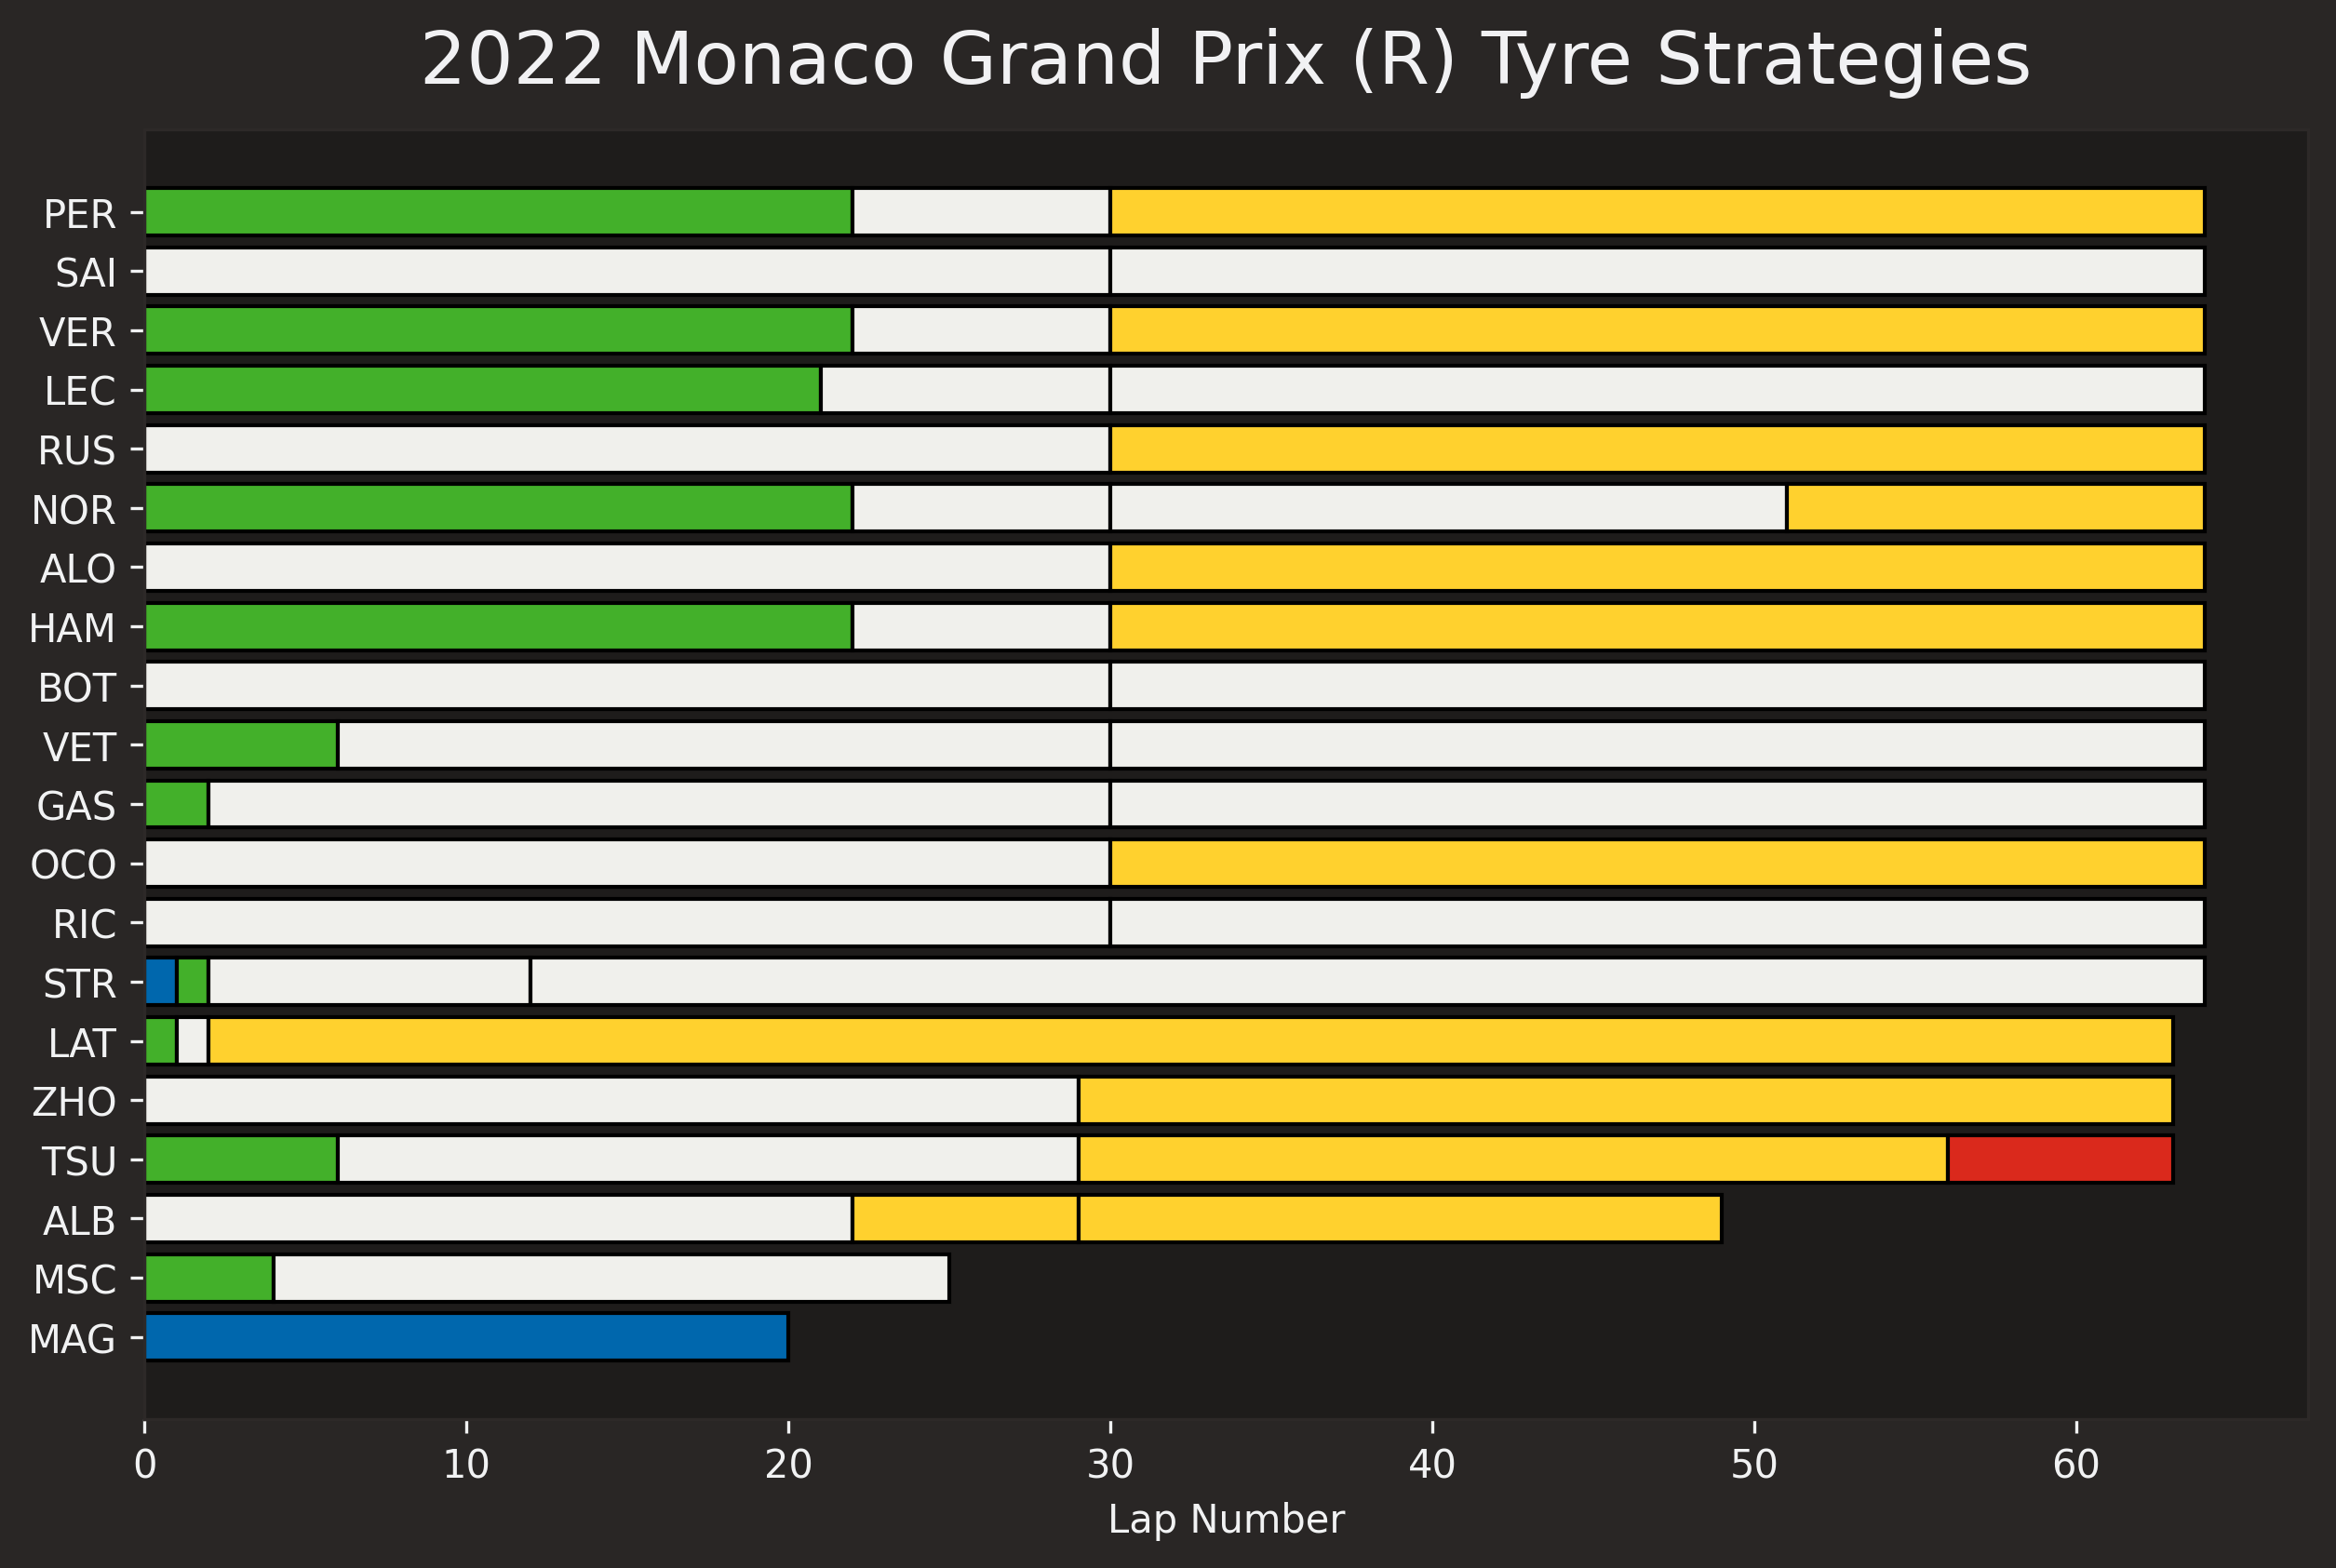

In [20]:
stints = laps[["Driver", "Stint", "Compound", "LapNumber"]]
stints = stints.groupby(["Driver", "Stint", "Compound"])
stints = stints.count().reset_index()
stints = stints.rename(columns={"LapNumber": "StintLength"})

fig1, ax = plt.subplots(figsize=(10, 6),dpi=300)

plt.title(f"{year} {race_data.event['EventName']} ({session}) Tyre Strategies")
plt.xlabel("Lap Number")
plt.grid(False)

# invert the y-axis so drivers that finish higher are closer to the top
ax.invert_yaxis()

for driver in drivers:
    driver_stints = stints.loc[stints["Driver"] == driver]

    # print(driver_stints)

    previous_stint_end = 0
    for idx, row in driver_stints.iterrows():
        # each row contains the compound name and stint length
        # we can use these information to draw horizontal bars
        plt.barh(
            y=driver,
            width=row["StintLength"],
            left=previous_stint_end,
            color=fastf1.plotting.COMPOUND_COLORS[row["Compound"]],
            edgecolor="black",
            fill=True
        )


        previous_stint_end += row["StintLength"]

plt.show()

# Podium Driver's Telementry

In [21]:
pod_1 = race_data.laps.pick_driver(podium['Abbreviation'][0]).pick_fastest()
pod_1_tel = pod_1.get_telemetry()
points_1 = np.array([pod_1_tel['X'].values, pod_1_tel['Y'].values]).T.reshape(-1, 1, 2)
segments_1 = np.concatenate([points_1[:-1], points_1[1:]], axis=1)

pod_2 = race_data.laps.pick_driver(podium['Abbreviation'][1]).pick_fastest()
pod_2_tel = pod_2.get_telemetry()
points_2 = np.array([pod_2_tel['X'].values, pod_2_tel['Y'].values]).T.reshape(-1, 1, 2)
segments_2 = np.concatenate([points_2[:-1], points_2[1:]], axis=1)

pod_3 = race_data.laps.pick_driver(podium['Abbreviation'][2]).pick_fastest()
pod_3_tel = pod_3.get_telemetry()
points_3 = np.array([pod_3_tel['X'].values, pod_3_tel['Y'].values]).T.reshape(-1, 1, 2)
segments_3 = np.concatenate([points_2[:-1], points_2[1:]], axis=1)

# Driver's Speed

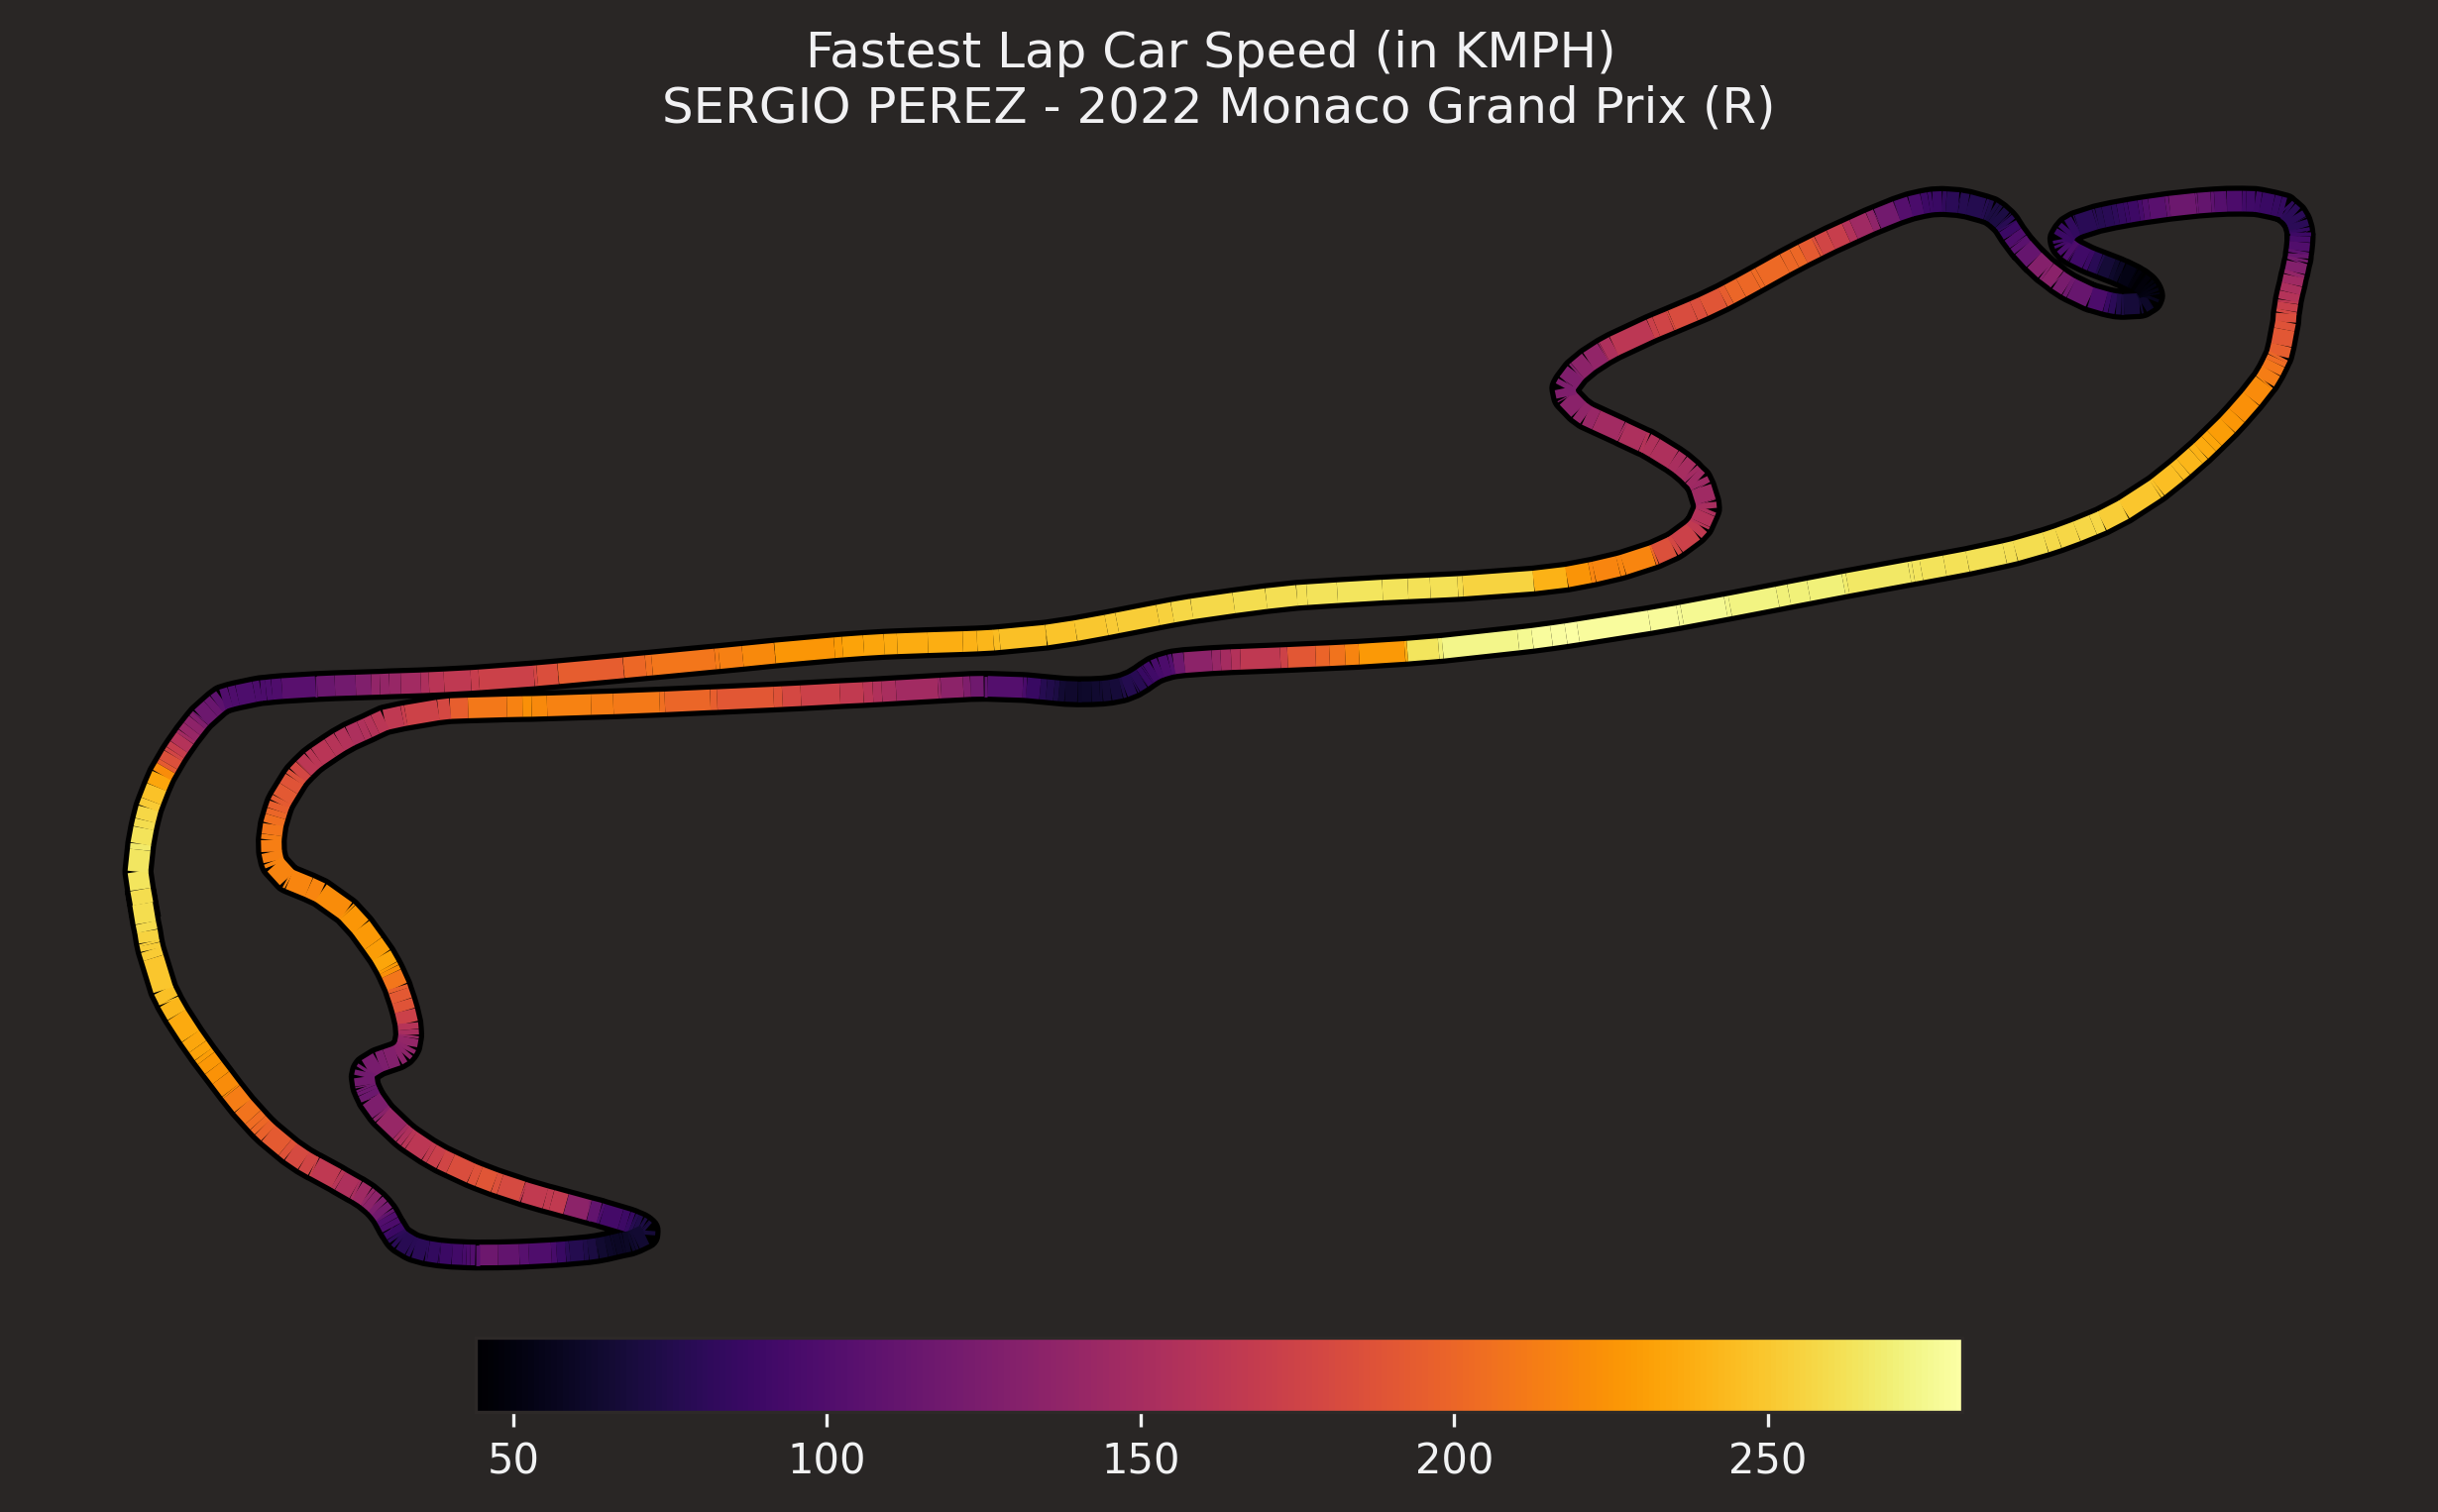

In [22]:
# Podium - 1:

cmap = matplotlib.colormaps['inferno']

fig, ax = plt.subplots(figsize=(10,5),dpi=300)

fig.suptitle(
    f"Fastest Lap Car Speed (in KMPH) \n"
    f"{fastf1.plotting.DRIVER_TRANSLATE[pod_1['Driver']].upper()} - {year} {race_data.event['EventName']} ({session})"
)

plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.12)
ax.axis('off')

ax.plot(pod_1_tel['X'],pod_1_tel['Y'], color='black', linestyle='-', linewidth=7.5, zorder=0)

norm = plt.Normalize(pod_1_tel['Speed'].min(), pod_1_tel['Speed'].max())
lc = LineCollection(segments_1, cmap=cmap , norm=norm, linestyle='-', linewidth=5)

lc.set_array(pod_1_tel['Speed'])

line = ax.add_collection(lc)

cbaxes = fig.add_axes([0.25, 0.05, 0.5, 0.05])
normlegend = matplotlib.colors.Normalize(vmin=pod_1_tel['Speed'].min(), vmax=pod_1_tel['Speed'].max())
legend = matplotlib.colorbar.ColorbarBase(cbaxes, norm=normlegend, cmap=cmap , orientation="horizontal")

plt.show()

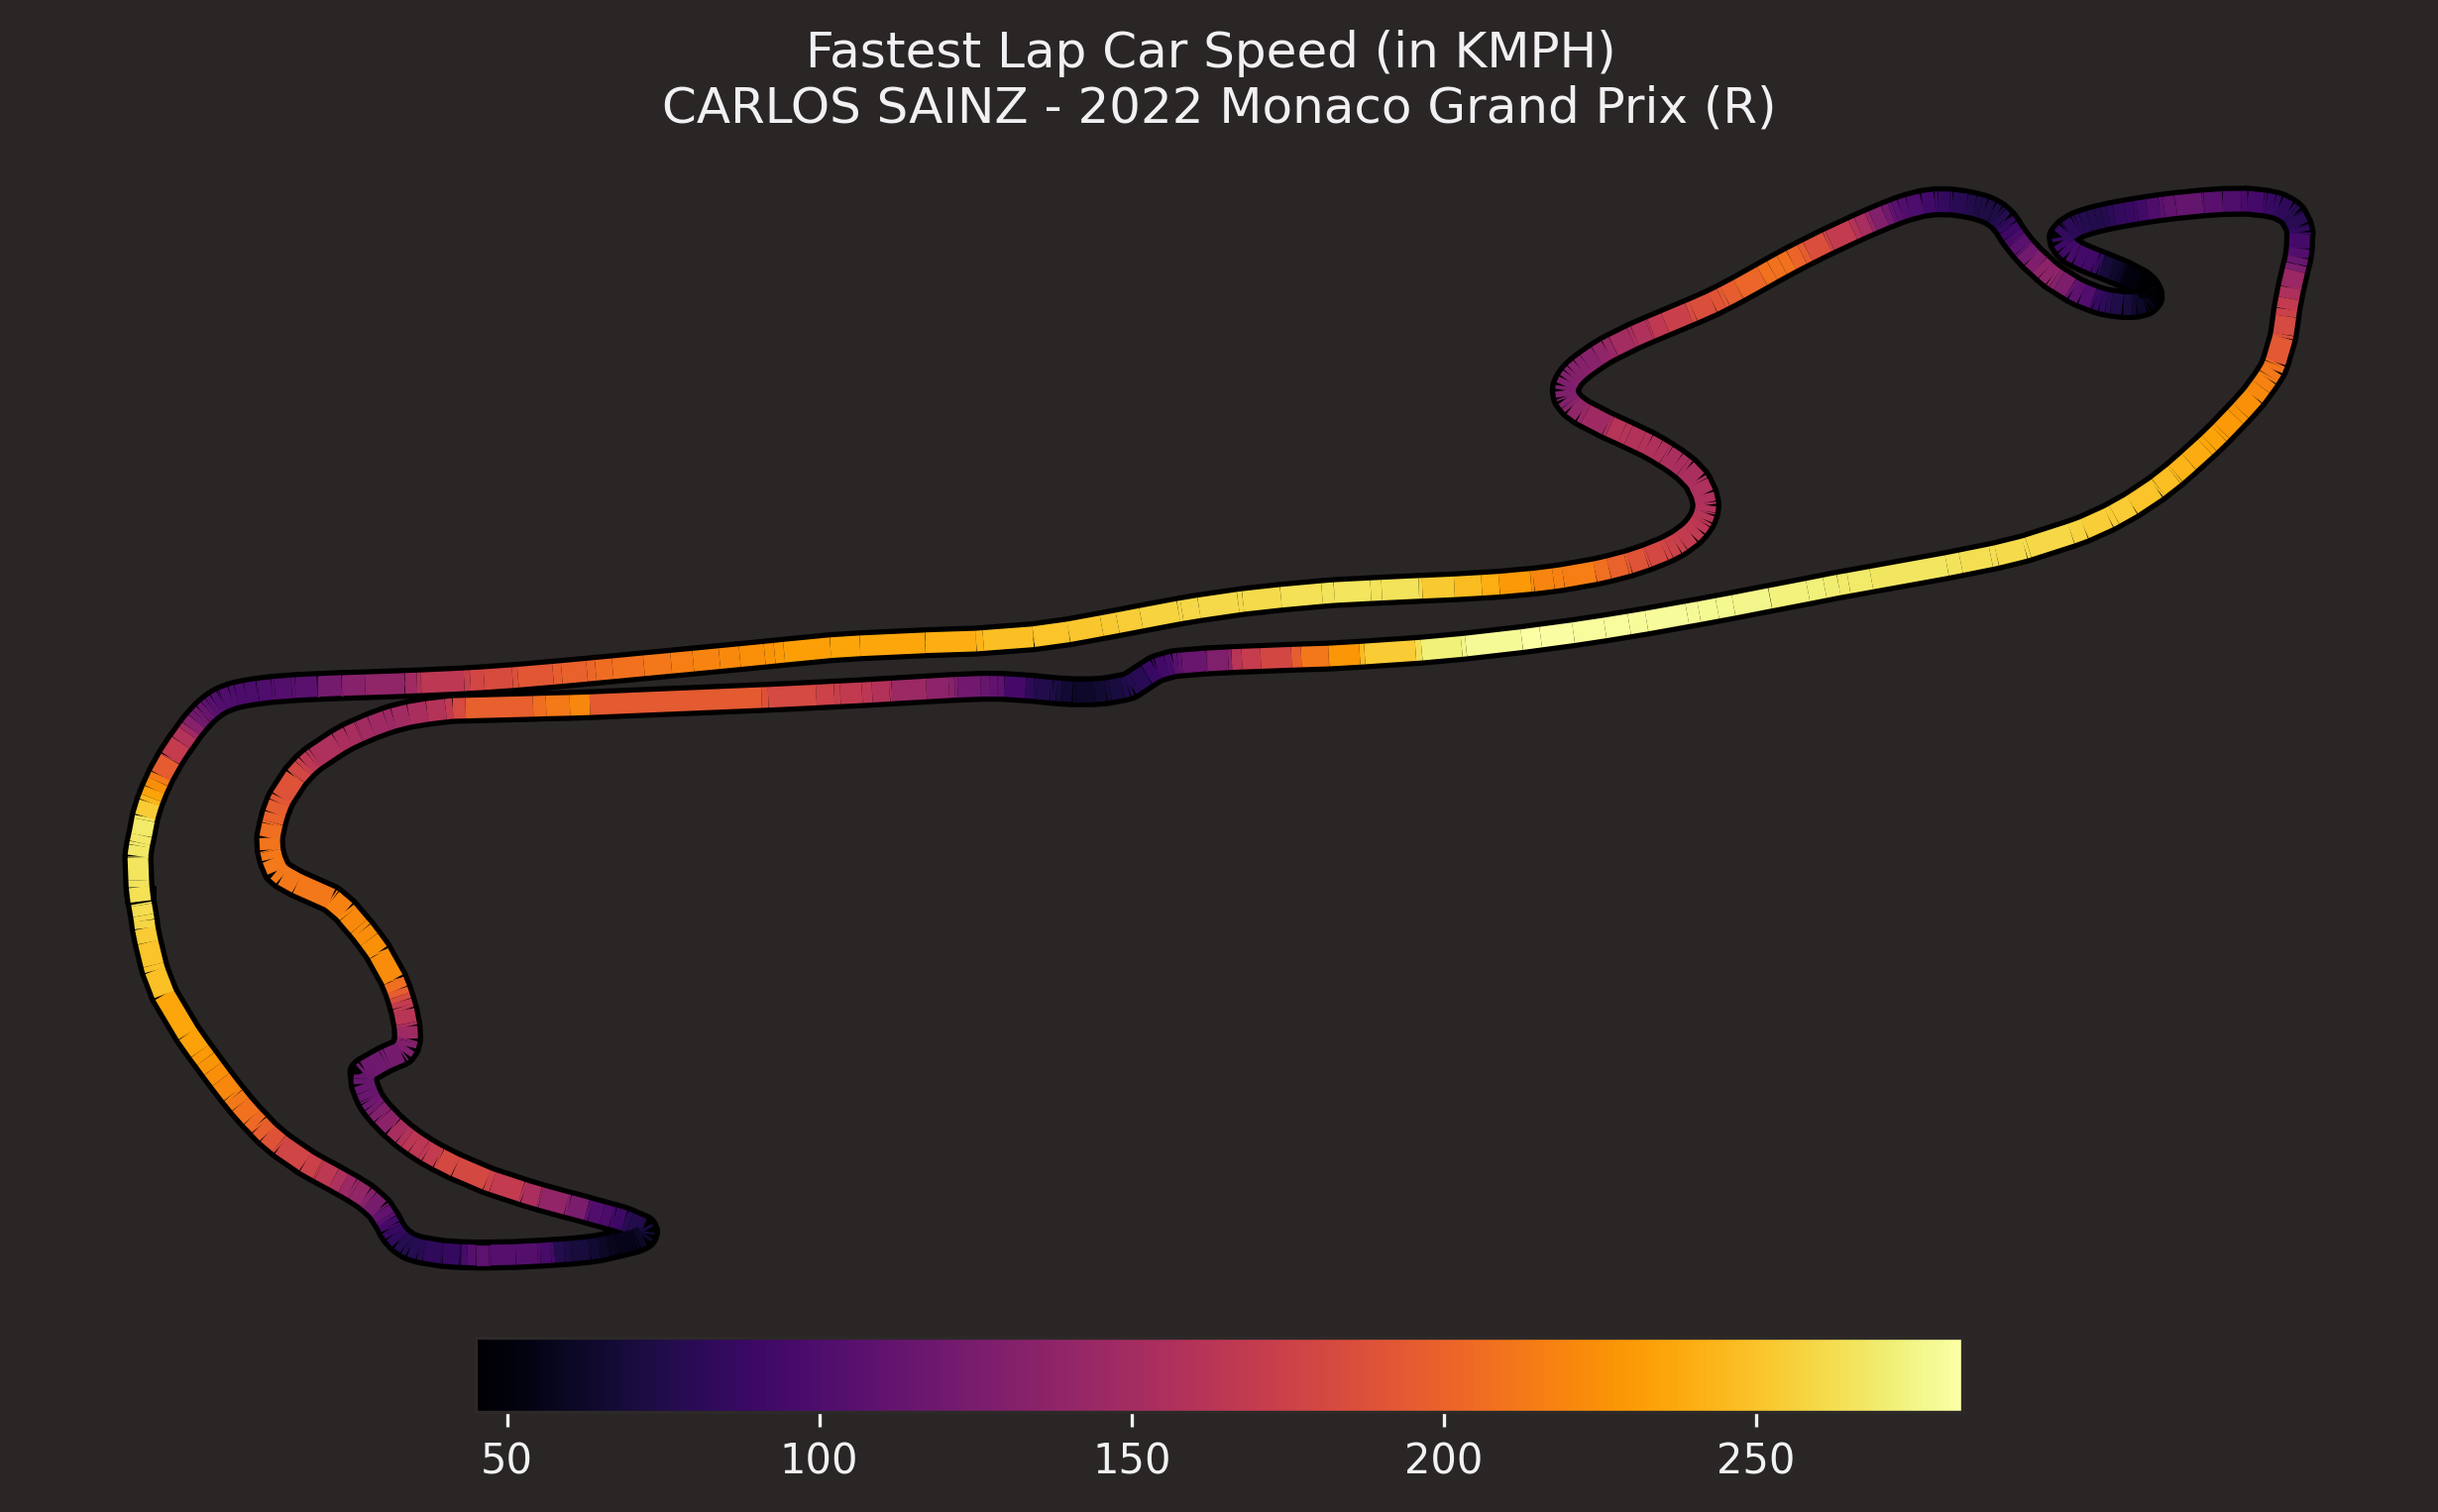

In [23]:
# Podium - 2:

cmap = matplotlib.colormaps['inferno']

fig, ax = plt.subplots(figsize=(10,5),dpi=300)

fig.suptitle(
    f"Fastest Lap Car Speed (in KMPH) \n"
    f"{fastf1.plotting.DRIVER_TRANSLATE[pod_2['Driver']].upper()} - {year} {race_data.event['EventName']} ({session})"
)

plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.12)
ax.axis('off')

ax.plot(pod_2_tel['X'],pod_2_tel['Y'], color='black', linestyle='-', linewidth=7.5, zorder=0)

norm = plt.Normalize(pod_2_tel['Speed'].min(), pod_2_tel['Speed'].max())
lc = LineCollection(segments_2, cmap=cmap , norm=norm, linestyle='-', linewidth=5)

lc.set_array(pod_2_tel['Speed'])

line = ax.add_collection(lc)

cbaxes = fig.add_axes([0.25, 0.05, 0.5, 0.05])
normlegend = matplotlib.colors.Normalize(vmin=pod_2_tel['Speed'].min(), vmax=pod_2_tel['Speed'].max())
legend = matplotlib.colorbar.ColorbarBase(cbaxes, norm=normlegend, cmap=cmap , orientation="horizontal")

plt.show()

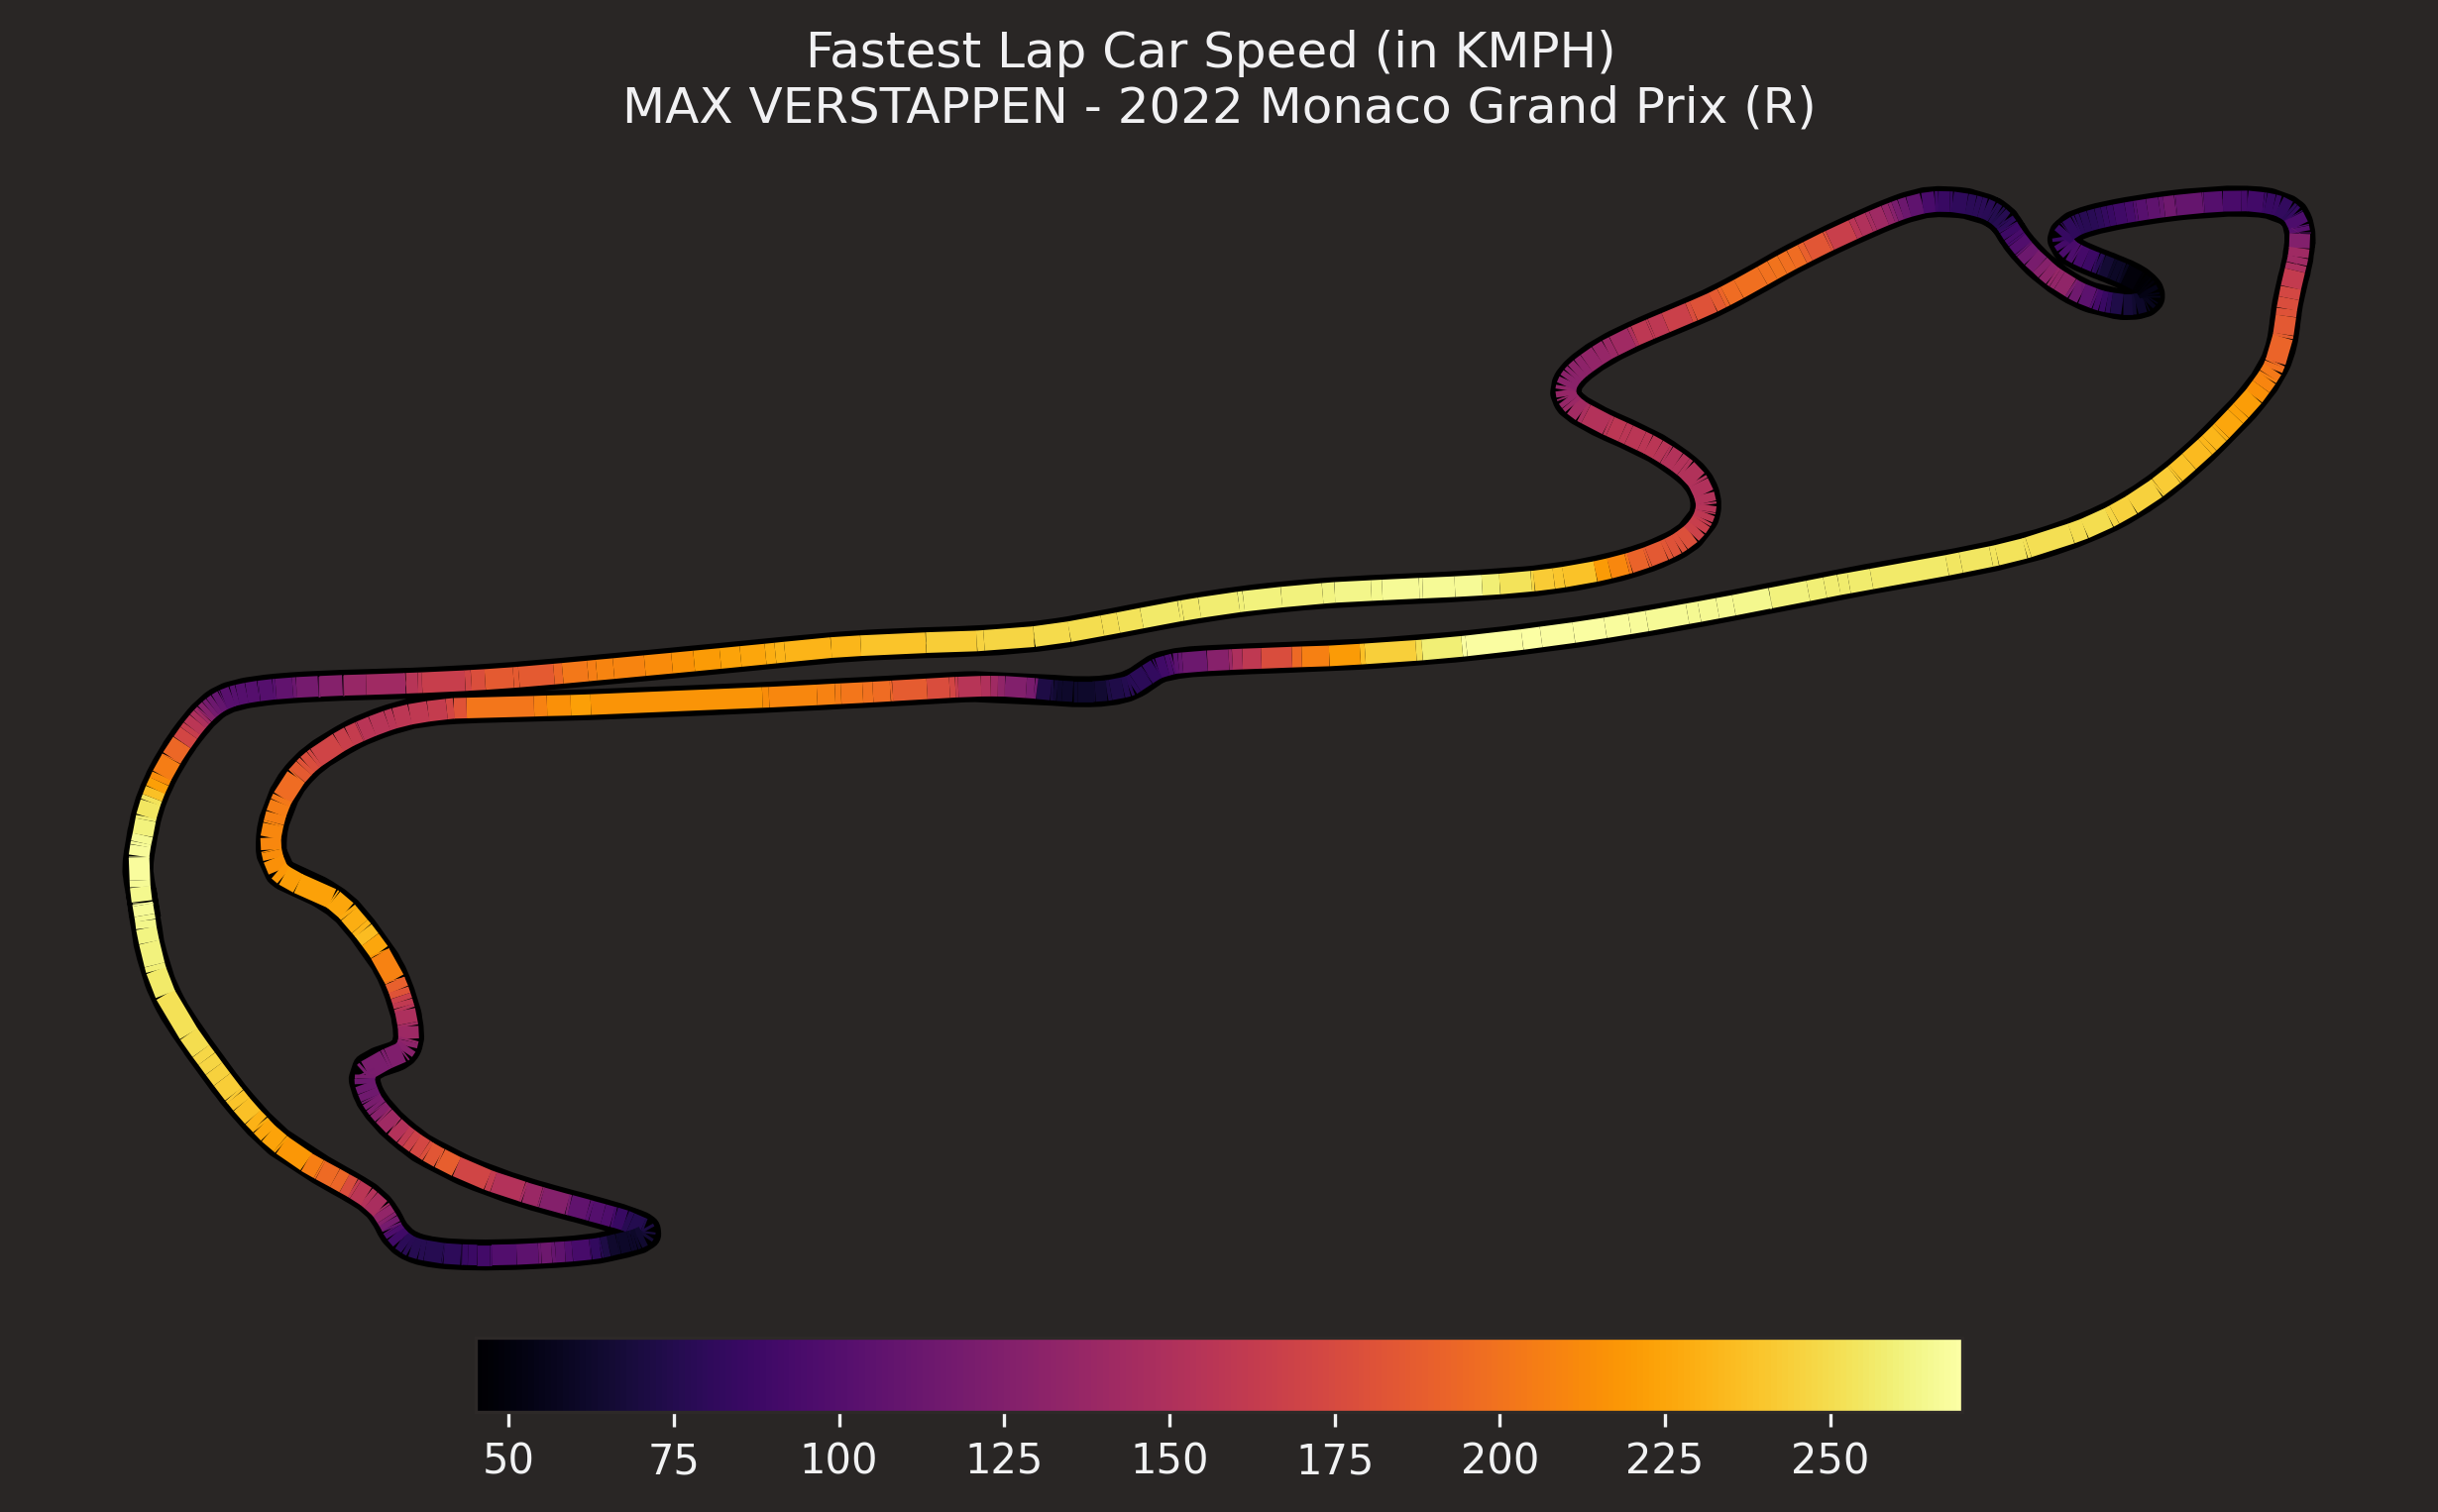

In [24]:
# Podium - 3:

cmap = matplotlib.colormaps['inferno']

fig, ax = plt.subplots(figsize=(10,5),dpi=300)

fig.suptitle(
    f"Fastest Lap Car Speed (in KMPH) \n"
    f"{fastf1.plotting.DRIVER_TRANSLATE[pod_3['Driver']].upper()} - {year} {race_data.event['EventName']} ({session})"
)

plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.12)
ax.axis('off')

ax.plot(pod_3_tel['X'],pod_3_tel['Y'], color='black', linestyle='-', linewidth=7.5, zorder=0)

norm = plt.Normalize(pod_3_tel['Speed'].min(), pod_3_tel['Speed'].max())
lc = LineCollection(segments_3, cmap=cmap , norm=norm, linestyle='-', linewidth=5)

lc.set_array(pod_3_tel['Speed'])

line = ax.add_collection(lc)

cbaxes = fig.add_axes([0.25, 0.05, 0.5, 0.05])
normlegend = matplotlib.colors.Normalize(vmin=pod_3_tel['Speed'].min(), vmax=pod_3_tel['Speed'].max())
legend = matplotlib.colorbar.ColorbarBase(cbaxes, norm=normlegend, cmap=cmap , orientation="horizontal")

plt.show()

# Driver's Gear

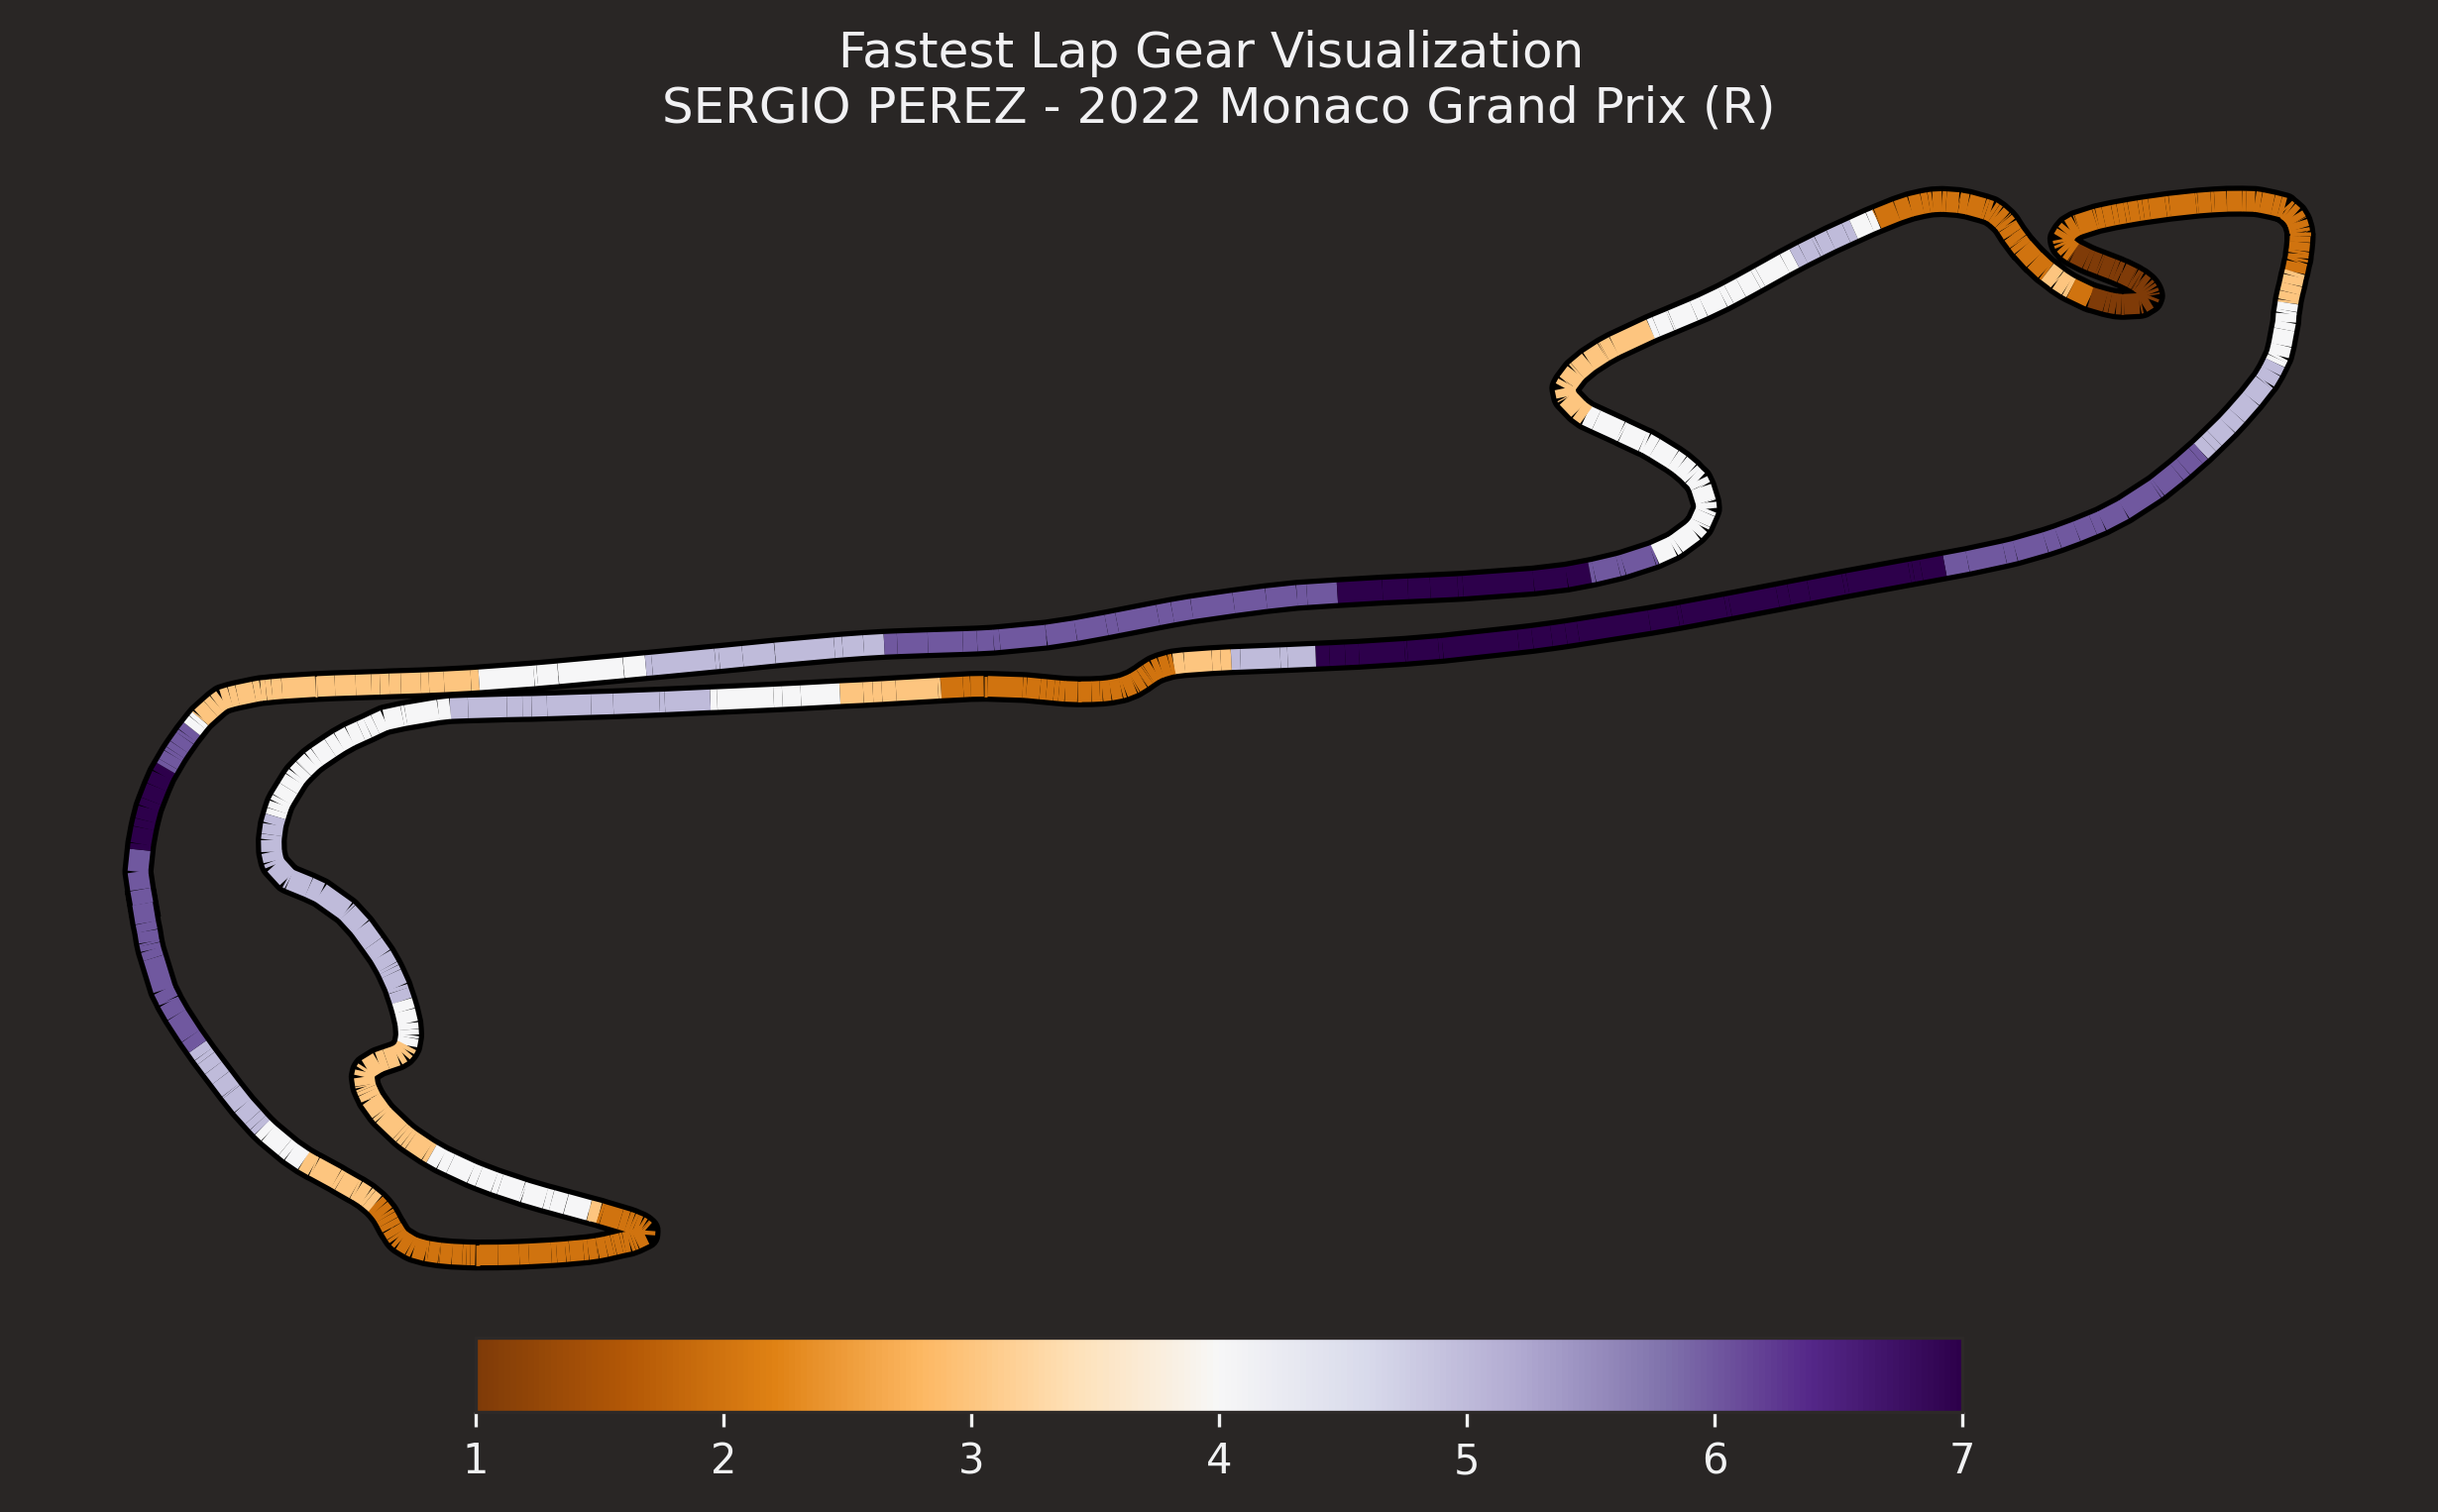

In [25]:
# Podium-1:

cmap = matplotlib.colormaps['PuOr']

fig, ax = plt.subplots(sharex=True, sharey=True ,figsize=(10,5),dpi=300)

fig.suptitle(
    f"Fastest Lap Gear Visualization \n"
    f"{fastf1.plotting.DRIVER_TRANSLATE[pod_1['Driver']].upper()} - {year} {race_data.event['EventName']} ({session})"
)

plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.12)
ax.axis('off')

ax.plot(pod_1_tel['X'],pod_1_tel['Y'], color='black', linestyle='-', linewidth=7.5, zorder=0)

norm = plt.Normalize(pod_1_tel['nGear'].min(), pod_1_tel['nGear'].max())
lc = LineCollection(segments_1, cmap=cmap , norm=norm, linestyle='-', linewidth=5)

lc.set_array(pod_1_tel['nGear'])

line = ax.add_collection(lc)

cbaxes = fig.add_axes([0.25, 0.05, 0.5, 0.05])
normlegend = matplotlib.colors.Normalize(vmin=pod_1_tel['nGear'].min(), vmax=pod_1_tel['nGear'].max())
legend = matplotlib.colorbar.ColorbarBase(cbaxes, norm=normlegend, cmap=cmap , orientation="horizontal")

plt.show()

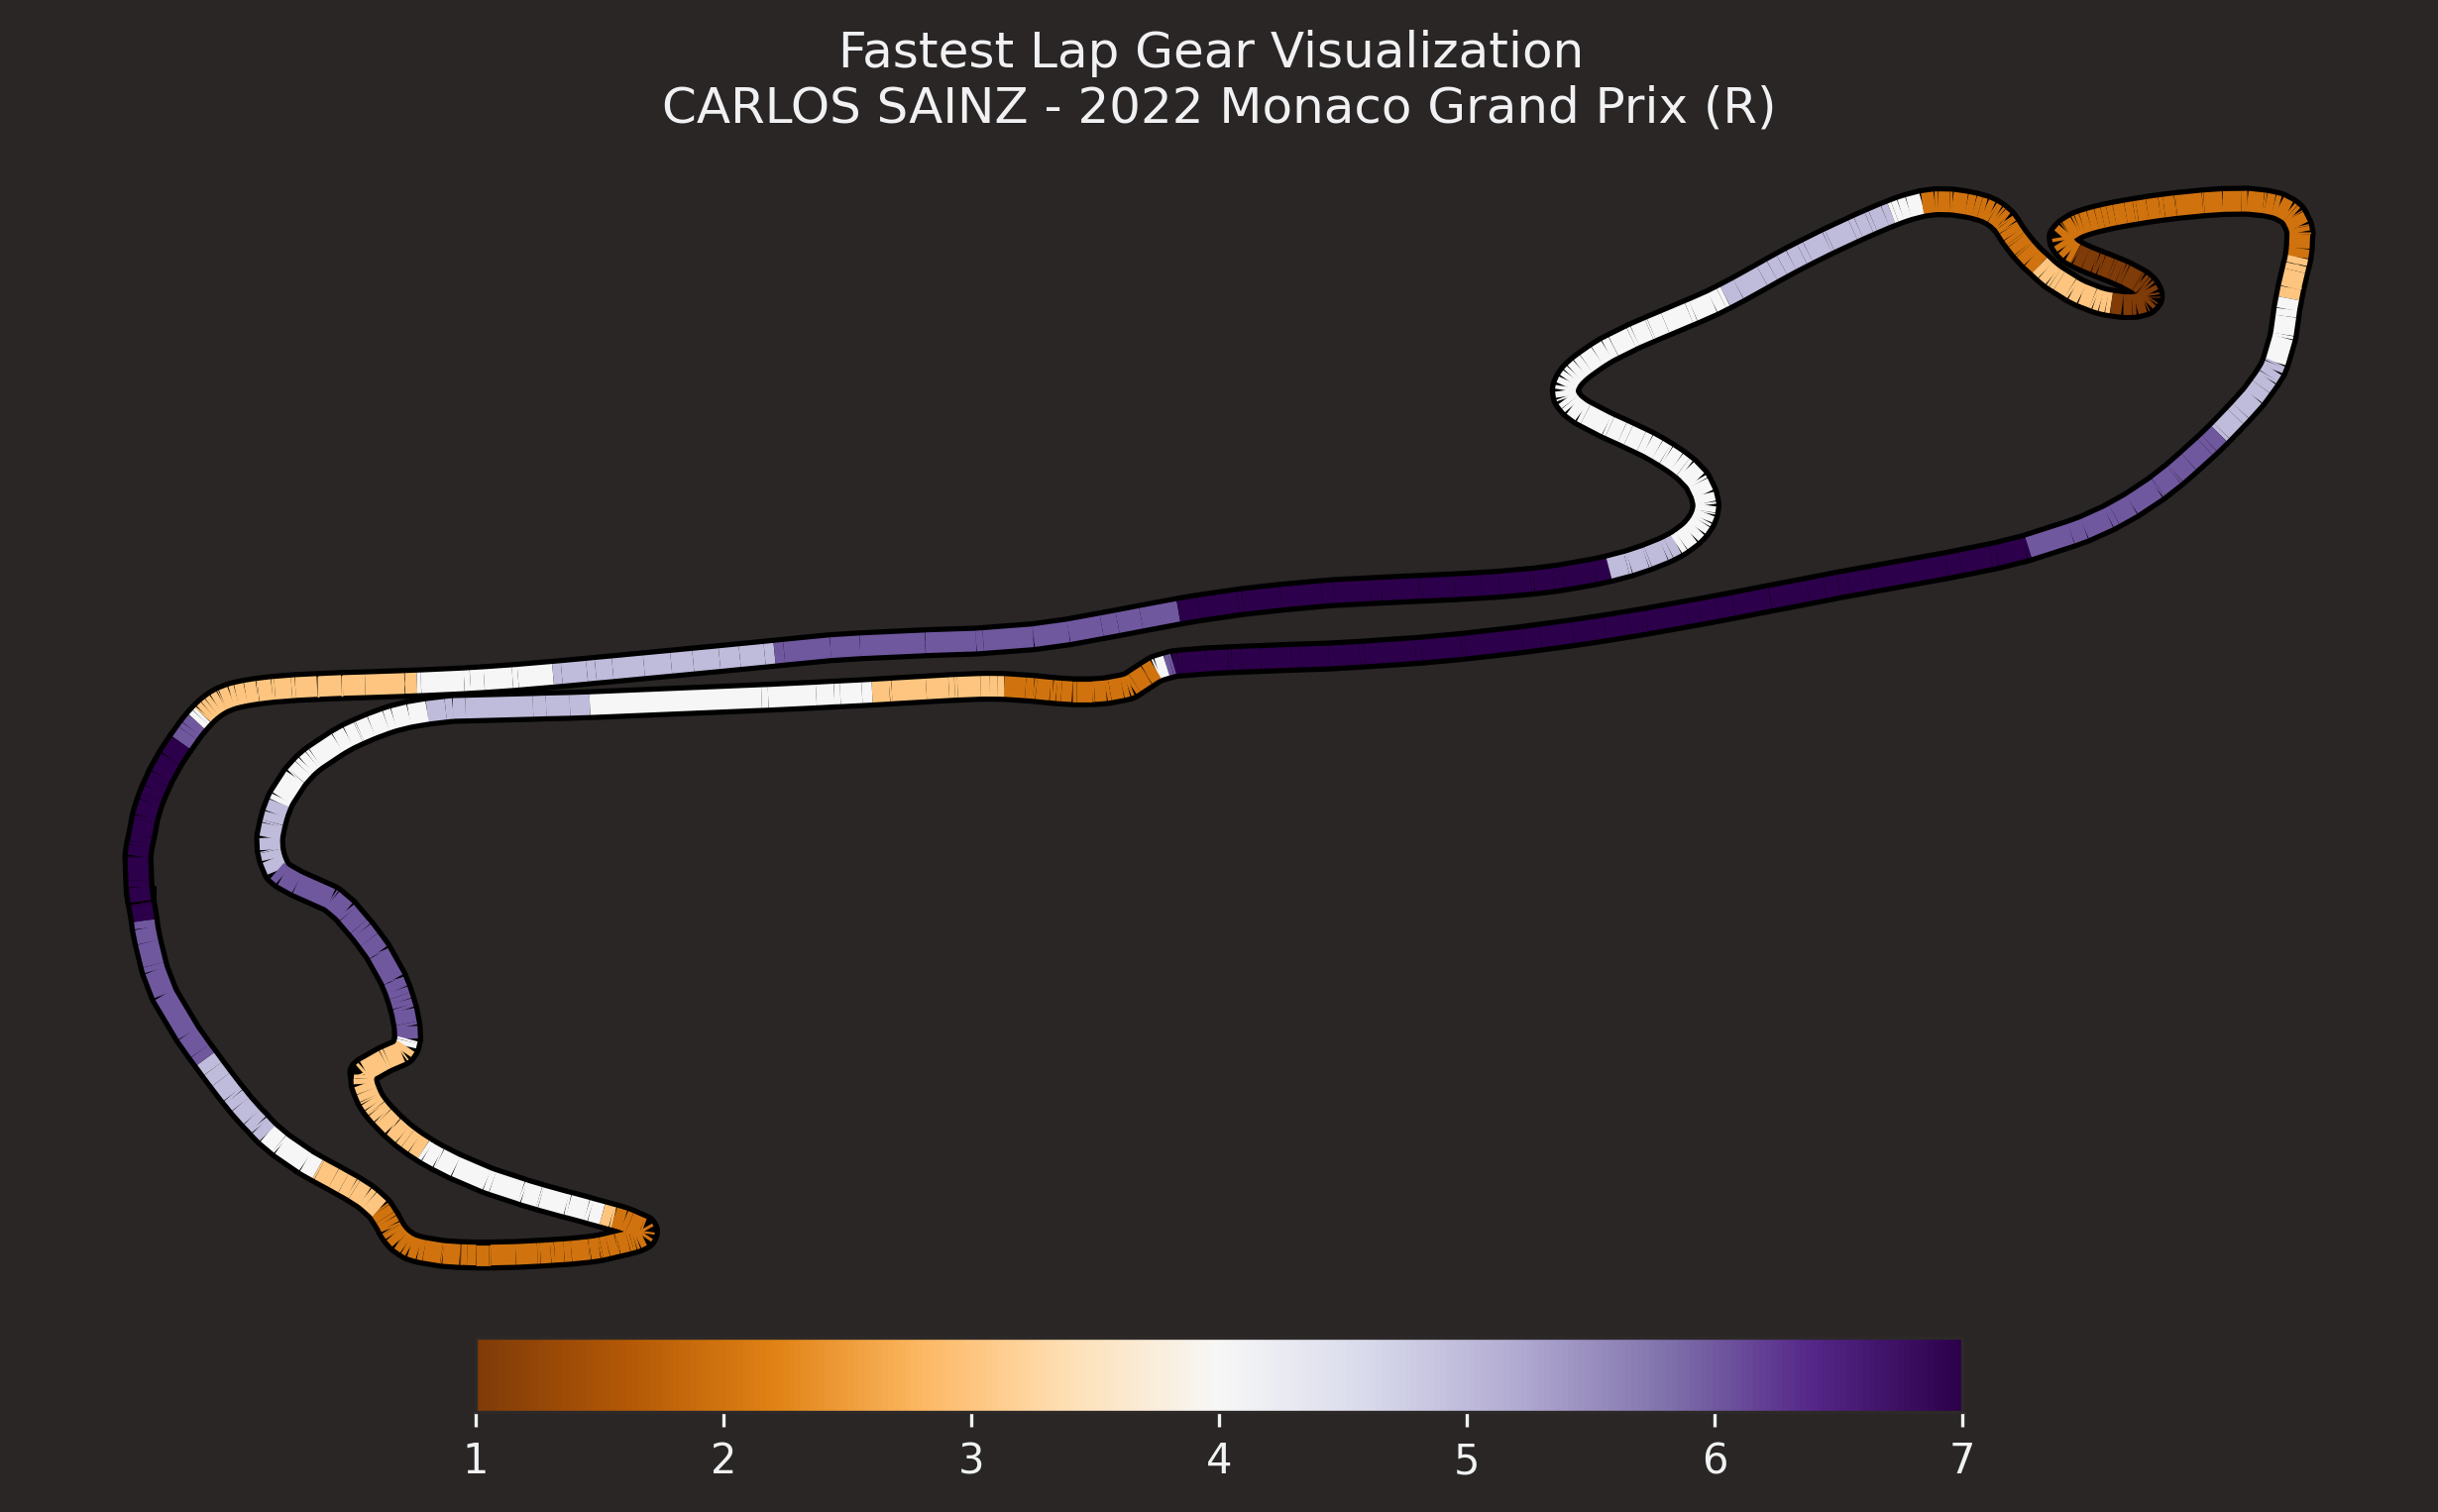

In [26]:
# Podium-2:

cmap = matplotlib.colormaps['PuOr']

fig, ax = plt.subplots(sharex=True, sharey=True ,figsize=(10,5),dpi=300)

fig.suptitle(
    f"Fastest Lap Gear Visualization \n"
    f"{fastf1.plotting.DRIVER_TRANSLATE[pod_2['Driver']].upper()} - {year} {race_data.event['EventName']} ({session})"
)

plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.12)
ax.axis('off')

ax.plot(pod_2_tel['X'],pod_2_tel['Y'], color='black', linestyle='-', linewidth=7.5, zorder=0)

norm = plt.Normalize(pod_2_tel['nGear'].min(), pod_2_tel['nGear'].max())
lc = LineCollection(segments_2, cmap=cmap , norm=norm, linestyle='-', linewidth=5)

lc.set_array(pod_2_tel['nGear'])

line = ax.add_collection(lc)

cbaxes = fig.add_axes([0.25, 0.05, 0.5, 0.05])
normlegend = matplotlib.colors.Normalize(vmin=pod_2_tel['nGear'].min(), vmax=pod_2_tel['nGear'].max())
legend = matplotlib.colorbar.ColorbarBase(cbaxes, norm=normlegend, cmap=cmap , orientation="horizontal")

plt.show()

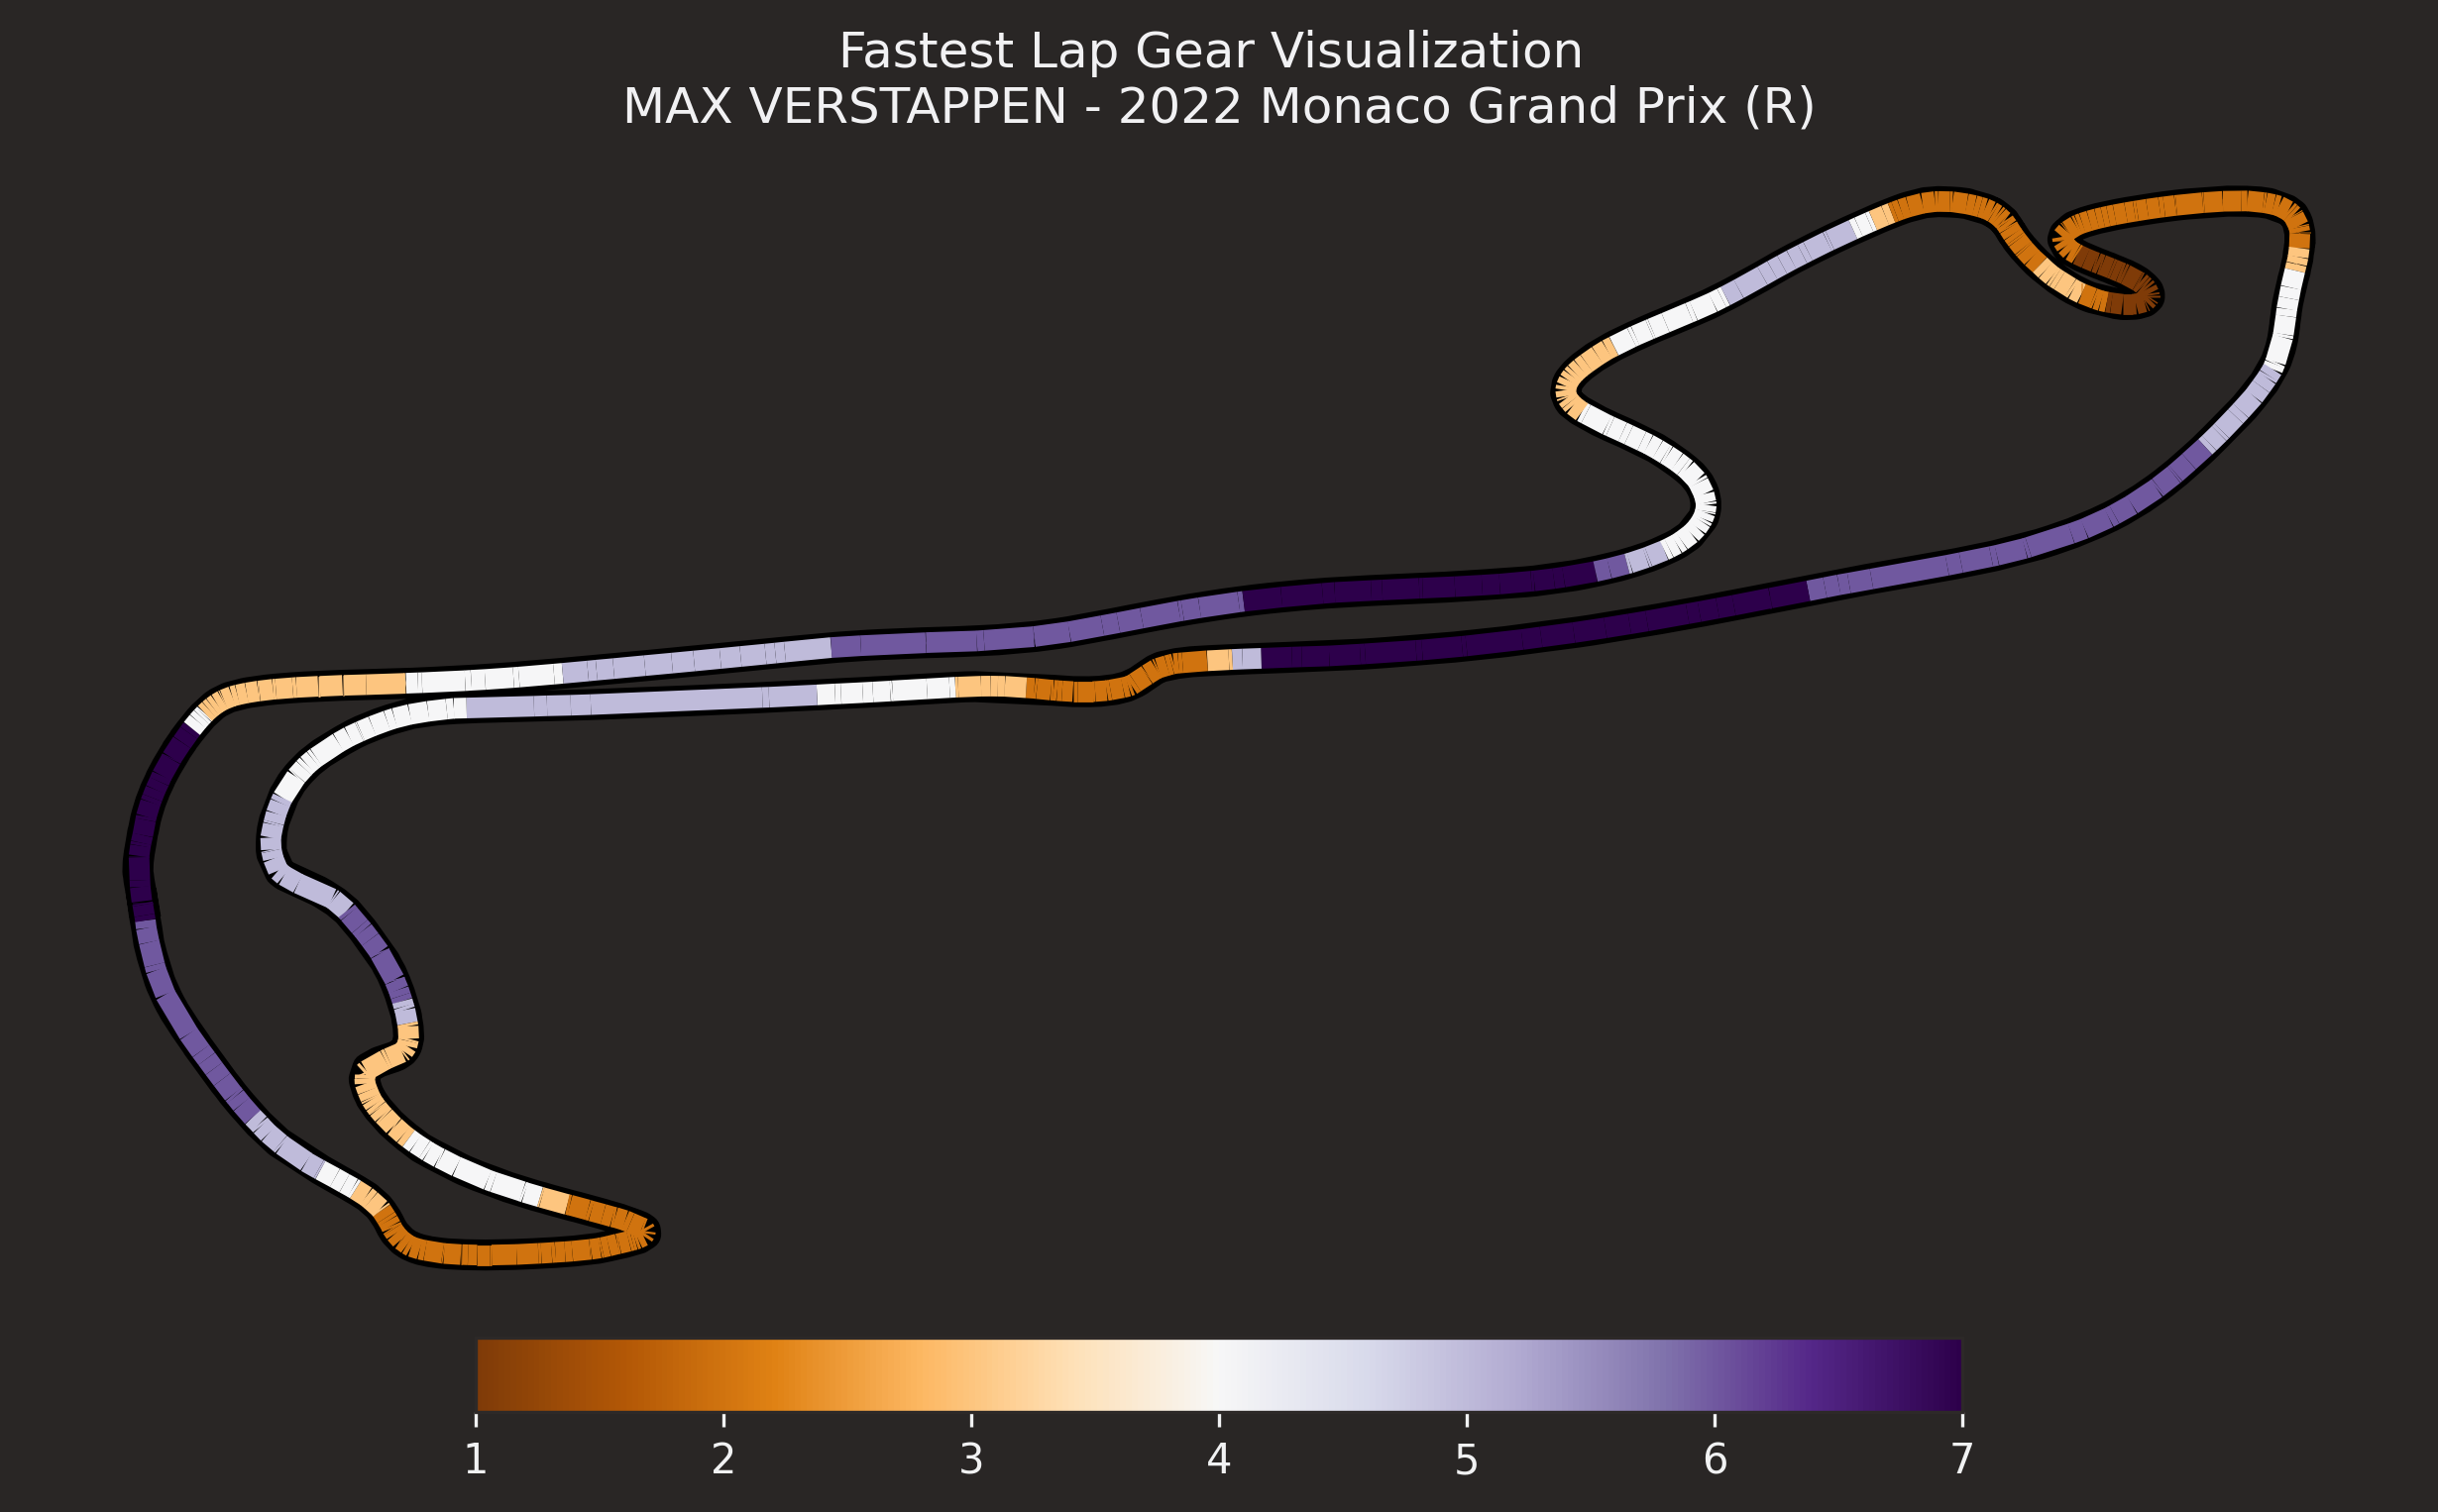

In [27]:
# Podium-3:

cmap = matplotlib.colormaps['PuOr']

fig, ax = plt.subplots(sharex=True, sharey=True ,figsize=(10,5),dpi=300)

fig.suptitle(
    f"Fastest Lap Gear Visualization \n"
    f"{fastf1.plotting.DRIVER_TRANSLATE[pod_3['Driver']].upper()} - {year} {race_data.event['EventName']} ({session})"
)

plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.12)
ax.axis('off')

ax.plot(pod_3_tel['X'],pod_3_tel['Y'], color='black', linestyle='-', linewidth=7.5, zorder=0)

norm = plt.Normalize(pod_3_tel['nGear'].min(), pod_3_tel['nGear'].max())
lc = LineCollection(segments_3, cmap=cmap , norm=norm, linestyle='-', linewidth=5)

lc.set_array(pod_3_tel['nGear'])

line = ax.add_collection(lc)

cbaxes = fig.add_axes([0.25, 0.05, 0.5, 0.05])
normlegend = matplotlib.colors.Normalize(vmin=pod_3_tel['nGear'].min(), vmax=pod_2_tel['nGear'].max())
legend = matplotlib.colorbar.ColorbarBase(cbaxes, norm=normlegend, cmap=cmap , orientation="horizontal")

plt.show()

# Driver's RPM

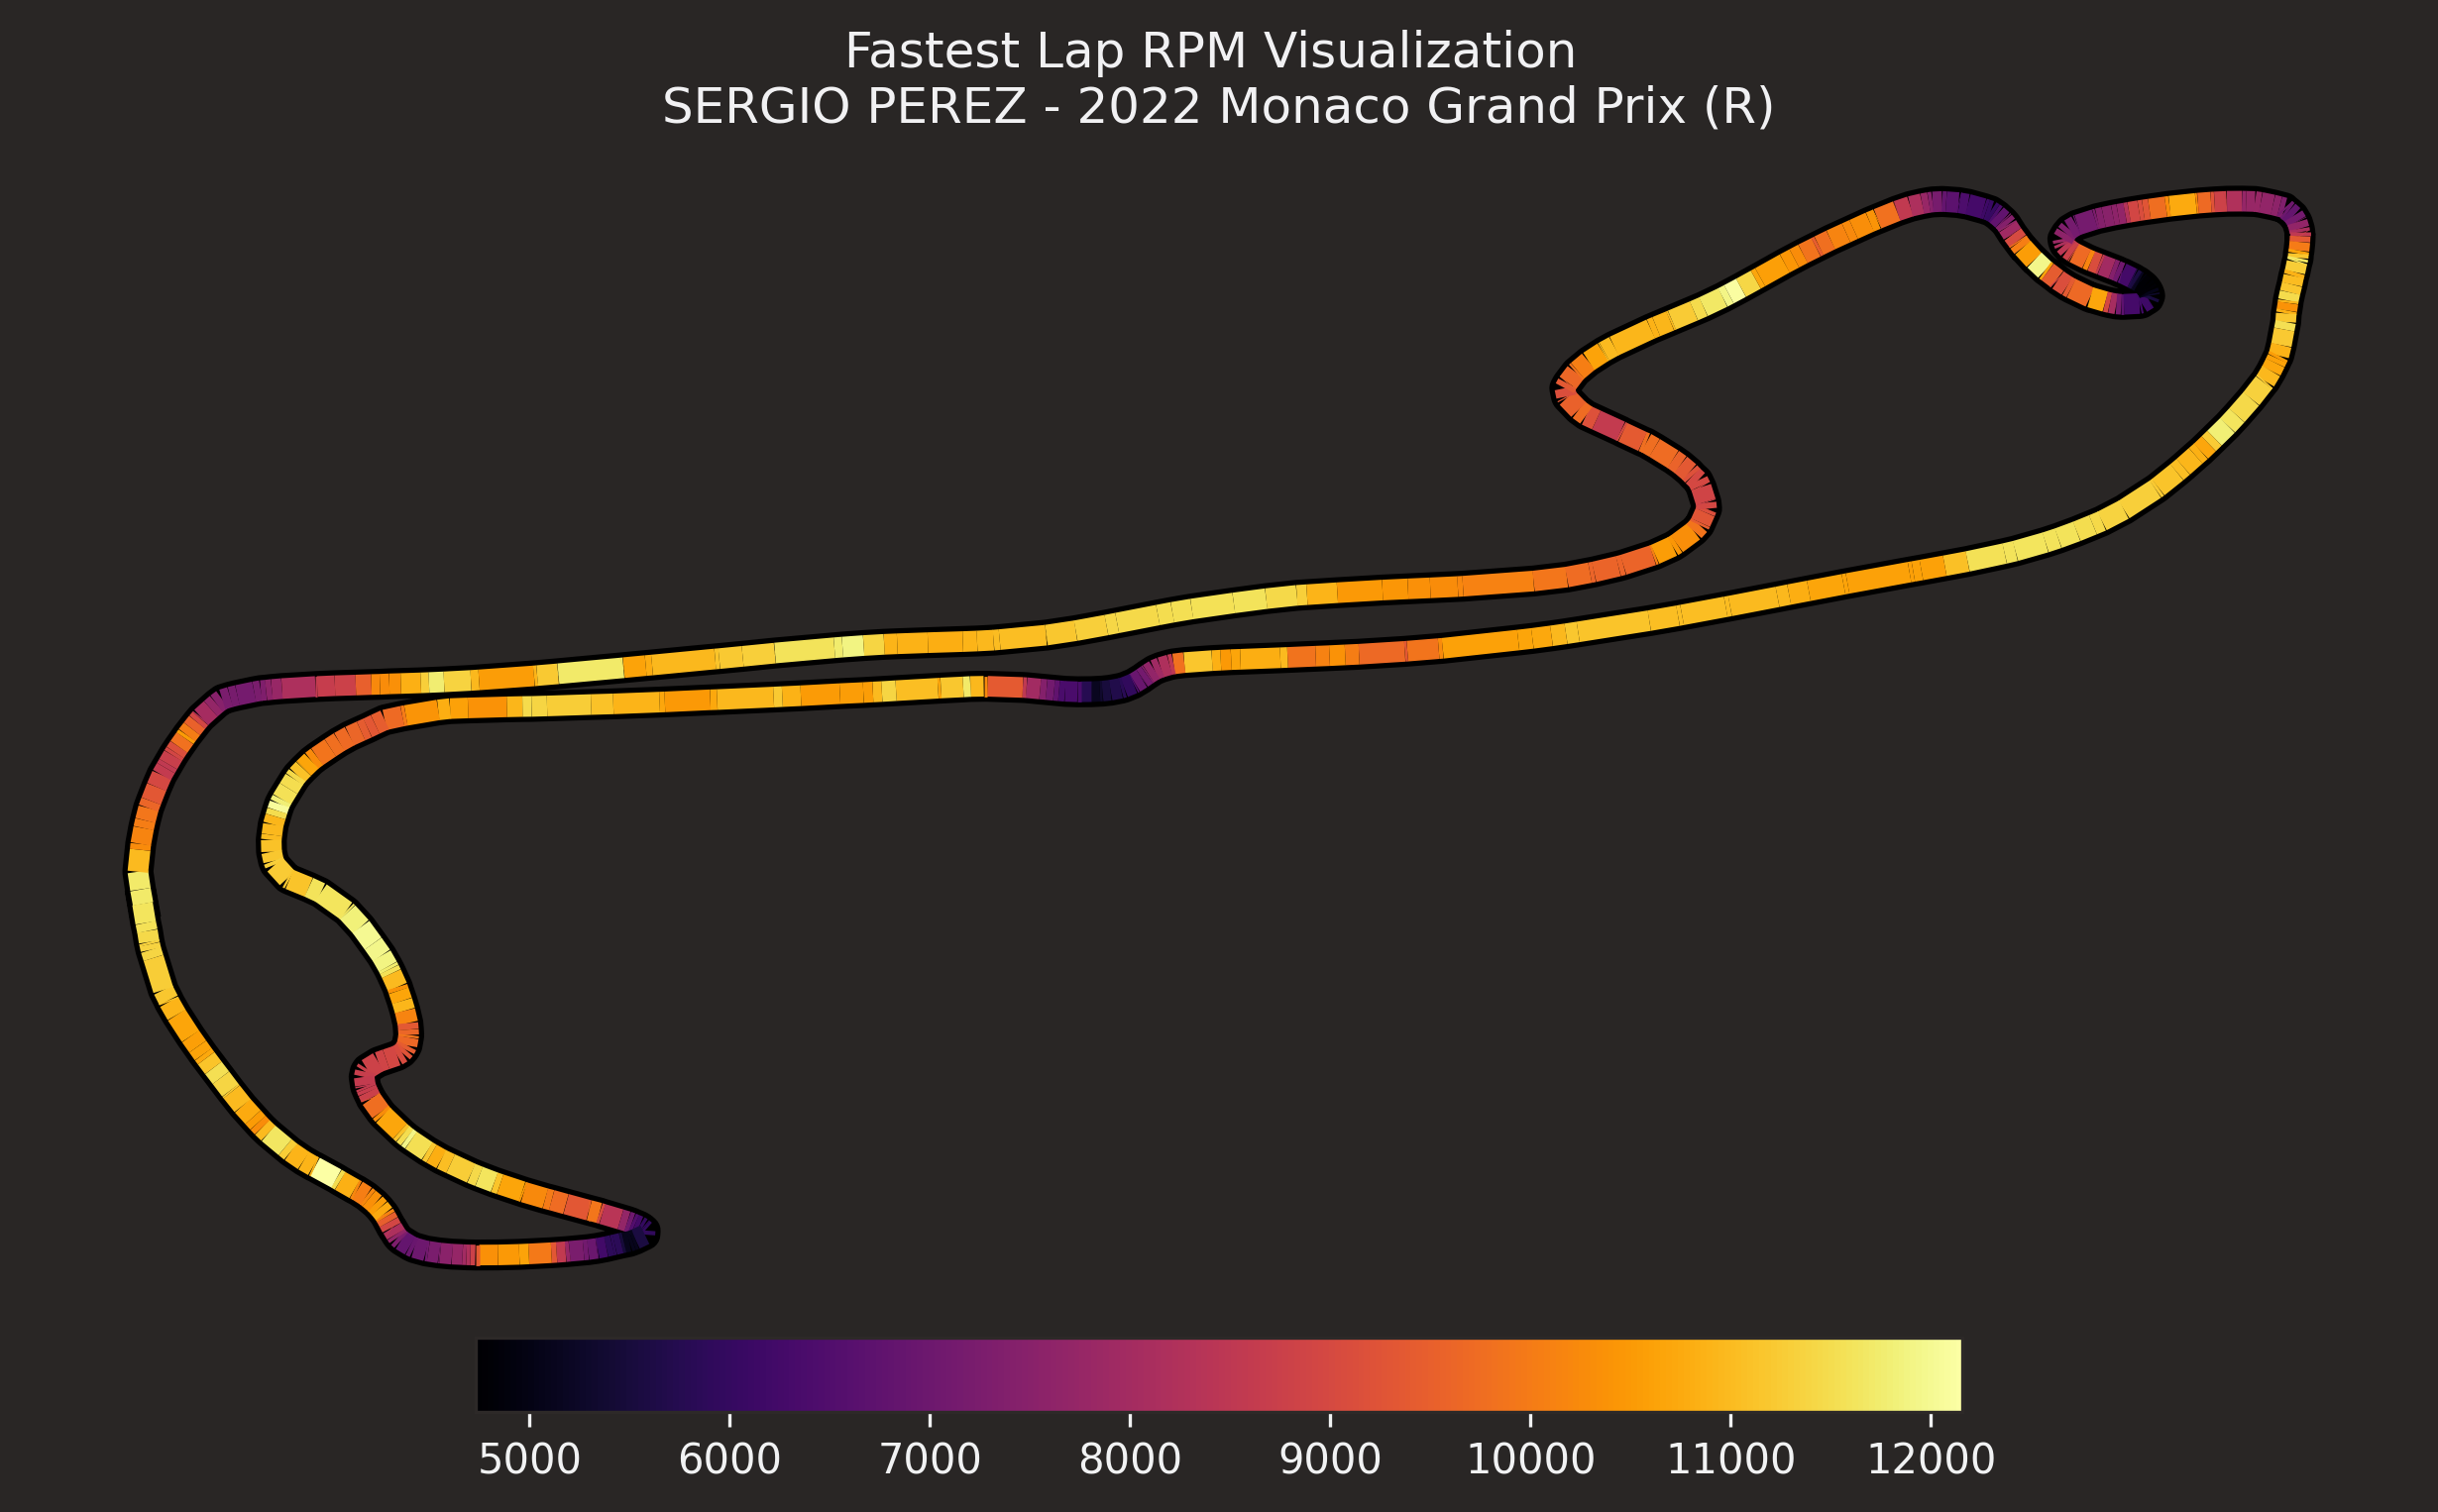

In [28]:
# Podium-1 :

cmap = matplotlib.colormaps['inferno']

fig, ax = plt.subplots(sharex=True, sharey=True ,figsize=(10,5),dpi=300)

fig.suptitle(
    f"Fastest Lap RPM Visualization \n"
    f"{fastf1.plotting.DRIVER_TRANSLATE[pod_1['Driver']].upper()} - {year} {race_data.event['EventName']} ({session})"
)

plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.12)
ax.axis('off')

ax.plot(pod_1_tel['X'],pod_1_tel['Y'], color='black', linestyle='-', linewidth=7.5, zorder=0)

norm = plt.Normalize(pod_1_tel['RPM'].min(), pod_1_tel['RPM'].max())
lc = LineCollection(segments_1, cmap=cmap , norm=norm, linestyle='-', linewidth=5)

lc.set_array(pod_1_tel['RPM'])

line = ax.add_collection(lc)

cbaxes = fig.add_axes([0.25, 0.05, 0.5, 0.05])
normlegend = matplotlib.colors.Normalize(vmin=pod_1_tel['RPM'].min(), vmax=pod_1_tel['RPM'].max())
legend = matplotlib.colorbar.ColorbarBase(cbaxes, norm=normlegend, cmap=cmap , orientation="horizontal")

plt.show()

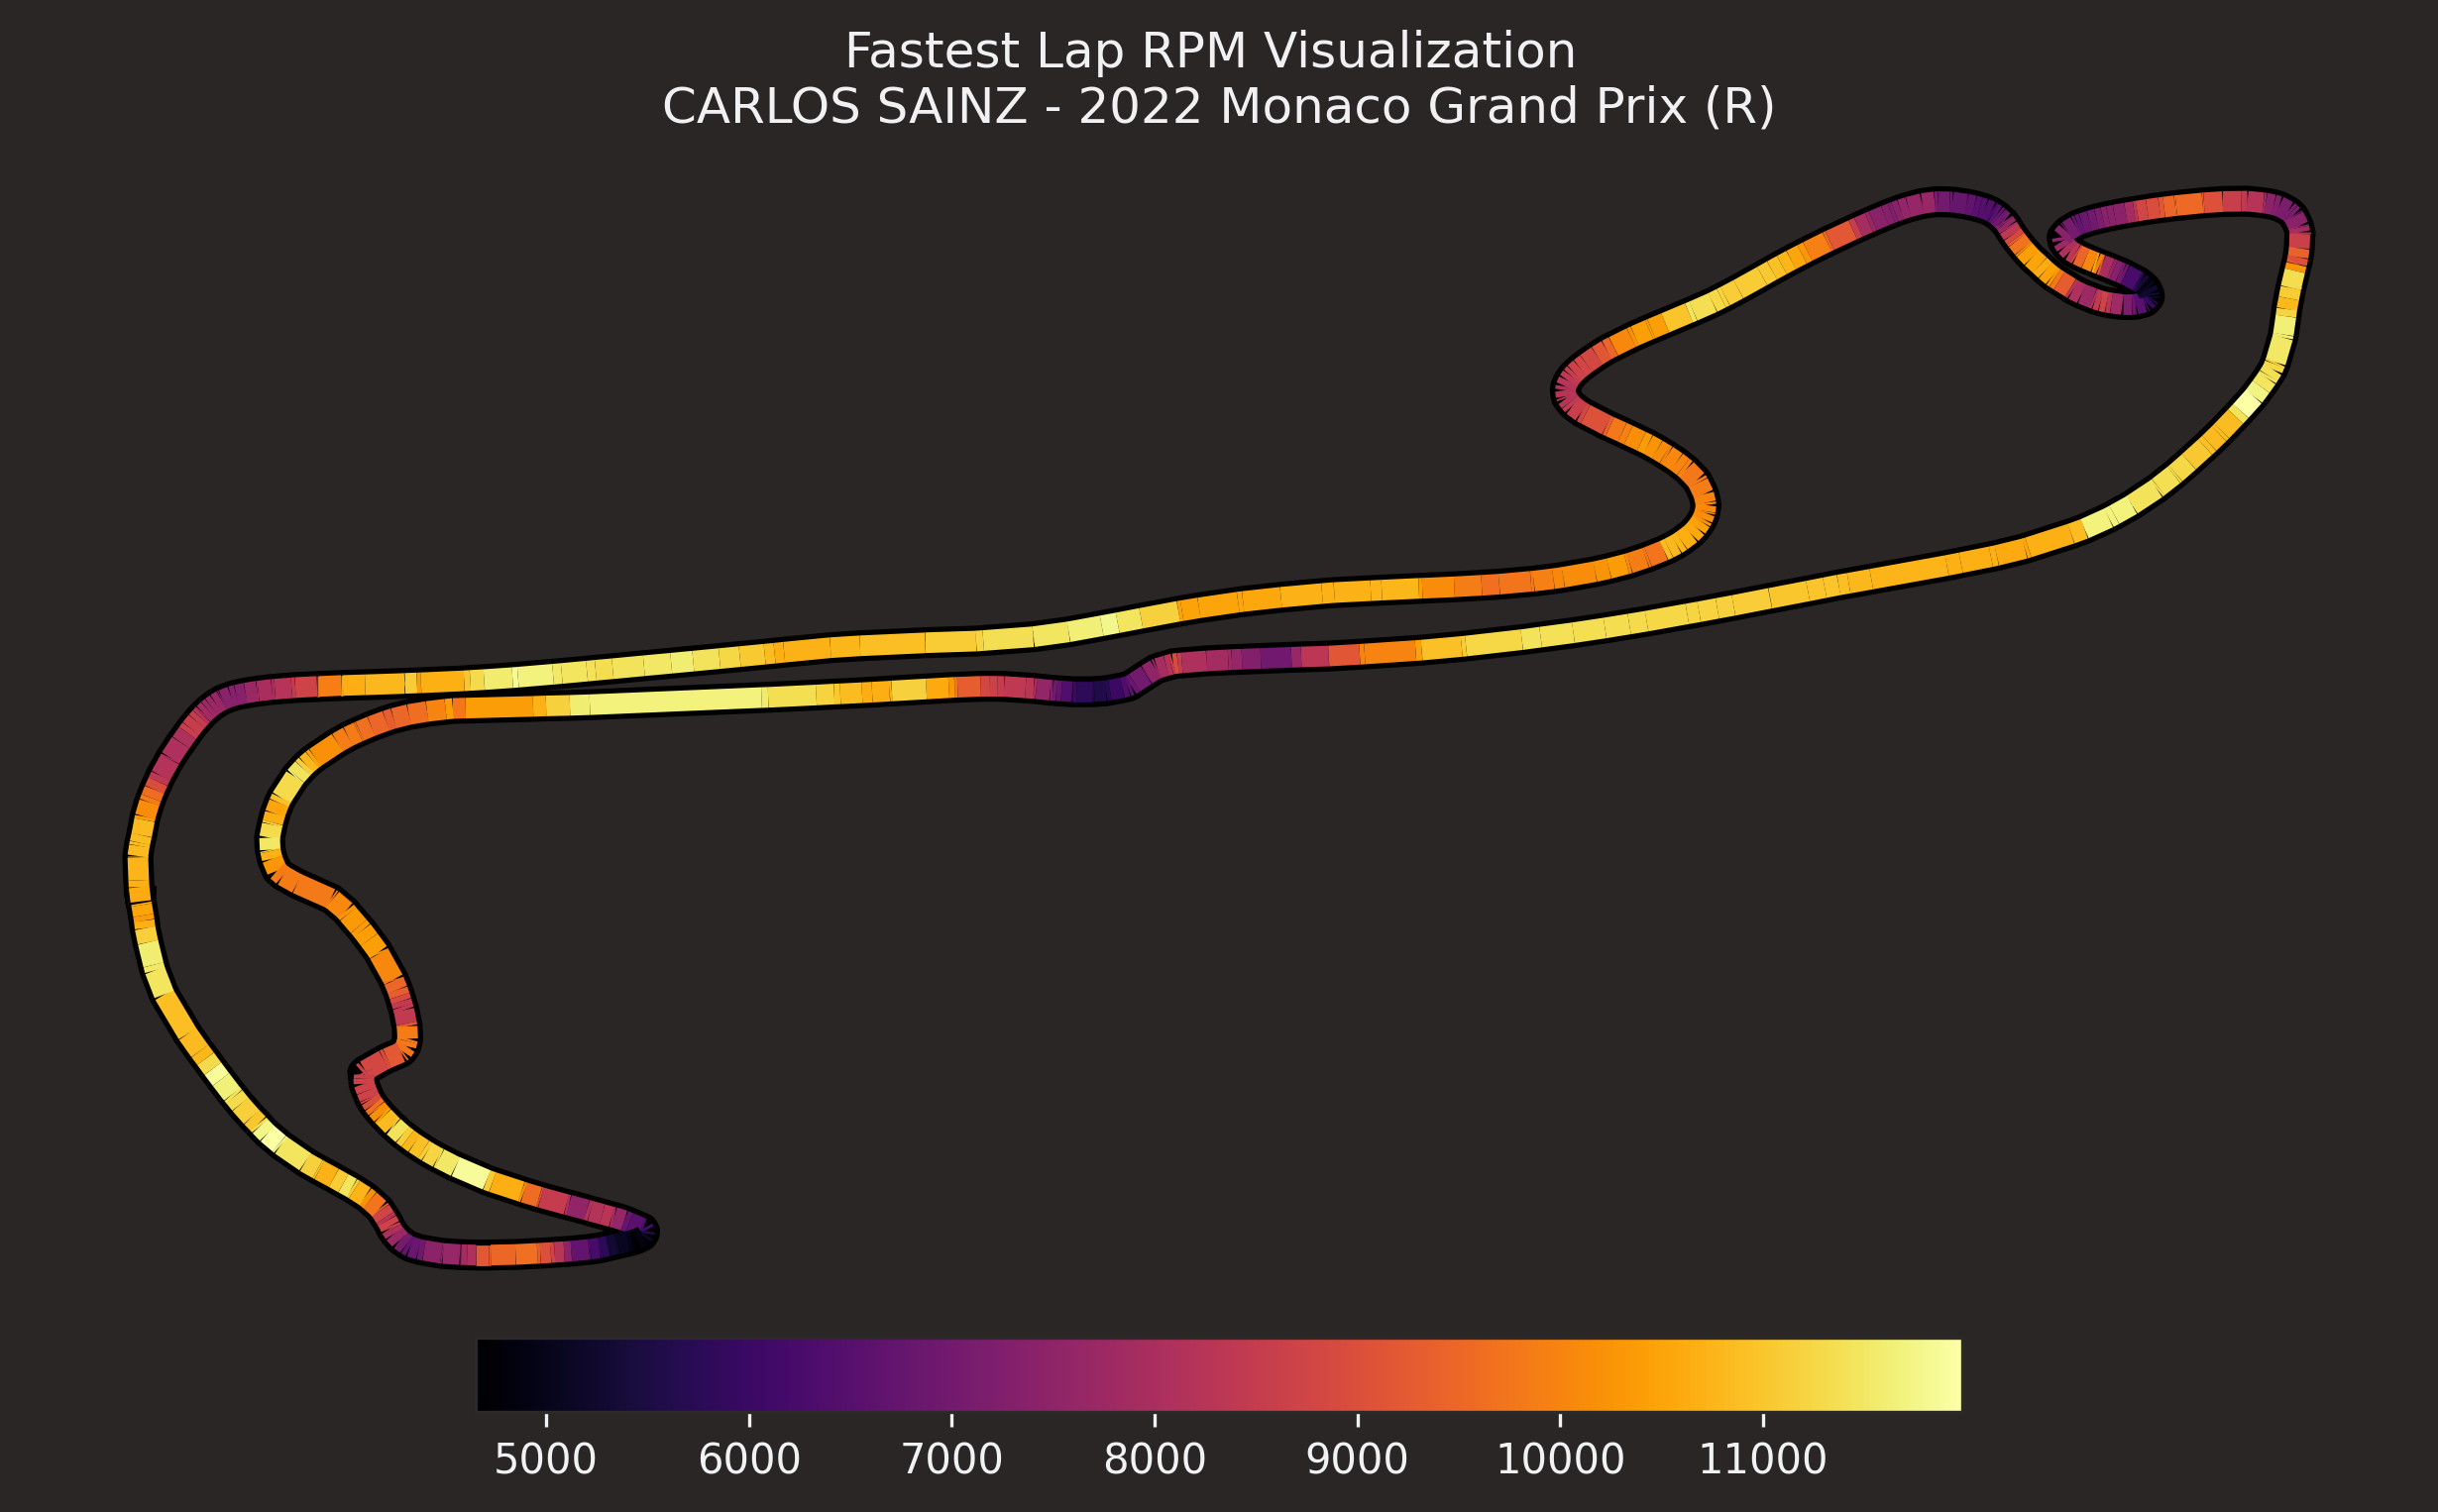

In [29]:
# Podium - 2:

cmap = matplotlib.colormaps['inferno']

fig, ax = plt.subplots(sharex=True, sharey=True ,figsize=(10,5),dpi=300)

fig.suptitle(
    f"Fastest Lap RPM Visualization \n"
    f"{fastf1.plotting.DRIVER_TRANSLATE[pod_2['Driver']].upper()} - {year} {race_data.event['EventName']} ({session})"
)

plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.12)
ax.axis('off')

ax.plot(pod_2_tel['X'],pod_2_tel['Y'], color='black', linestyle='-', linewidth=7.5, zorder=0)

norm = plt.Normalize(pod_2_tel['RPM'].min(), pod_2_tel['RPM'].max())
lc = LineCollection(segments_2, cmap=cmap , norm=norm, linestyle='-', linewidth=5)

lc.set_array(pod_2_tel['RPM'])

line = ax.add_collection(lc)

cbaxes = fig.add_axes([0.25, 0.05, 0.5, 0.05])
normlegend = matplotlib.colors.Normalize(vmin=pod_2_tel['RPM'].min(), vmax=pod_2_tel['RPM'].max())
legend = matplotlib.colorbar.ColorbarBase(cbaxes, norm=normlegend, cmap=cmap , orientation="horizontal")

plt.show()

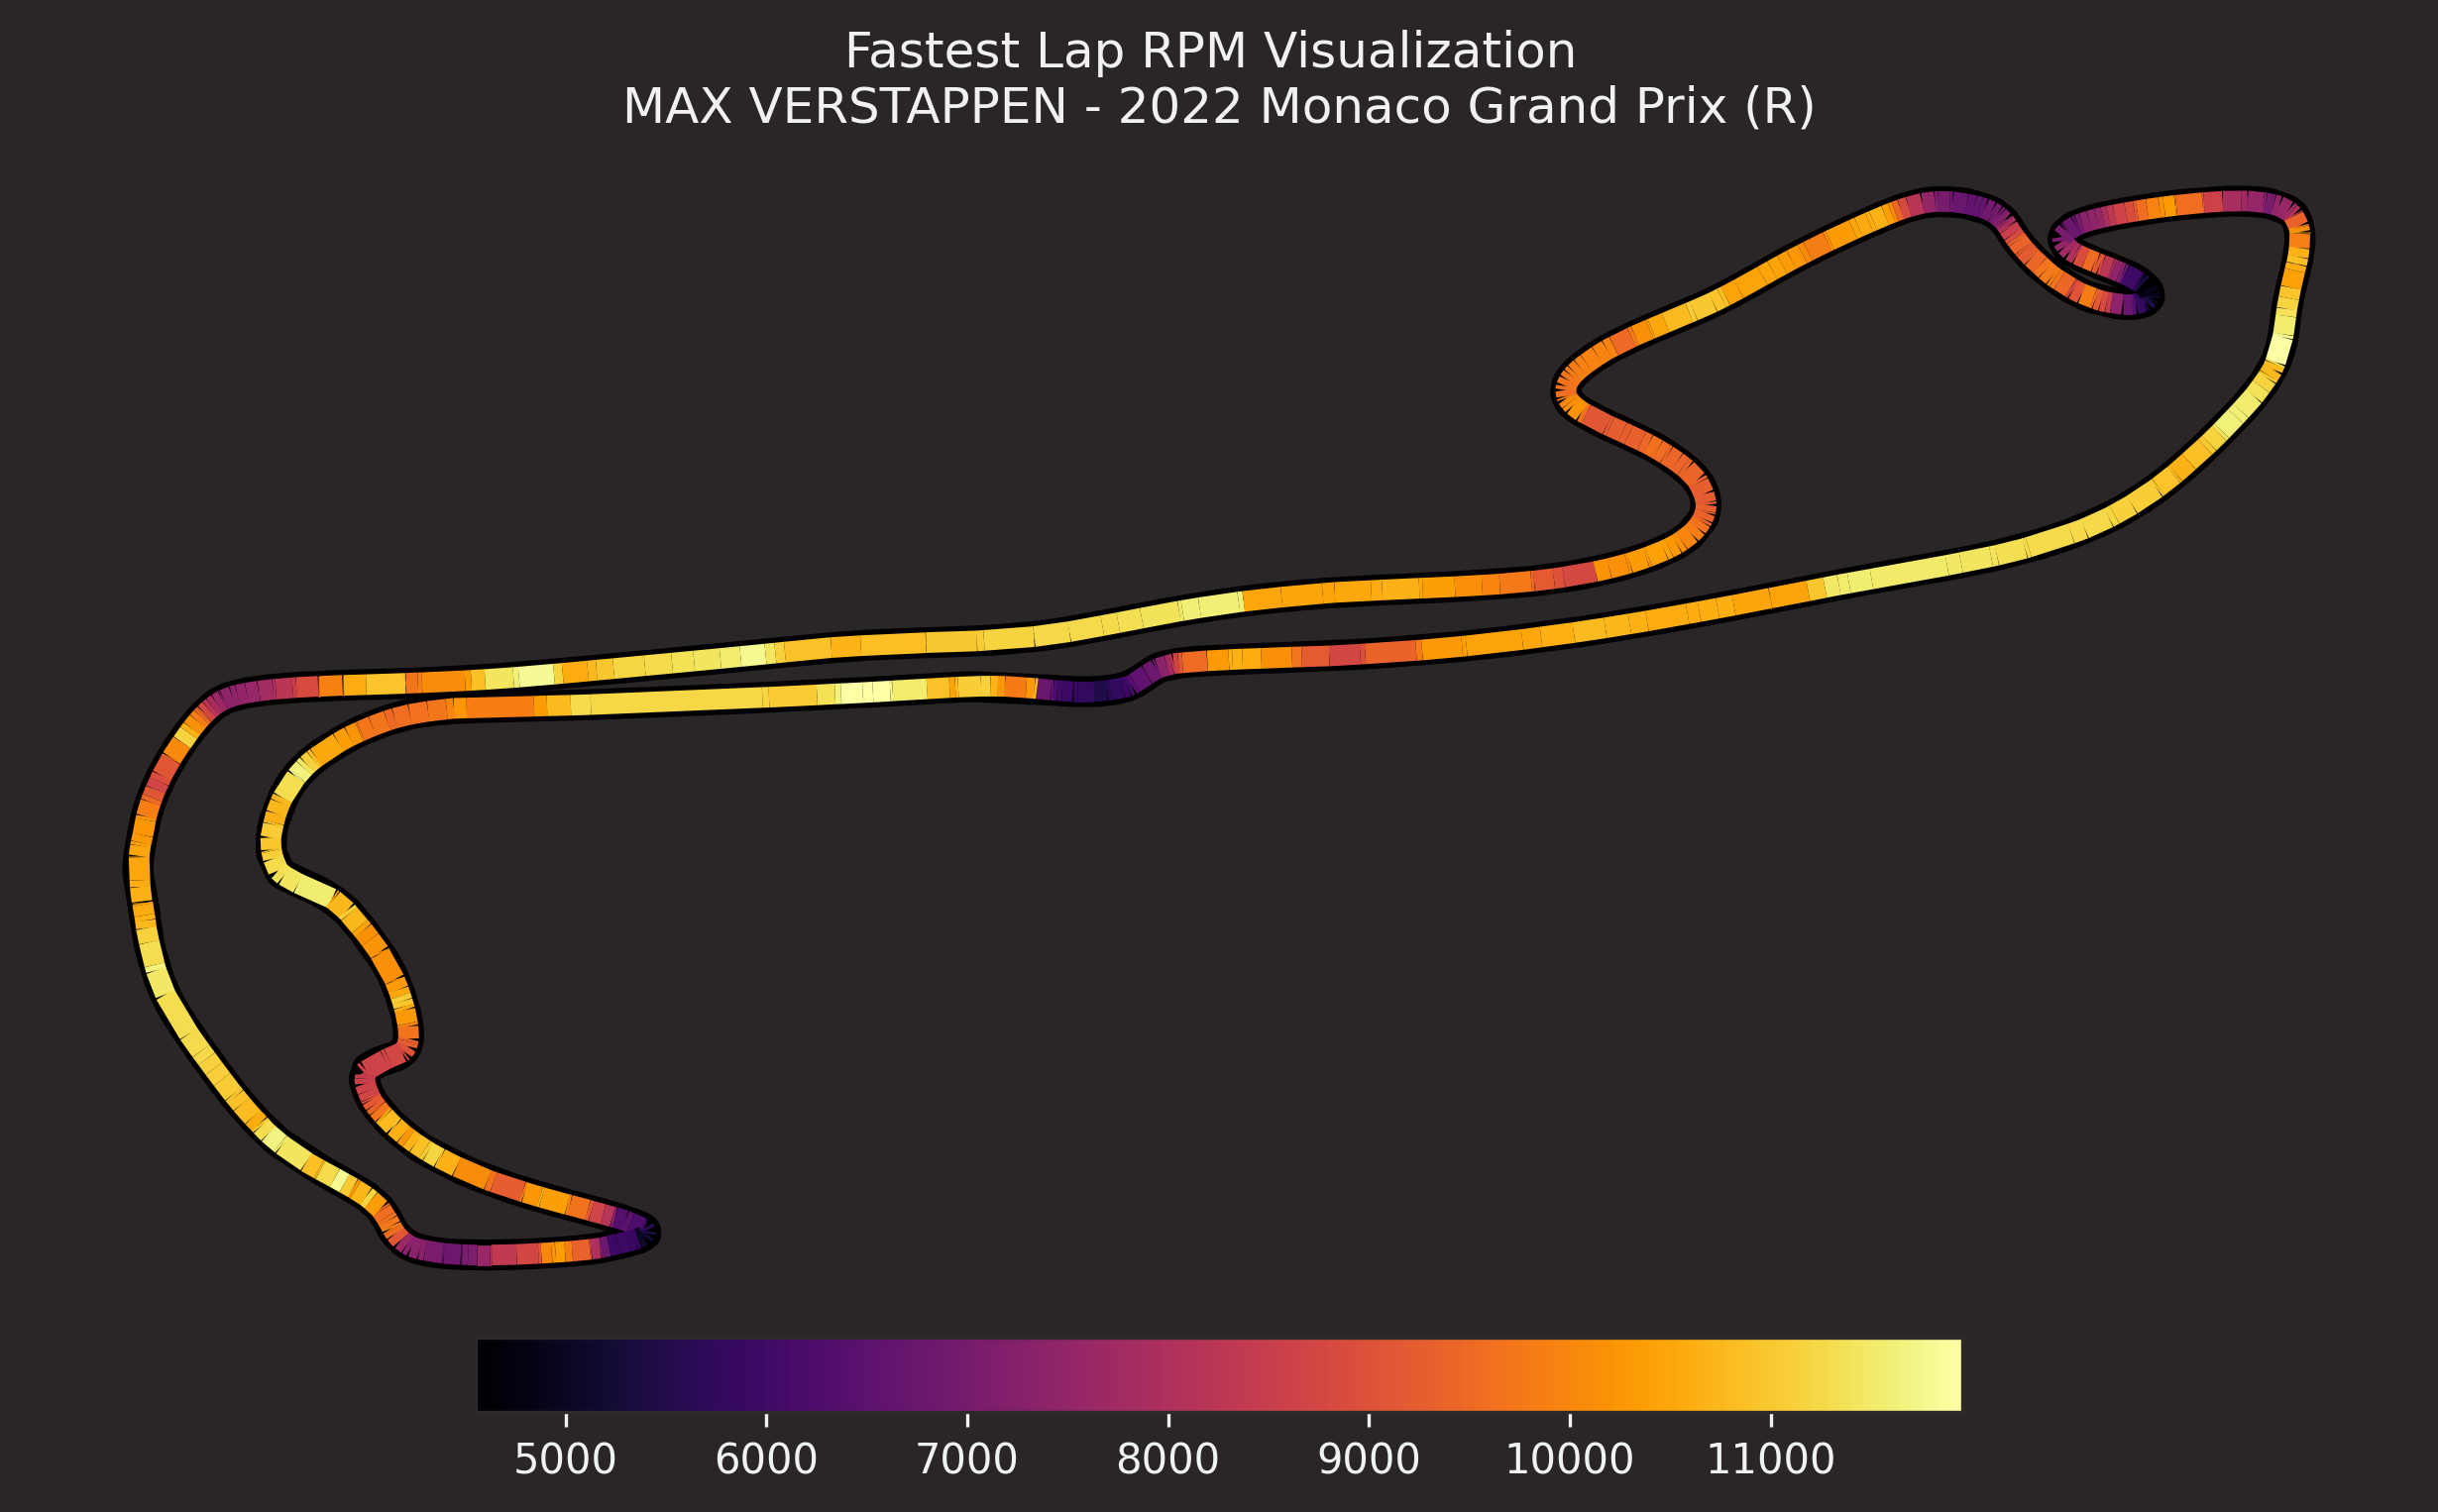

In [30]:
# Podium - 3:

cmap = matplotlib.colormaps['inferno']

fig, ax = plt.subplots(sharex=True, sharey=True ,figsize=(10,5),dpi=300)

fig.suptitle(
    f"Fastest Lap RPM Visualization \n"
    f"{fastf1.plotting.DRIVER_TRANSLATE[pod_3['Driver']].upper()} - {year} {race_data.event['EventName']} ({session})"
)

plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.12)
ax.axis('off')

ax.plot(pod_3_tel['X'],pod_3_tel['Y'], color='black', linestyle='-', linewidth=7.5, zorder=0)

norm = plt.Normalize(pod_3_tel['RPM'].min(), pod_3_tel['RPM'].max())
lc = LineCollection(segments_3, cmap=cmap , norm=norm, linestyle='-', linewidth=5)

lc.set_array(pod_3_tel['RPM'])

line = ax.add_collection(lc)

cbaxes = fig.add_axes([0.25, 0.05, 0.5, 0.05])
normlegend = matplotlib.colors.Normalize(vmin=pod_3_tel['RPM'].min(), vmax=pod_3_tel['RPM'].max())
legend = matplotlib.colorbar.ColorbarBase(cbaxes, norm=normlegend, cmap=cmap , orientation="horizontal")

plt.show()

# Driver's Throttle

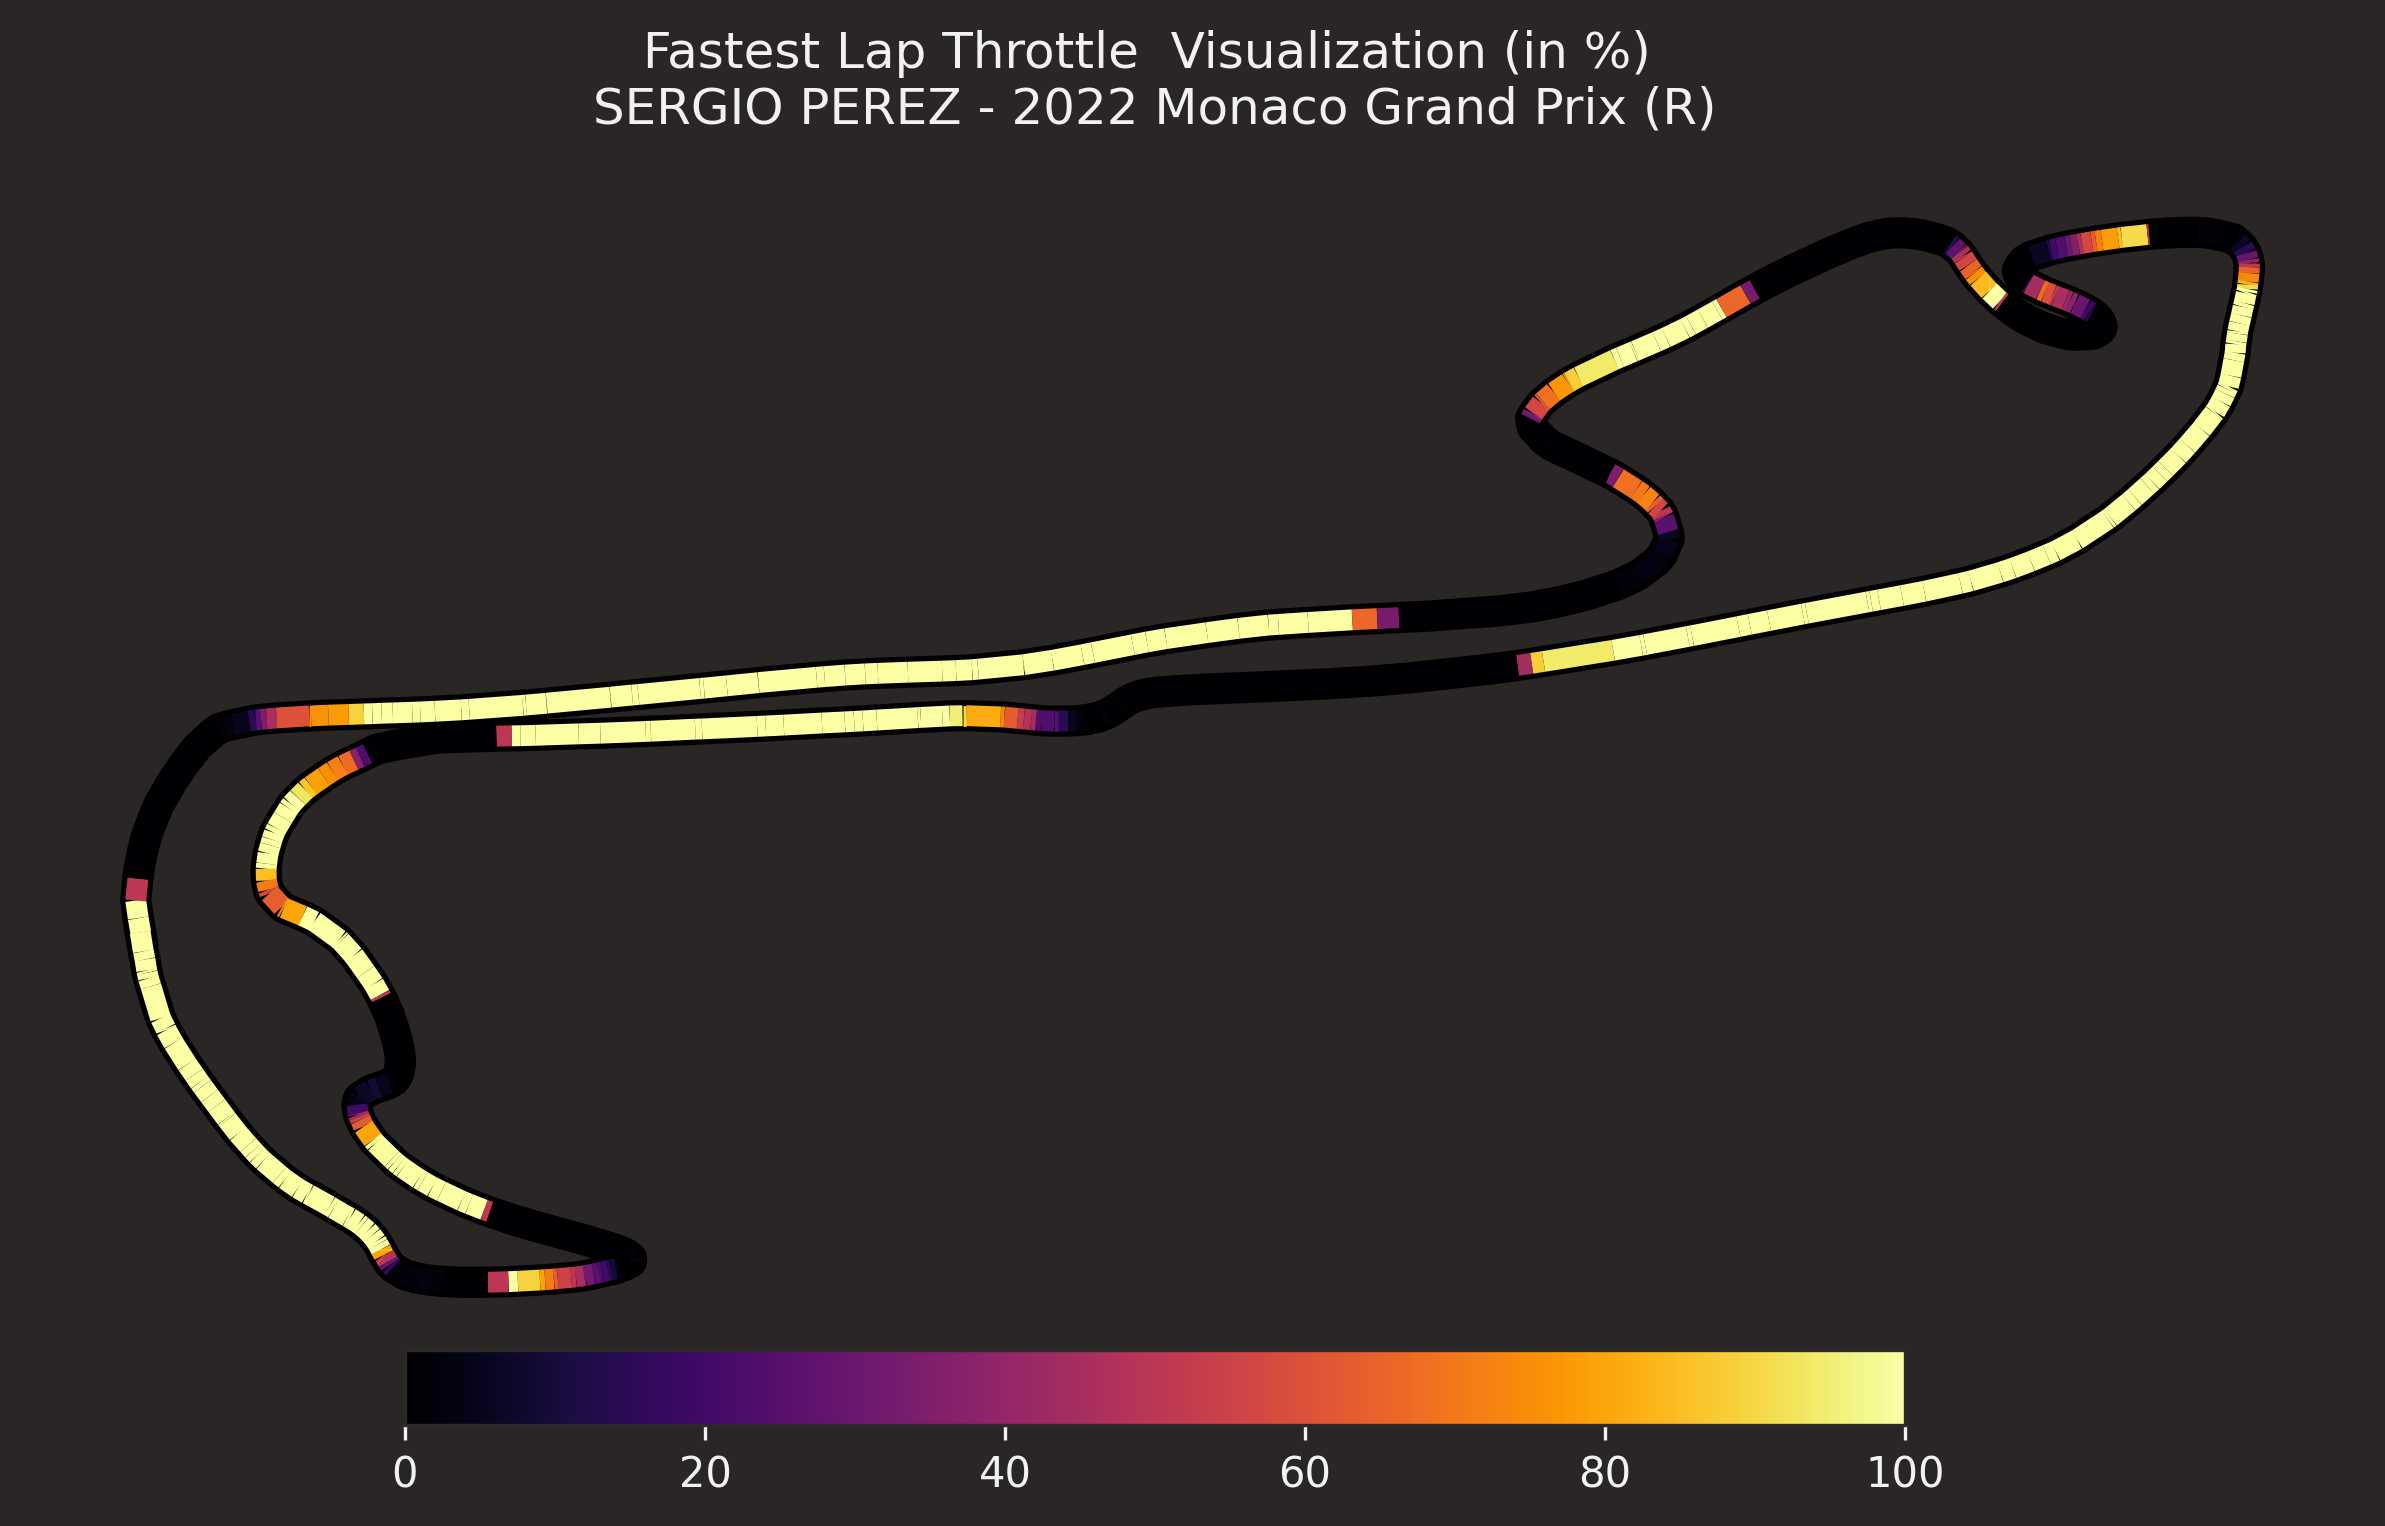

In [31]:
# Podium - 1:

cmap = matplotlib.colormaps['inferno']

fig, ax = plt.subplots(sharex=True, sharey=True ,figsize=(10,5),dpi=300)

fig.suptitle(
    f"Fastest Lap Throttle  Visualization (in %) \n"
    f"{fastf1.plotting.DRIVER_TRANSLATE[pod_1['Driver']].upper()} - {year} {race_data.event['EventName']} ({session})"
)

ax.axis('off')

ax.plot(pod_1_tel['X'],pod_1_tel['Y'], color='black', linestyle='-', linewidth=7.5, zorder=0)

norm = plt.Normalize(pod_1_tel['Throttle'].min(), pod_1_tel['Throttle'].max())
lc = LineCollection(segments_1, cmap=cmap , norm=norm, linestyle='-', linewidth=5)

lc.set_array(pod_1_tel['Throttle'])

line = ax.add_collection(lc)

cbaxes = fig.add_axes([0.25, 0.05, 0.5, 0.05])
normlegend = matplotlib.colors.Normalize(vmin=pod_1_tel['Throttle'].min(), vmax=pod_1_tel['Throttle'].max())
legend = matplotlib.colorbar.ColorbarBase(cbaxes, norm=normlegend, cmap=cmap , orientation="horizontal")

plt.show()

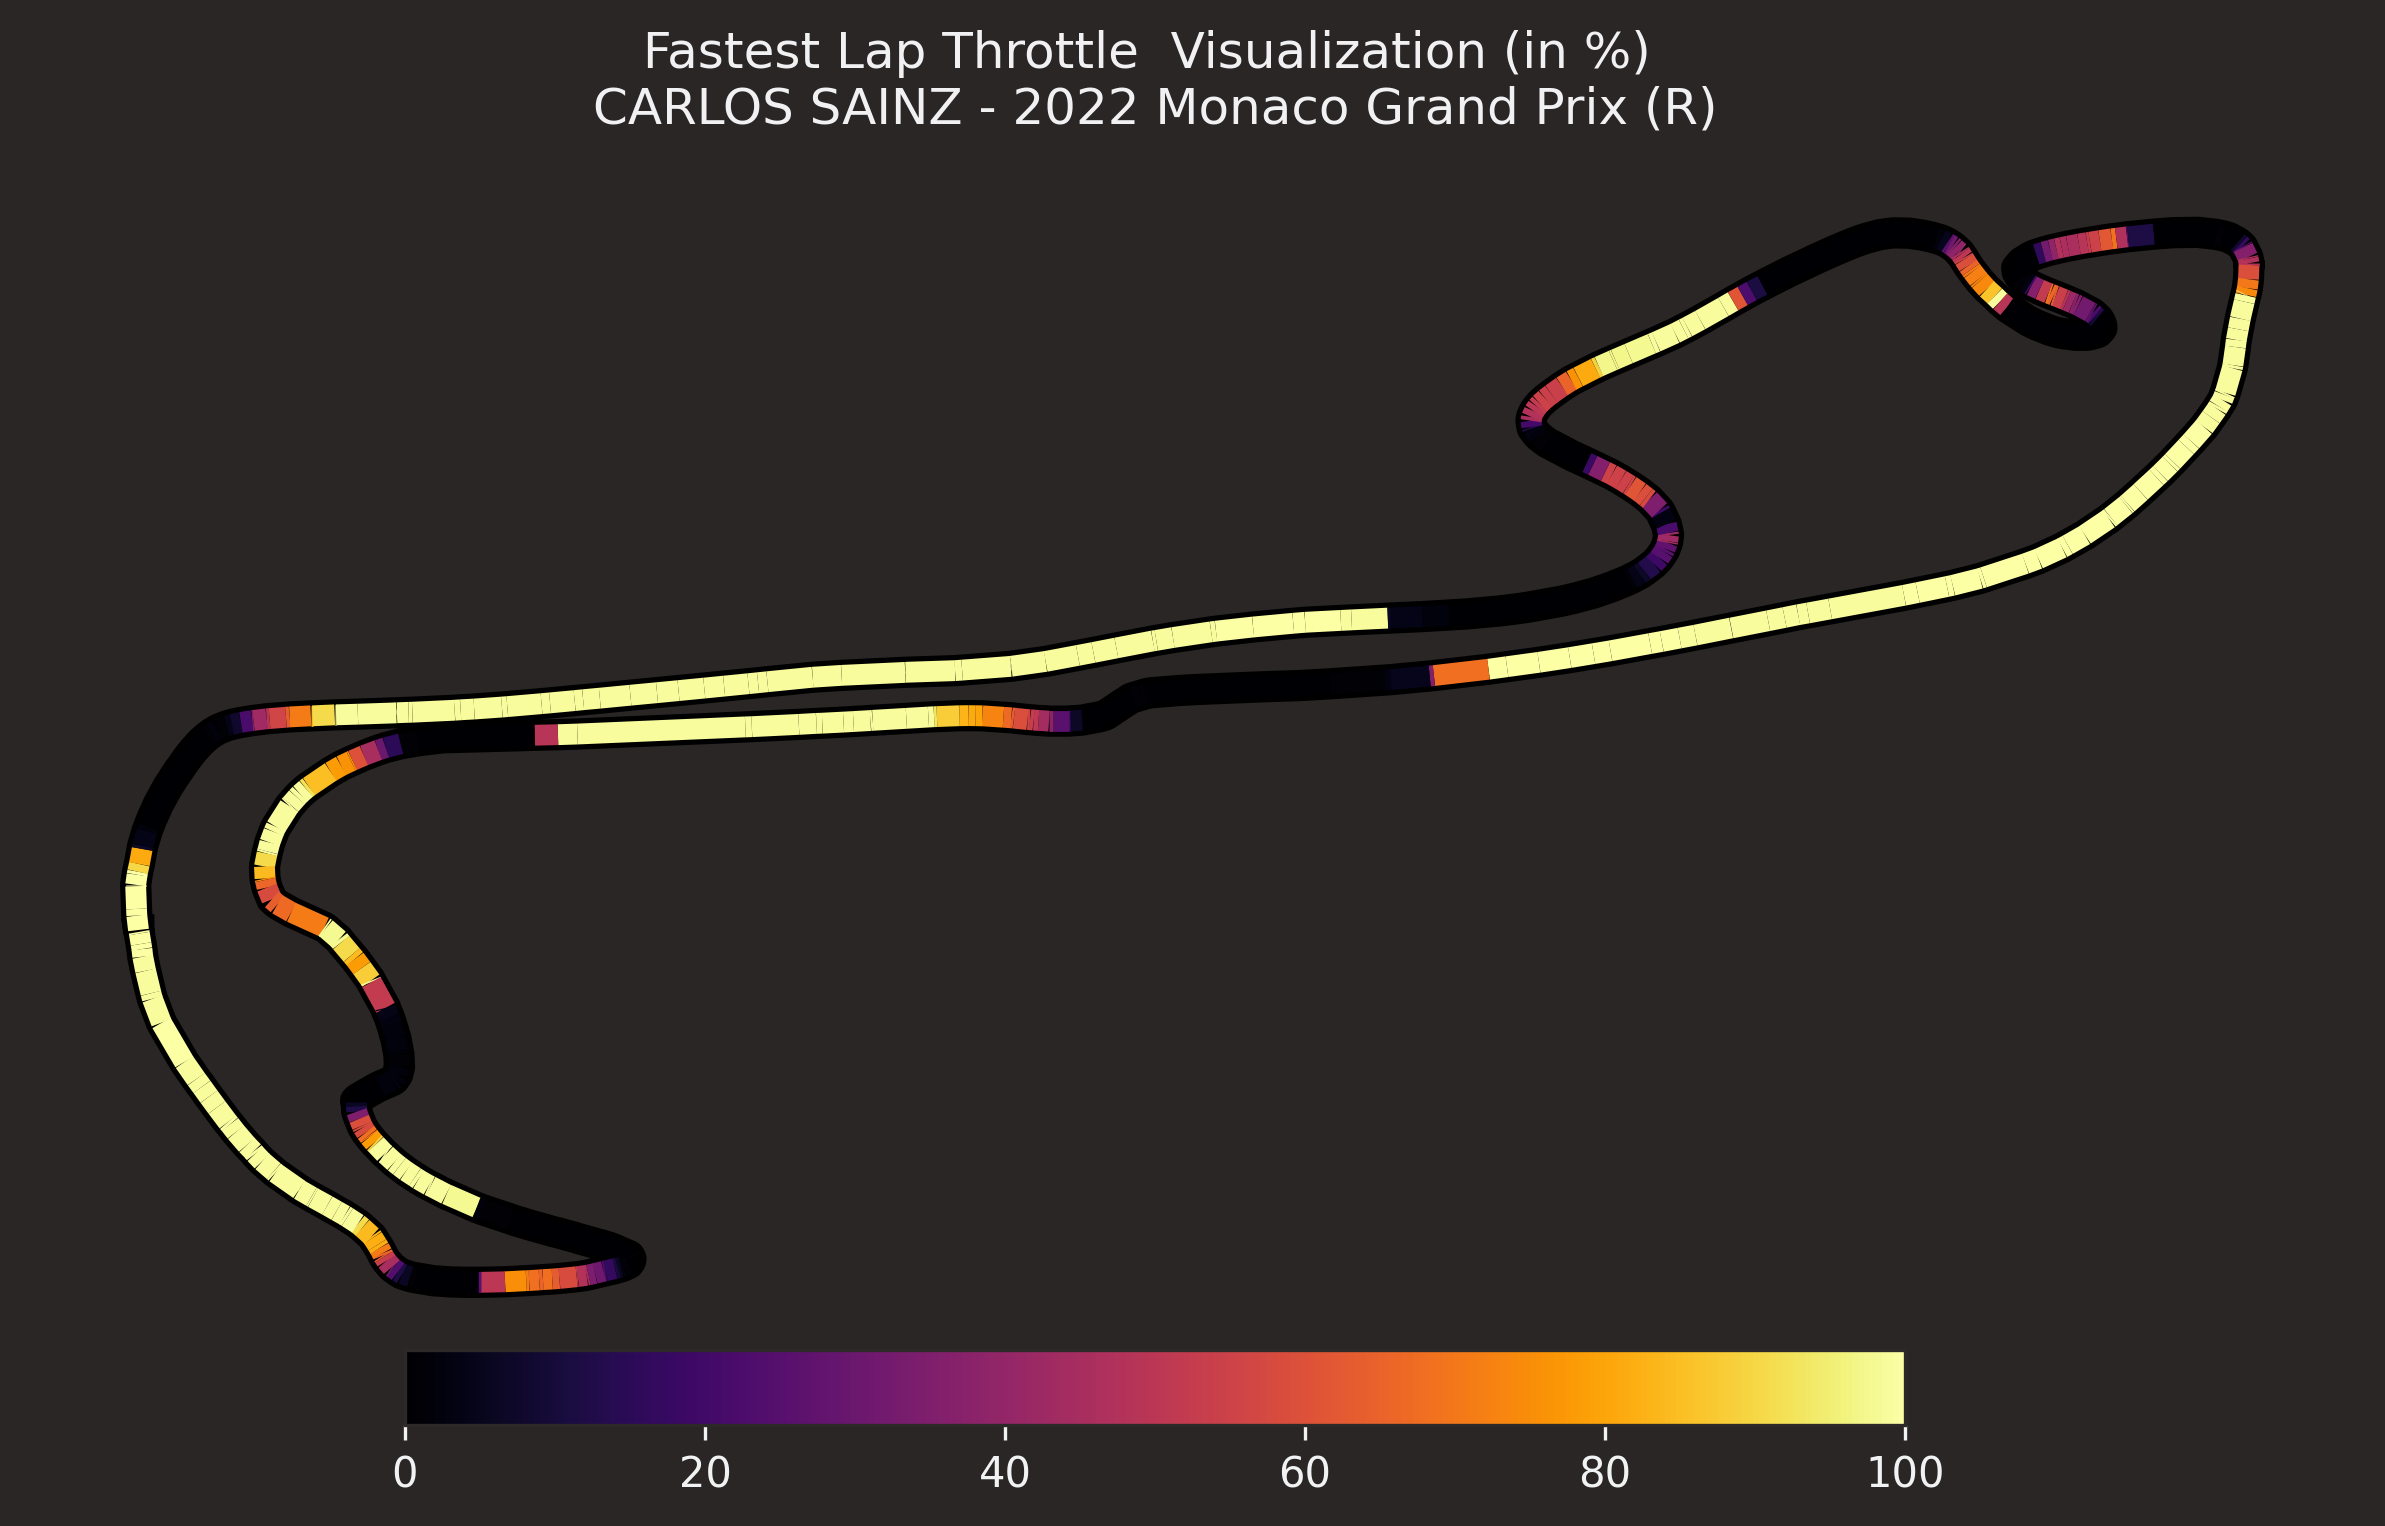

In [32]:
# Podium - 2:

cmap = matplotlib.colormaps['inferno']

fig, ax = plt.subplots(sharex=True, sharey=True ,figsize=(10,5),dpi=300)

fig.suptitle(
    f"Fastest Lap Throttle  Visualization (in %) \n"
    f"{fastf1.plotting.DRIVER_TRANSLATE[pod_2['Driver']].upper()} - {year} {race_data.event['EventName']} ({session})"
)

ax.axis('off')

ax.plot(pod_2_tel['X'],pod_2_tel['Y'], color='black', linestyle='-', linewidth=7.5, zorder=0)

norm = plt.Normalize(pod_2_tel['Throttle'].min(), pod_2_tel['Throttle'].max())
lc = LineCollection(segments_2, cmap=cmap , norm=norm, linestyle='-', linewidth=5)

lc.set_array(pod_2_tel['Throttle'])

line = ax.add_collection(lc)

cbaxes = fig.add_axes([0.25, 0.05, 0.5, 0.05])
normlegend = matplotlib.colors.Normalize(vmin=pod_2_tel['Throttle'].min(), vmax=pod_2_tel['Throttle'].max())
legend = matplotlib.colorbar.ColorbarBase(cbaxes, norm=normlegend, cmap=cmap , orientation="horizontal")

plt.show()

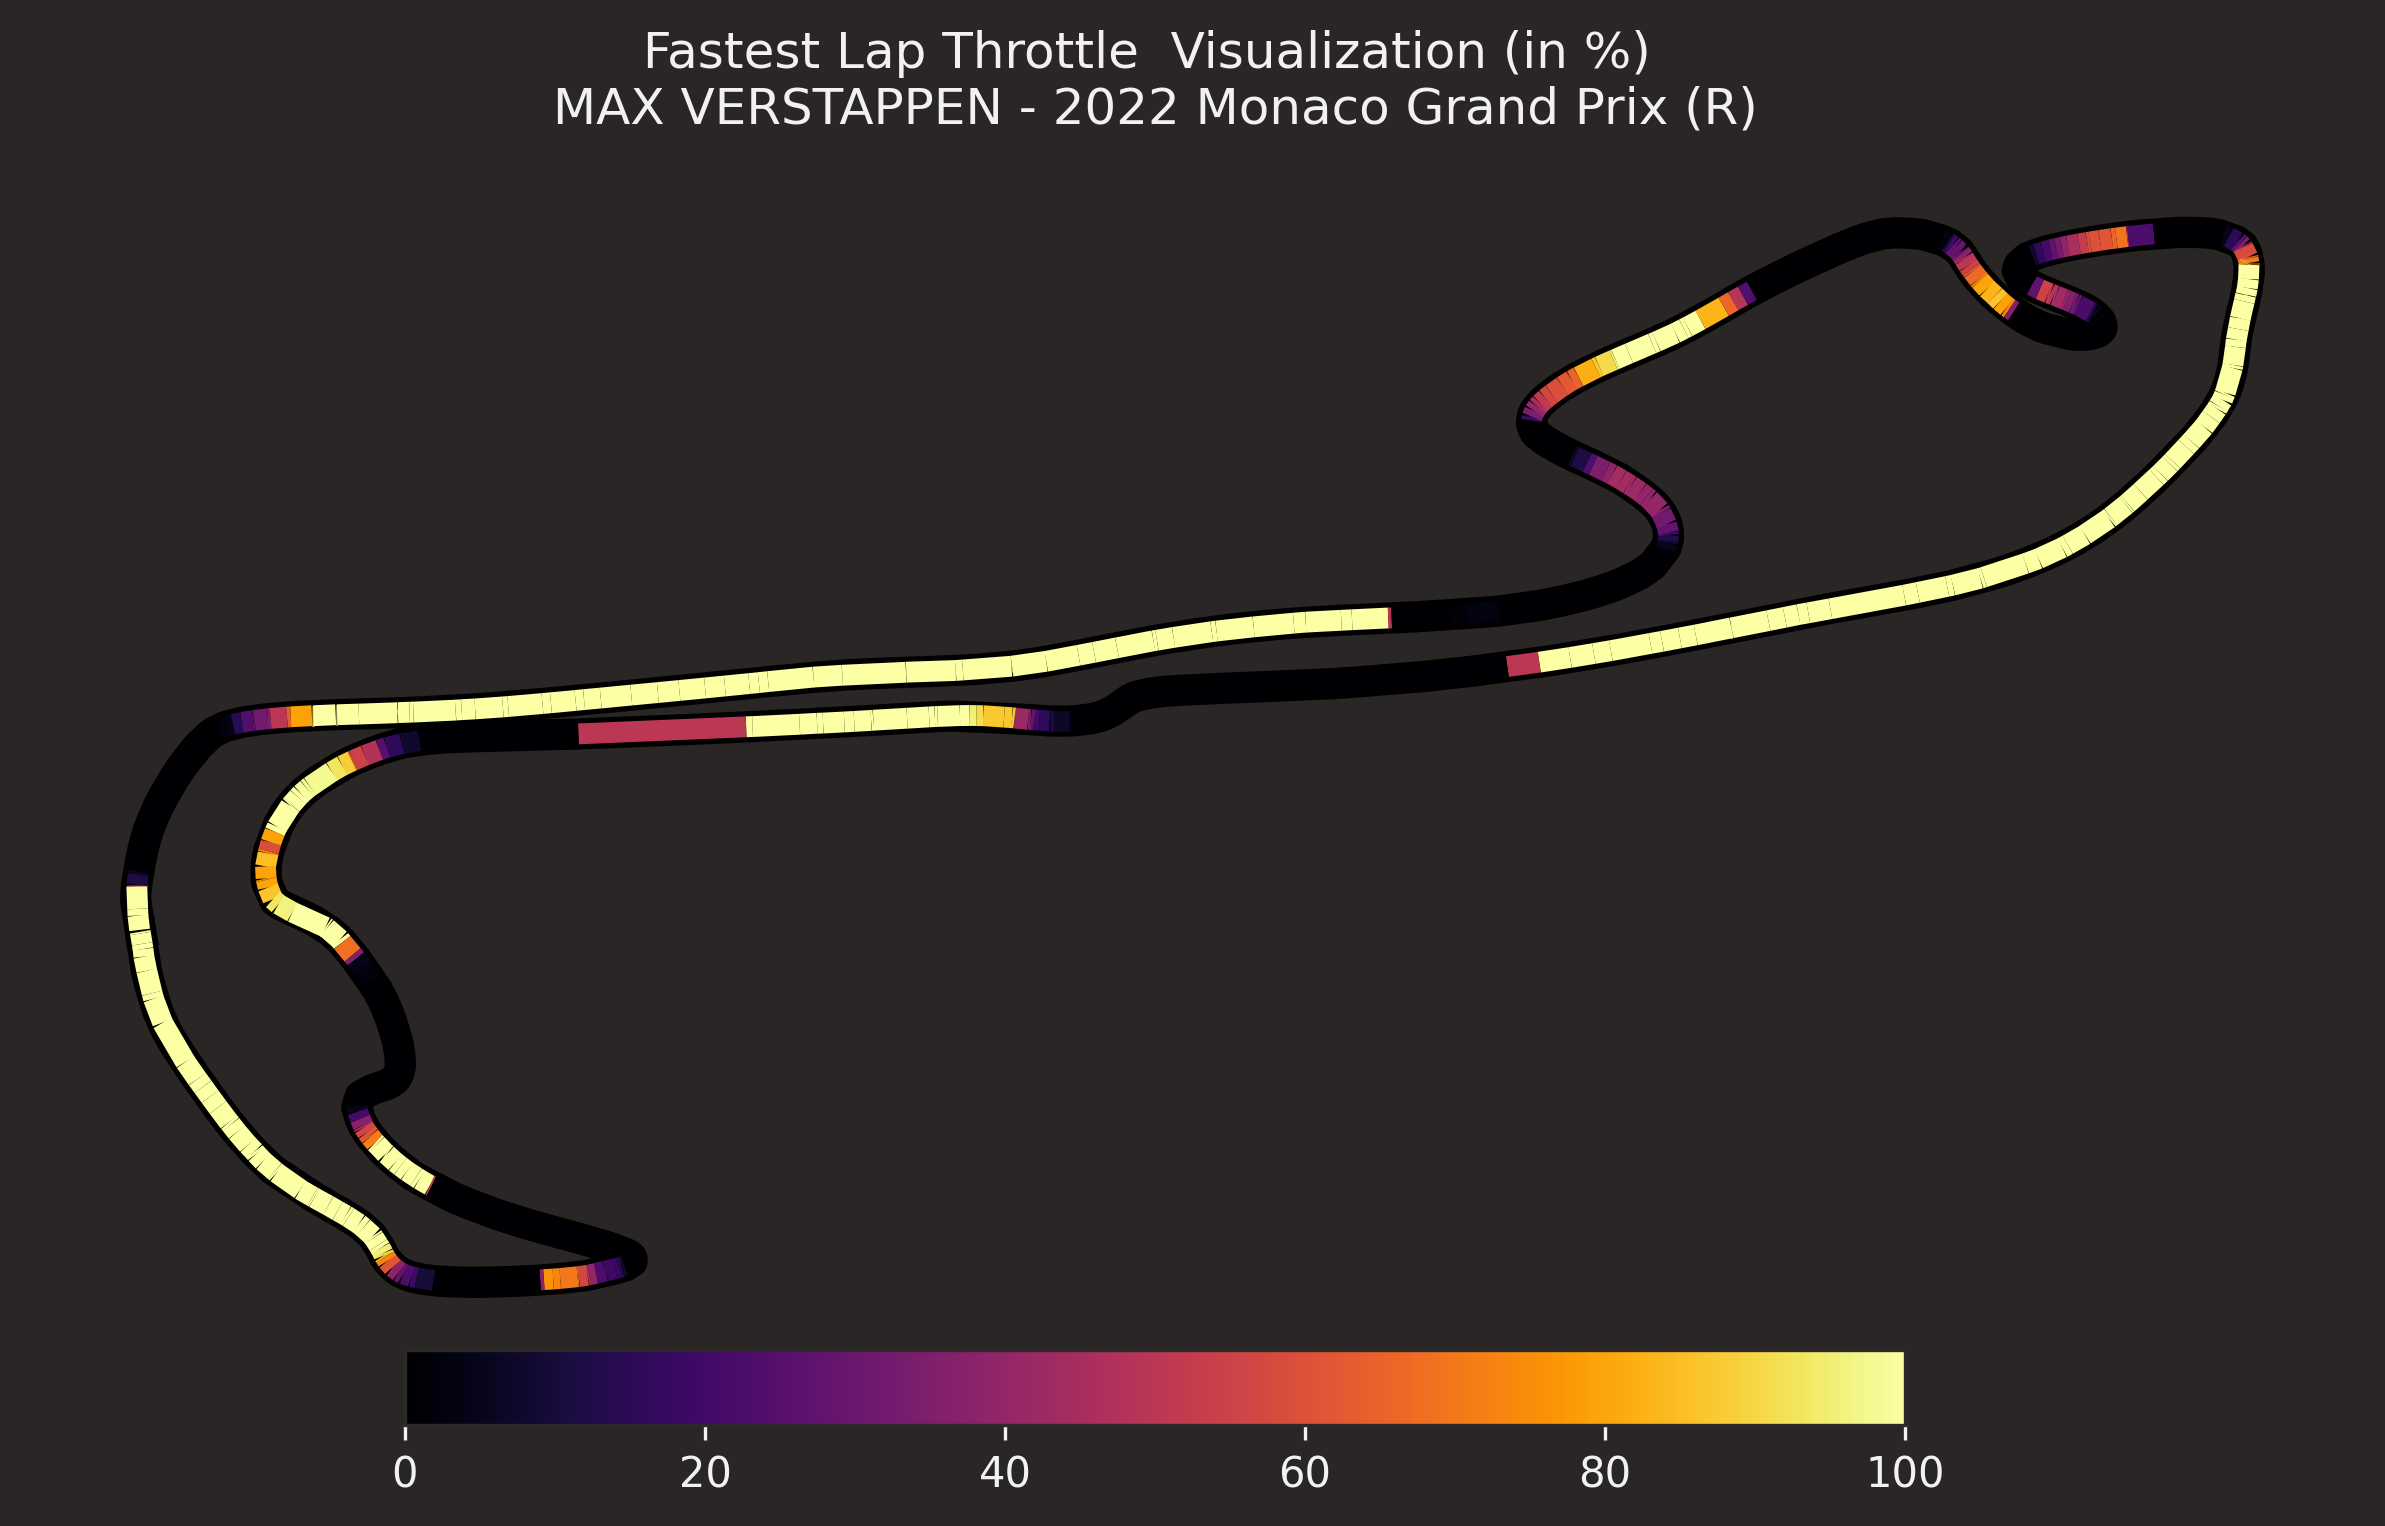

In [33]:
# Podium - 3:

cmap = matplotlib.colormaps['inferno']

fig, ax = plt.subplots(sharex=True, sharey=True ,figsize=(10,5),dpi=300)

fig.suptitle(
    f"Fastest Lap Throttle  Visualization (in %) \n"
    f"{fastf1.plotting.DRIVER_TRANSLATE[pod_3['Driver']].upper()} - {year} {race_data.event['EventName']} ({session})"
)

ax.axis('off')

ax.plot(pod_3_tel['X'],pod_3_tel['Y'], color='black', linestyle='-', linewidth=7.5, zorder=0)

norm = plt.Normalize(pod_3_tel['Throttle'].min(), pod_3_tel['Throttle'].max())
lc = LineCollection(segments_3, cmap=cmap , norm=norm, linestyle='-', linewidth=5)

lc.set_array(pod_3_tel['Throttle'])

line = ax.add_collection(lc)

cbaxes = fig.add_axes([0.25, 0.05, 0.5, 0.05])
normlegend = matplotlib.colors.Normalize(vmin=pod_3_tel['Throttle'].min(), vmax=pod_3_tel['Throttle'].max())
legend = matplotlib.colorbar.ColorbarBase(cbaxes, norm=normlegend, cmap=cmap , orientation="horizontal")

plt.show()

# Driver's Brake

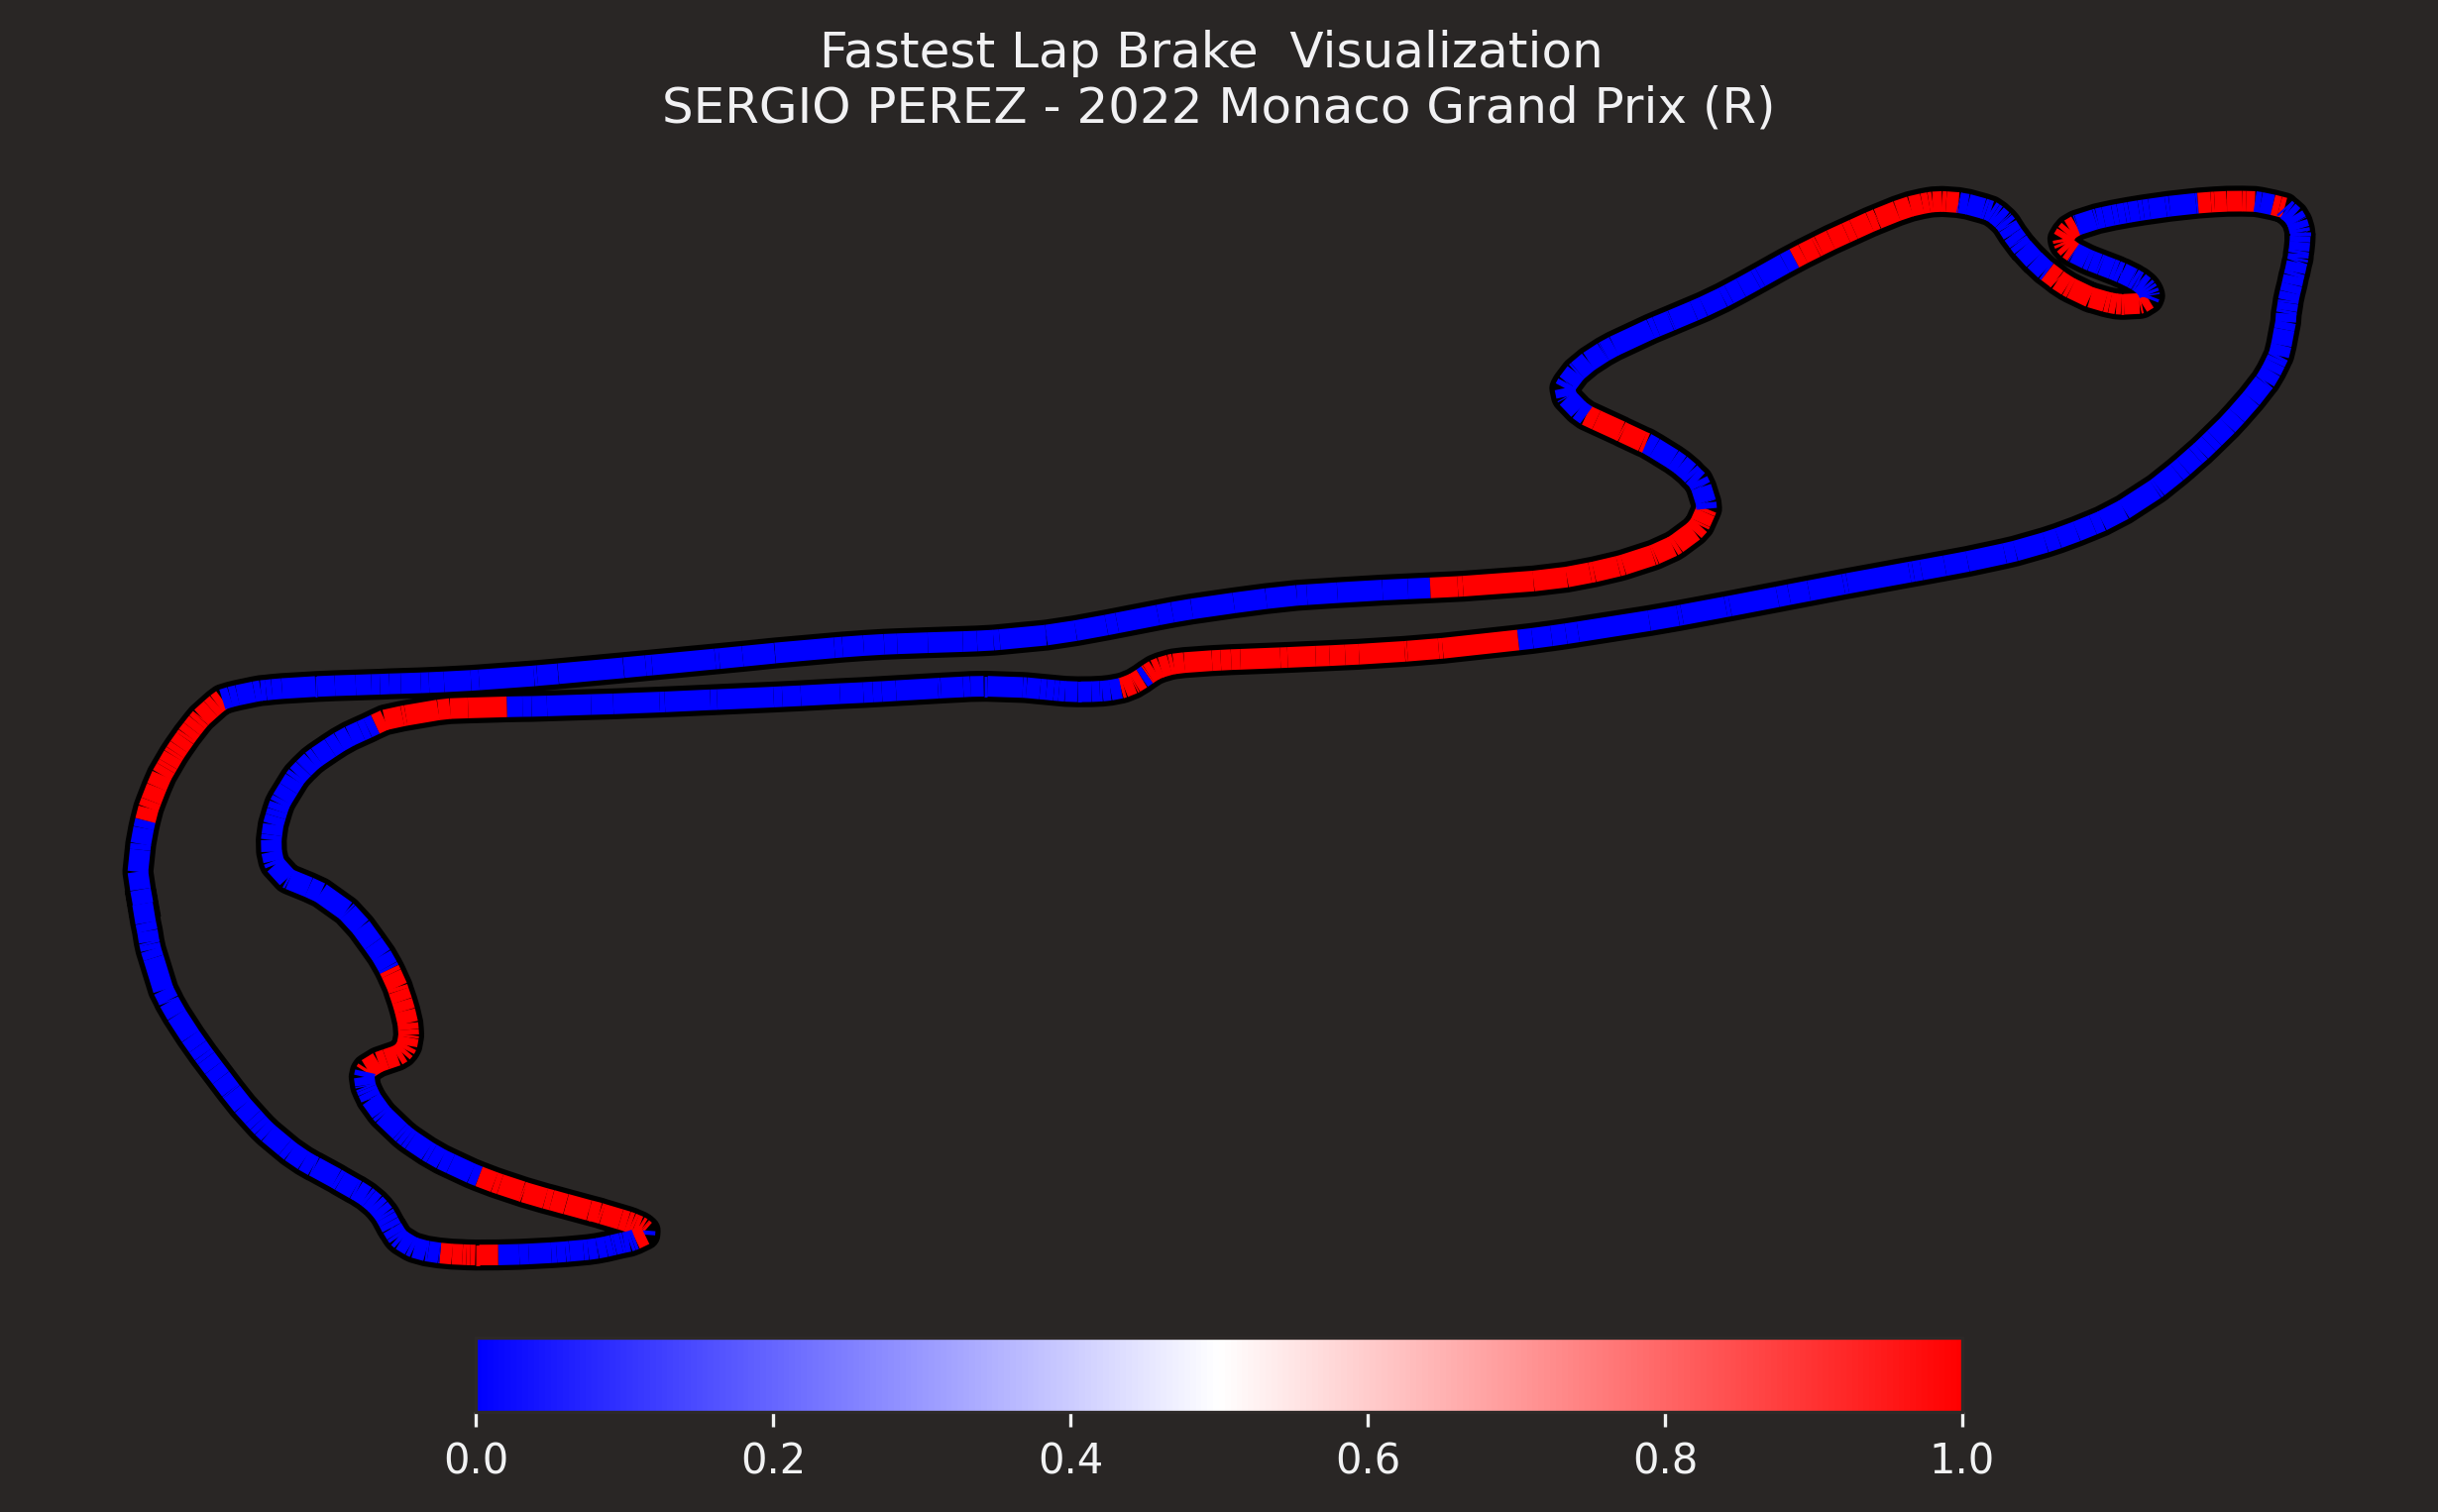

In [34]:
# Podium - 1:

cmap = matplotlib.colormaps['bwr']

fig, ax = plt.subplots(sharex=True, sharey=True ,figsize=(10,5),dpi=300)

fig.suptitle(
    f"Fastest Lap Brake  Visualization \n"
    f"{fastf1.plotting.DRIVER_TRANSLATE[pod_1['Driver']].upper()} - {year} {race_data.event['EventName']} ({session})"
)

plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.12)
ax.axis('off')

ax.plot(pod_1_tel['X'],pod_1_tel['Y'], color='black', linestyle='-', linewidth=7.5, zorder=0)

norm = plt.Normalize(pod_1_tel['Brake'].min(), pod_1_tel['Brake'].max())
lc = LineCollection(segments_1, cmap=cmap , norm=norm, linestyle='-', linewidth=5)

lc.set_array(pod_1_tel['Brake'])

line = ax.add_collection(lc)

cbaxes = fig.add_axes([0.25, 0.05, 0.5, 0.05])
normlegend = matplotlib.colors.Normalize(vmin=pod_1_tel['Brake'].min(), vmax=pod_1_tel['Brake'].max())
legend = matplotlib.colorbar.ColorbarBase(cbaxes, norm=normlegend, cmap=cmap , orientation="horizontal")

plt.show()

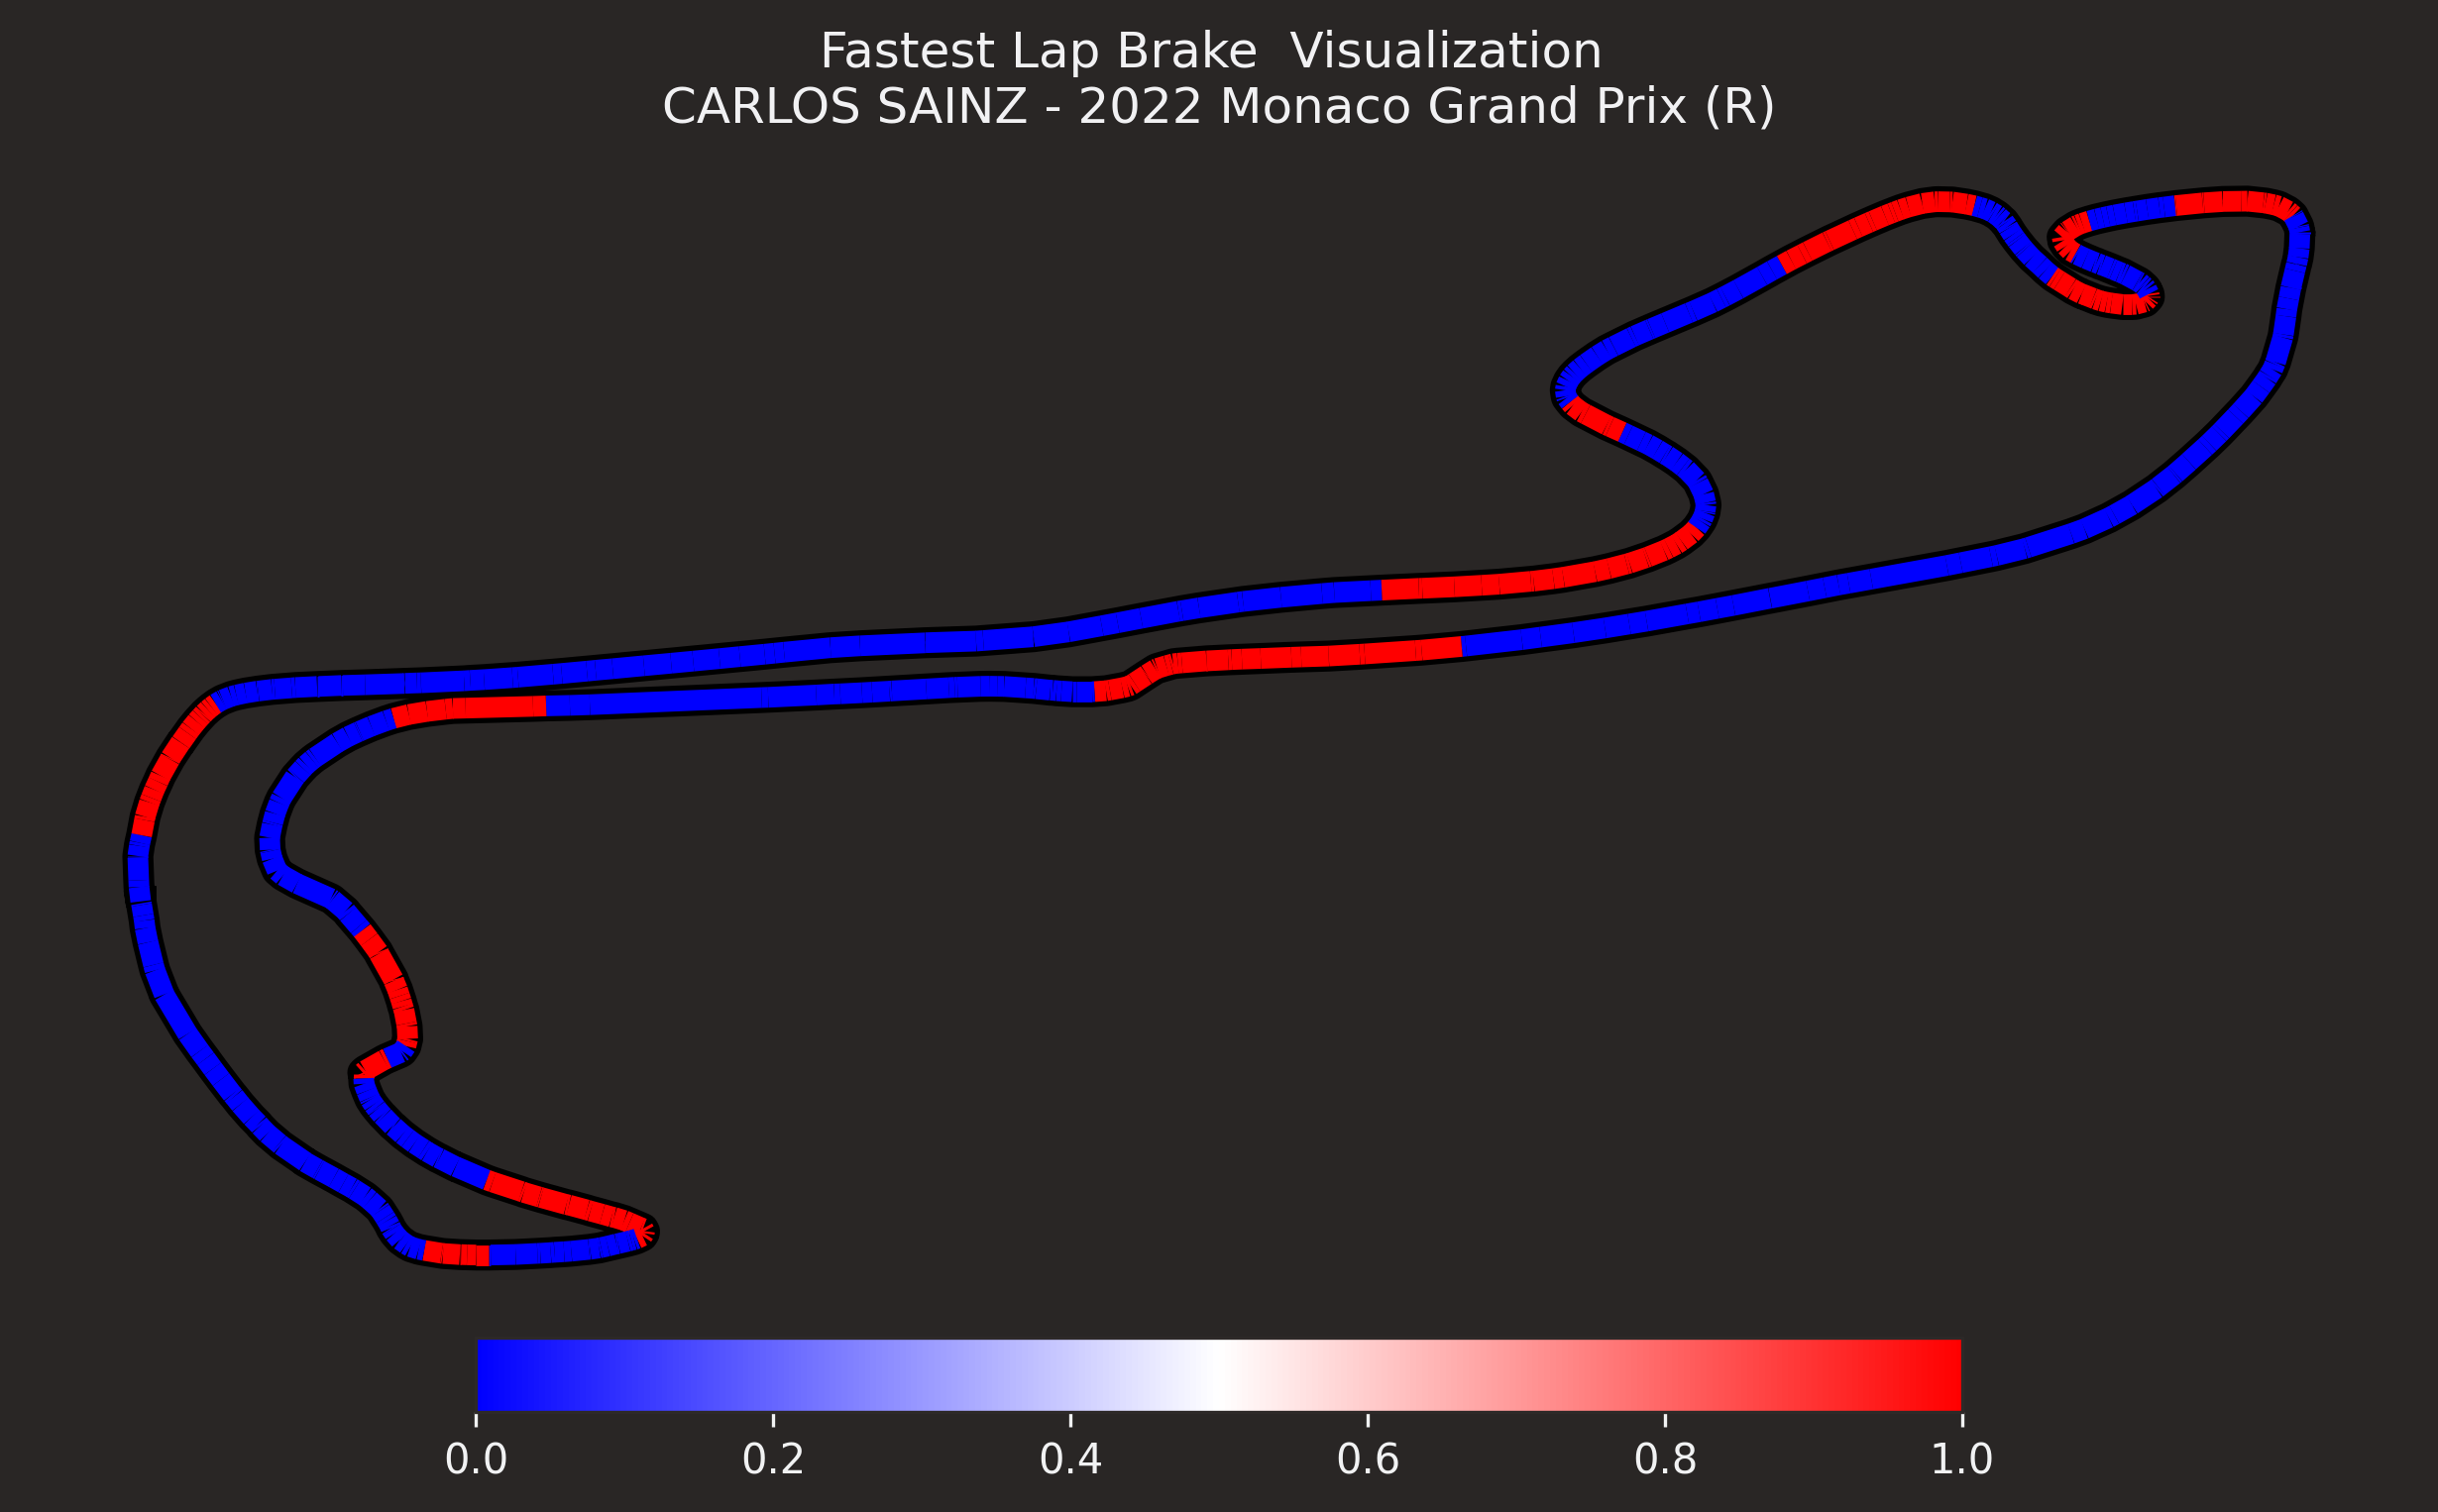

In [35]:
# Podium - 2:

cmap = matplotlib.colormaps['bwr']

fig, ax = plt.subplots(sharex=True, sharey=True ,figsize=(10,5),dpi=300)

fig.suptitle(
    f"Fastest Lap Brake  Visualization \n"
    f"{fastf1.plotting.DRIVER_TRANSLATE[pod_2['Driver']].upper()} - {year} {race_data.event['EventName']} ({session})"
)

plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.12)
ax.axis('off')

ax.plot(pod_2_tel['X'],pod_2_tel['Y'], color='black', linestyle='-', linewidth=7.5, zorder=0)

norm = plt.Normalize(pod_2_tel['Brake'].min(), pod_2_tel['Brake'].max())
lc = LineCollection(segments_2, cmap=cmap , norm=norm, linestyle='-', linewidth=5)

lc.set_array(pod_2_tel['Brake'])

line = ax.add_collection(lc)

cbaxes = fig.add_axes([0.25, 0.05, 0.5, 0.05])
normlegend = matplotlib.colors.Normalize(vmin=pod_2_tel['Brake'].min(), vmax=pod_2_tel['Brake'].max())
legend = matplotlib.colorbar.ColorbarBase(cbaxes, norm=normlegend, cmap=cmap , orientation="horizontal")

plt.show()

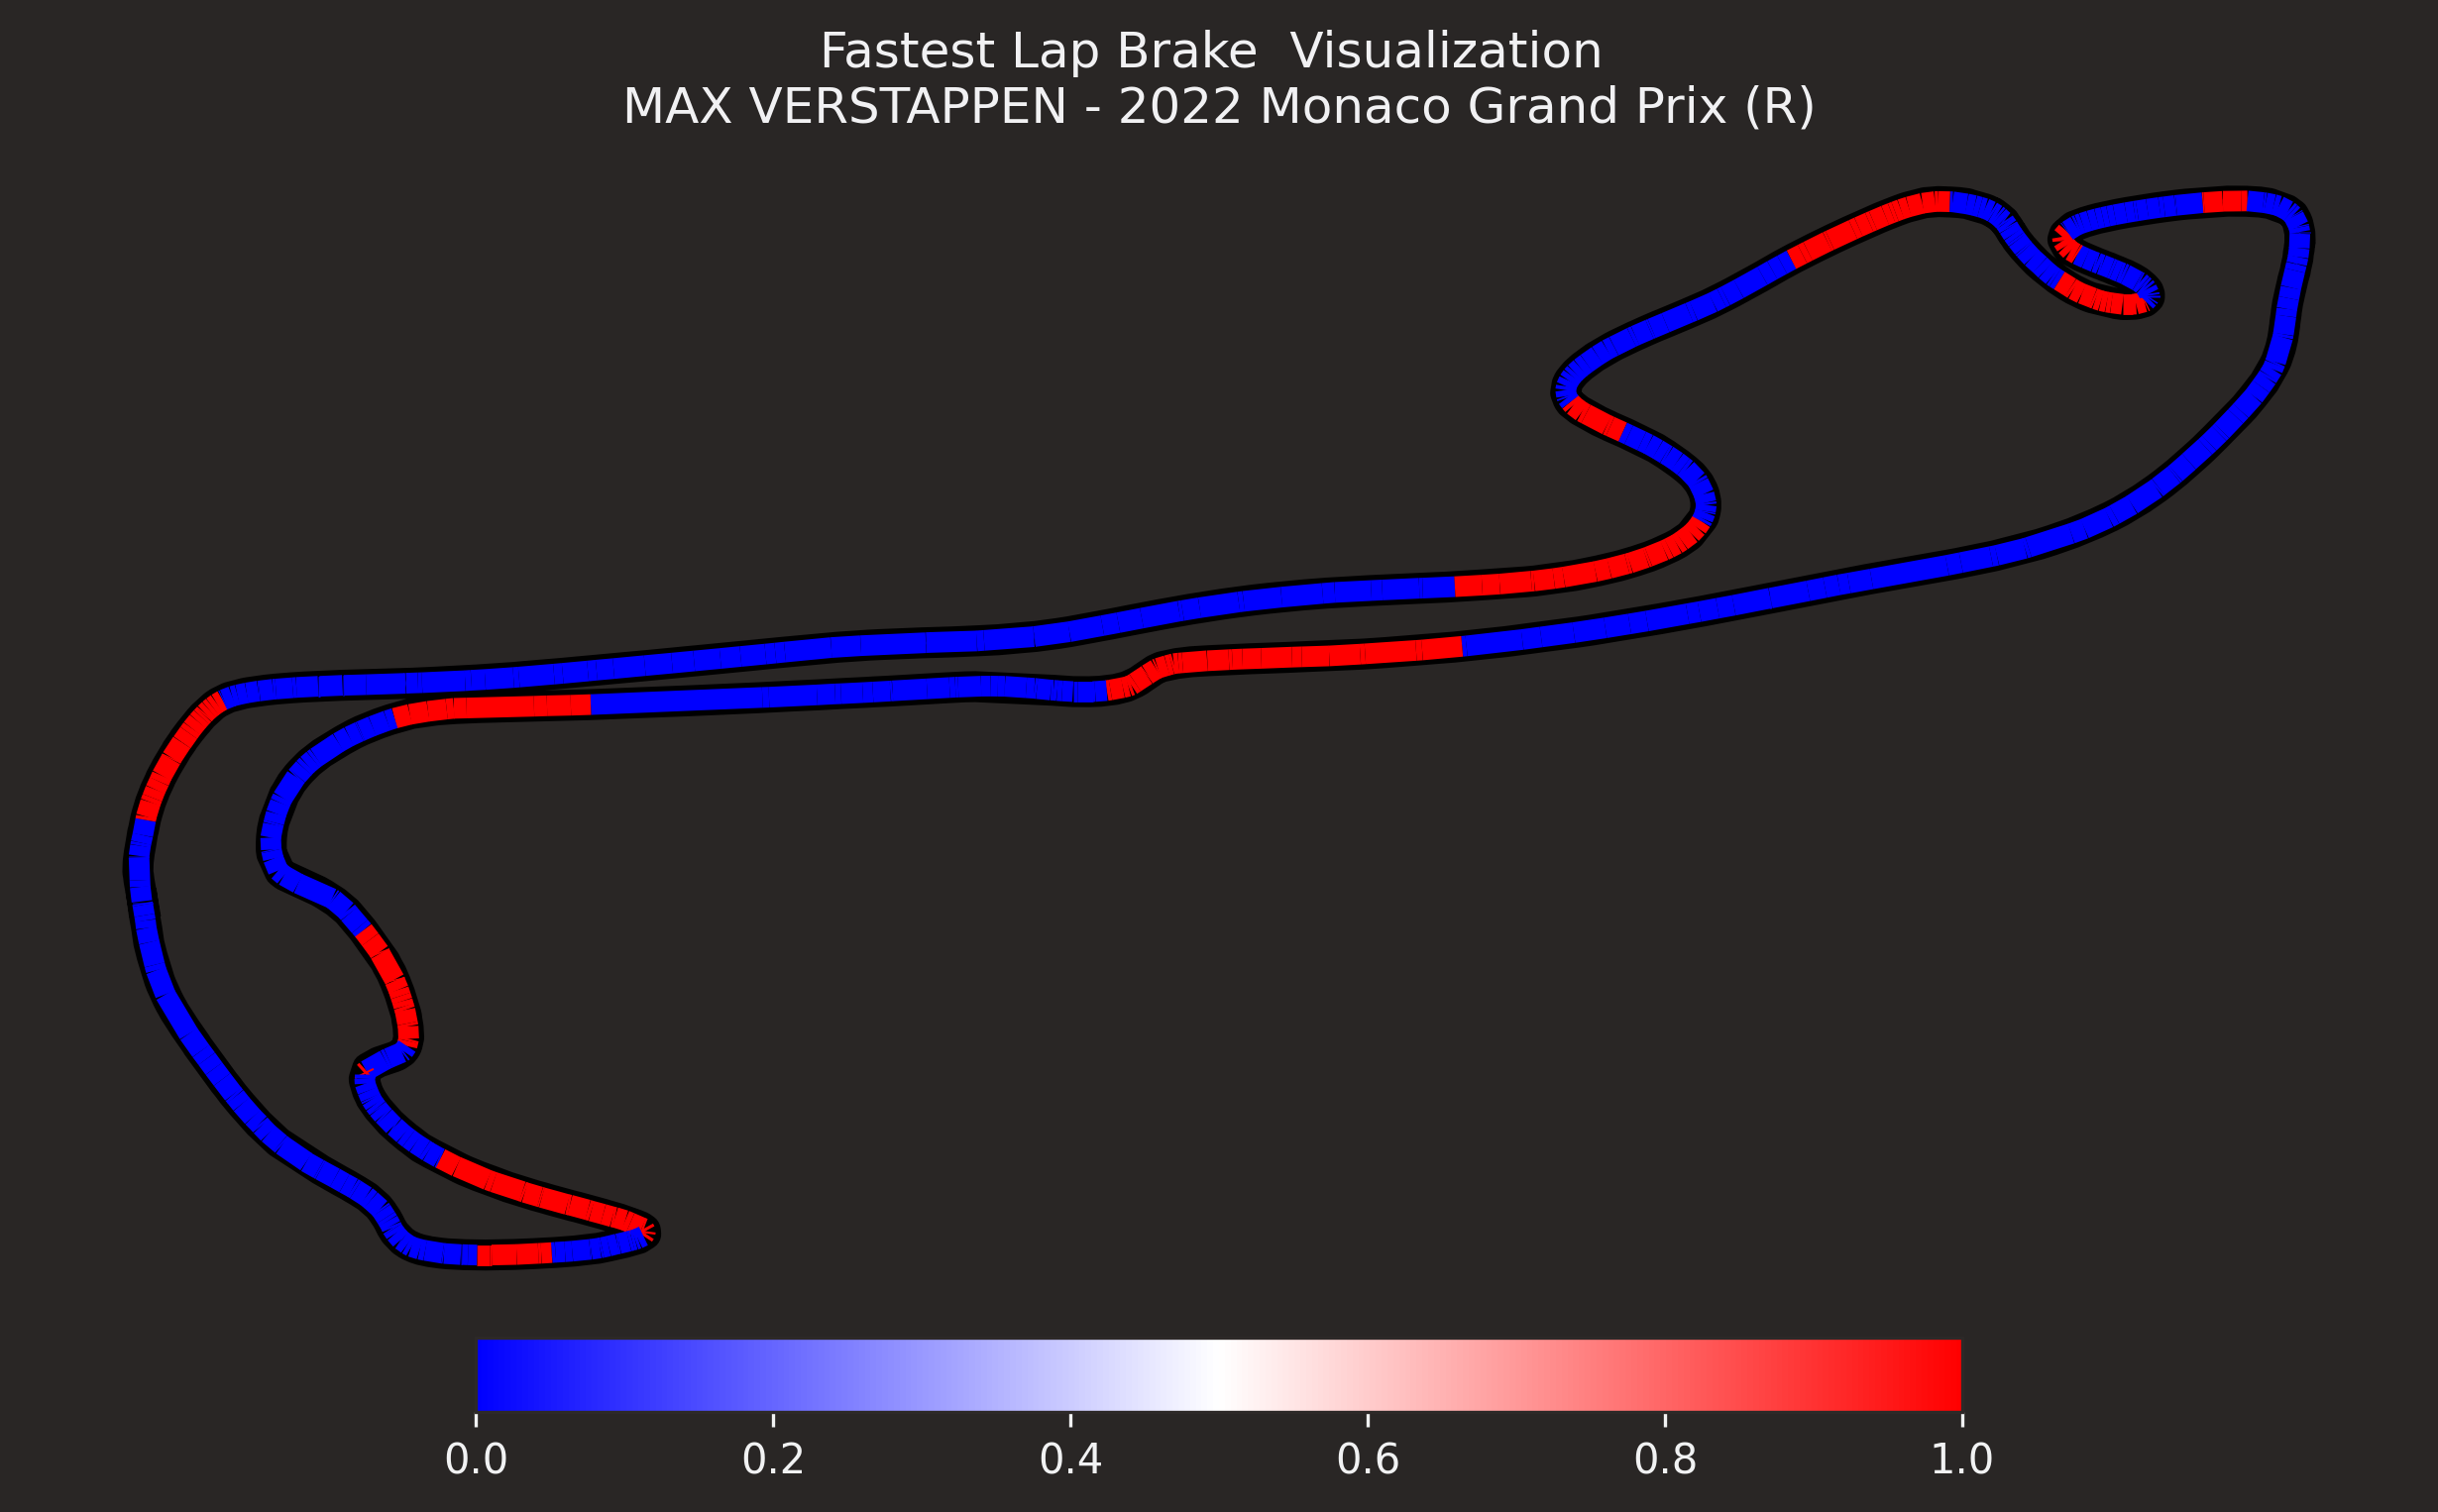

In [36]:
# Podium - 3:

cmap = matplotlib.colormaps['bwr']

fig, ax = plt.subplots(sharex=True, sharey=True ,figsize=(10,5),dpi=300)

fig.suptitle(
    f"Fastest Lap Brake  Visualization \n"
    f"{fastf1.plotting.DRIVER_TRANSLATE[pod_3['Driver']].upper()} - {year} {race_data.event['EventName']} ({session})"
)

plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.12)
ax.axis('off')

ax.plot(pod_3_tel['X'],pod_3_tel['Y'], color='black', linestyle='-', linewidth=7.5, zorder=0)

norm = plt.Normalize(pod_3_tel['Brake'].min(), pod_3_tel['Brake'].max())
lc = LineCollection(segments_3, cmap=cmap , norm=norm, linestyle='-', linewidth=5)

lc.set_array(pod_3_tel['Brake'])

line = ax.add_collection(lc)

cbaxes = fig.add_axes([0.25, 0.05, 0.5, 0.05])
normlegend = matplotlib.colors.Normalize(vmin=pod_3_tel['Brake'].min(), vmax=pod_3_tel['Brake'].max())
legend = matplotlib.colorbar.ColorbarBase(cbaxes, norm=normlegend, cmap=cmap , orientation="horizontal")

plt.show()

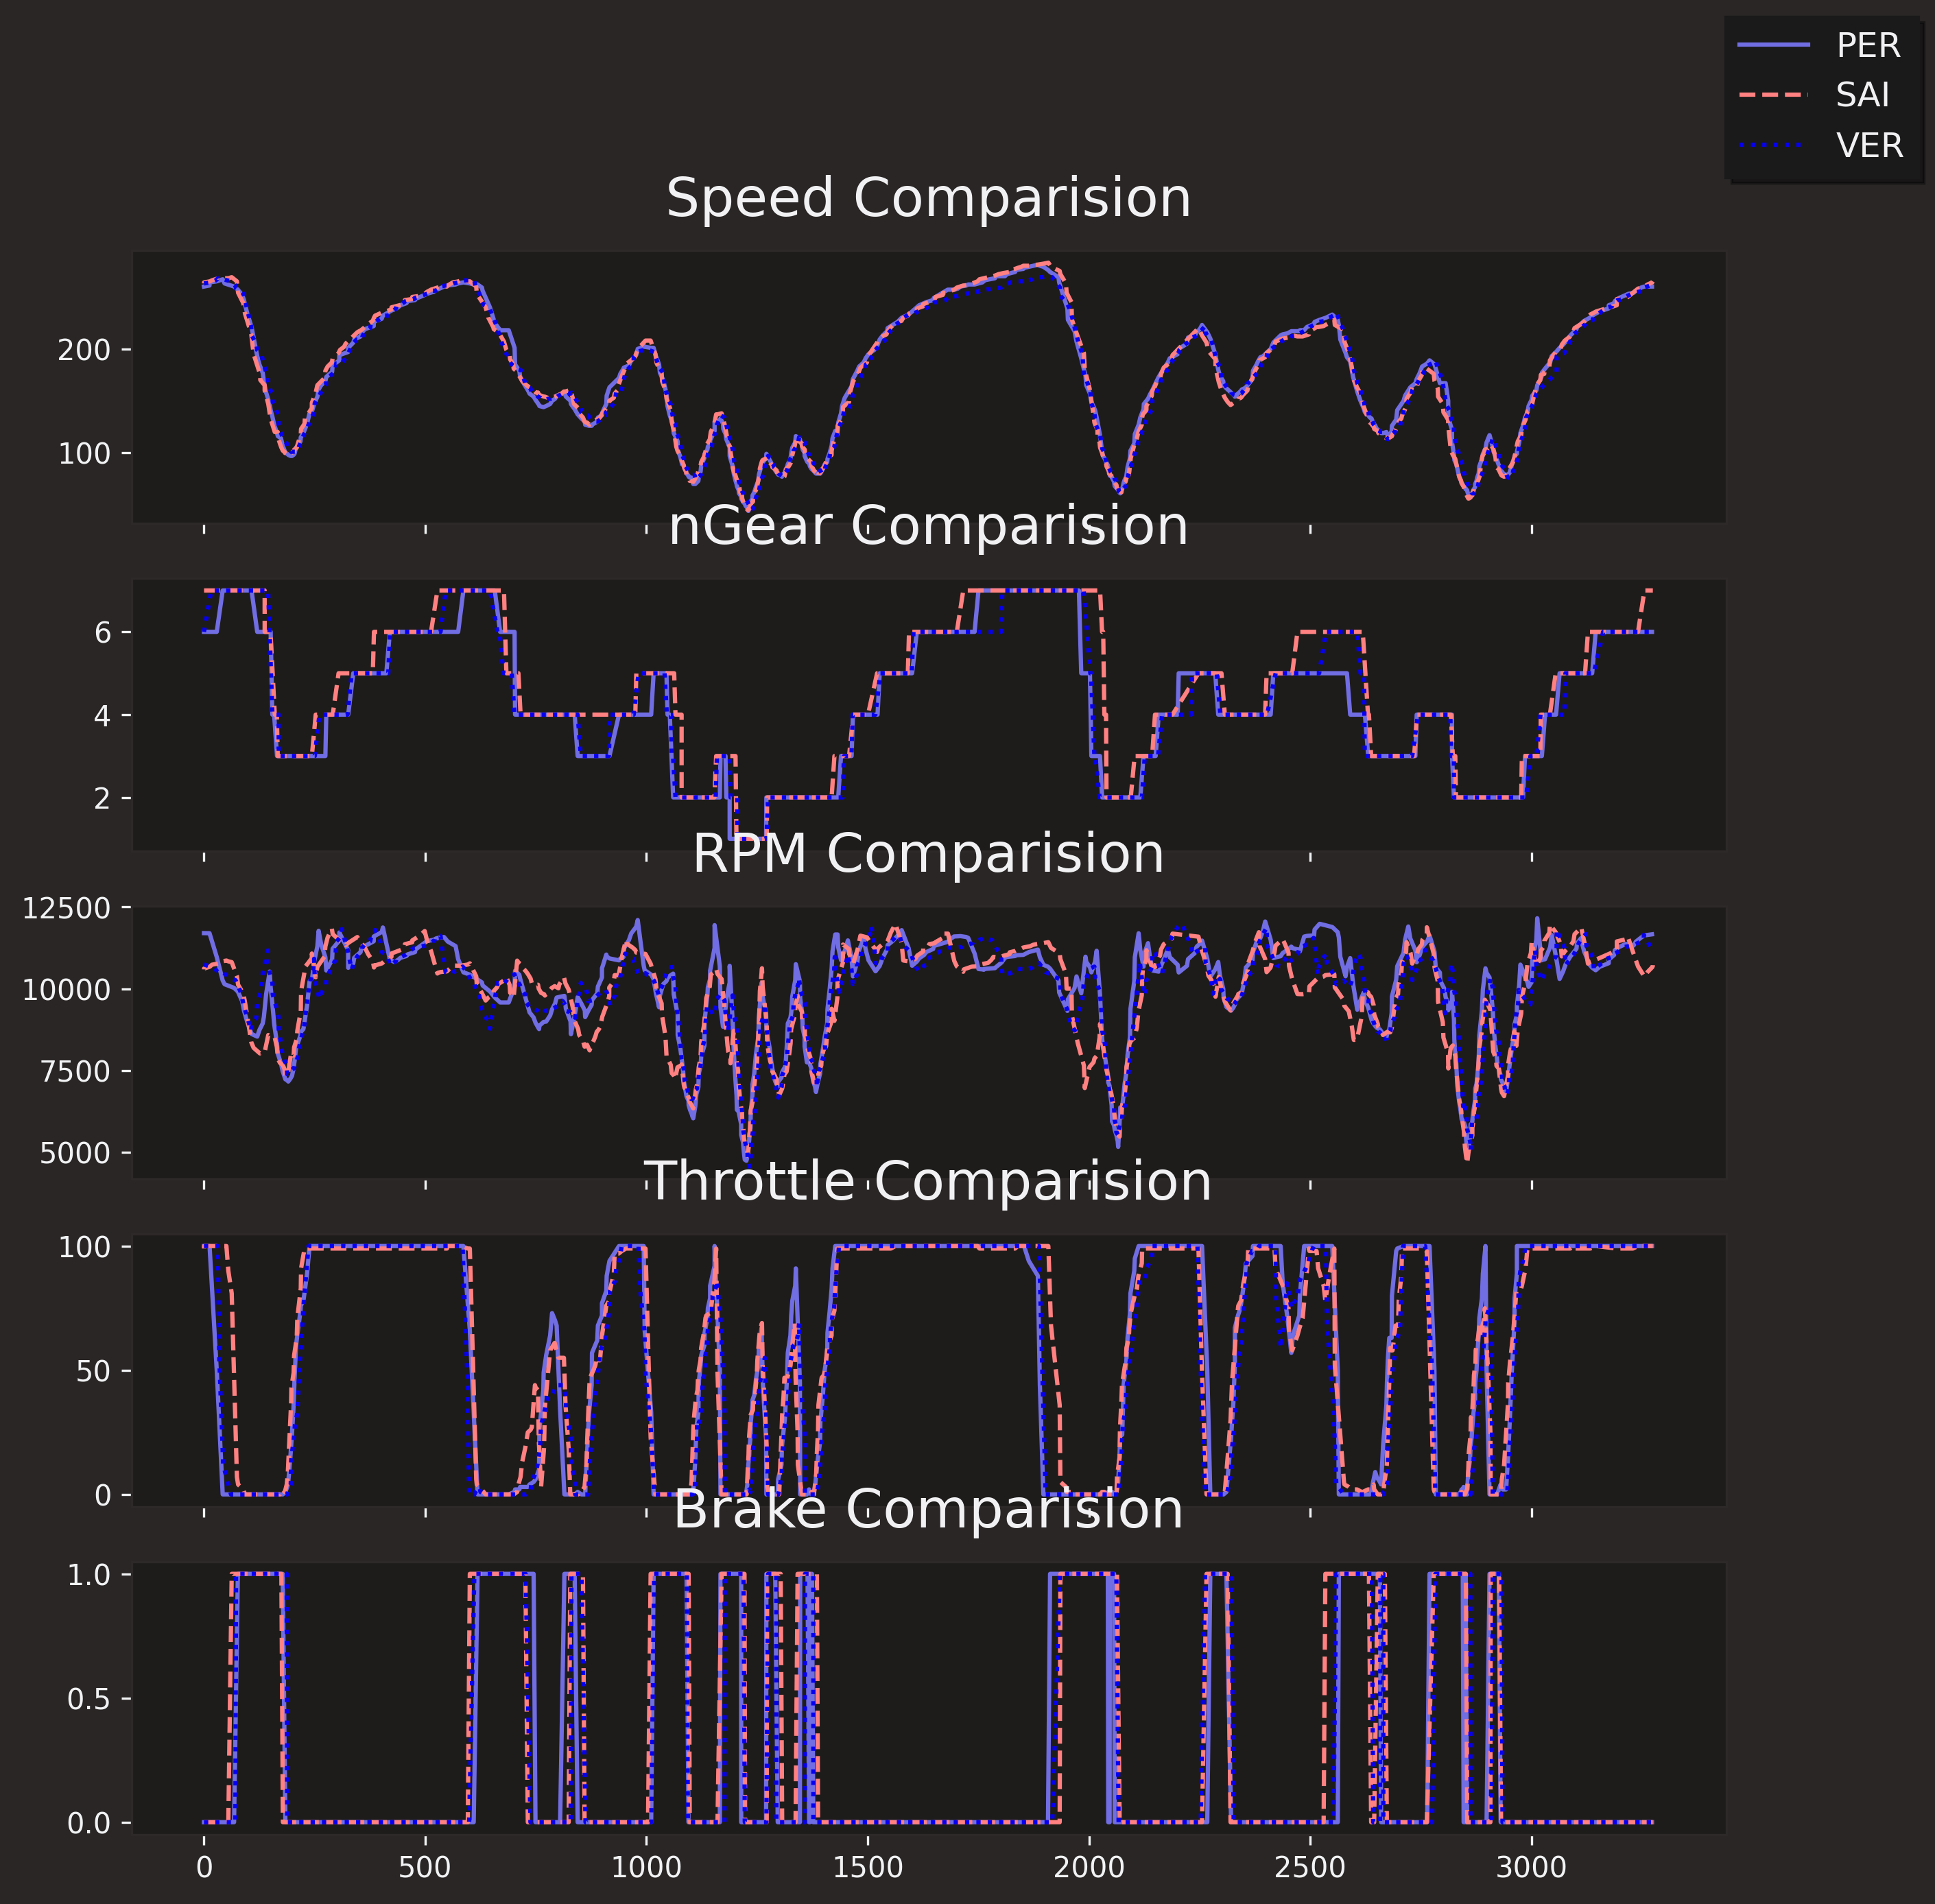

In [38]:
# POD_1
fig, axs = plt.subplots(5,sharex=True,figsize=(10,10),dpi = 300)
# plt.legend(frameon=False)

labels = [pod_1['Driver'],pod_2['Driver'],pod_3['Driver']]

axs[0].plot(pod_1_tel['Distance'], pod_1_tel['Speed'],label=pod_1['Driver'],color=fastf1.plotting.driver_color(pod_1['Driver']),linestyle='solid')
axs[0].plot(pod_2_tel['Distance'], pod_2_tel['Speed'],label=pod_2['Driver'],color=fastf1.plotting.driver_color(pod_2['Driver']),linestyle='dashed')
axs[0].plot(pod_3_tel['Distance'], pod_3_tel['Speed'],label=pod_3['Driver'],color=fastf1.plotting.driver_color(pod_3['Driver']),linestyle='dotted')
axs[0].set_title('Speed Comparision')

axs[1].plot(pod_1_tel['Distance'], pod_1_tel['nGear'],label=pod_1['Driver'],color=fastf1.plotting.driver_color(pod_1['Driver']),linestyle='solid')
axs[1].plot(pod_2_tel['Distance'], pod_2_tel['nGear'],label=pod_2['Driver'],color=fastf1.plotting.driver_color(pod_2['Driver']),linestyle='dashed')
axs[1].plot(pod_3_tel['Distance'], pod_3_tel['nGear'],label=pod_3['Driver'],color=fastf1.plotting.driver_color(pod_3['Driver']),linestyle='dotted')
axs[1].set_title('nGear Comparision')

axs[2].plot(pod_1_tel['Distance'], pod_1_tel['RPM'],label=pod_1['Driver'],color=fastf1.plotting.driver_color(pod_1['Driver']),linestyle='solid')
axs[2].plot(pod_2_tel['Distance'], pod_2_tel['RPM'],label=pod_2['Driver'],color=fastf1.plotting.driver_color(pod_2['Driver']),linestyle='dashed')
axs[2].plot(pod_3_tel['Distance'], pod_3_tel['RPM'],label=pod_3['Driver'],color=fastf1.plotting.driver_color(pod_3['Driver']),linestyle='dotted')
axs[2].set_title('RPM Comparision')

axs[3].plot(pod_1_tel['Distance'], pod_1_tel['Throttle'],label=pod_1['Driver'],color=fastf1.plotting.driver_color(pod_1['Driver']),linestyle='solid')
axs[3].plot(pod_2_tel['Distance'], pod_2_tel['Throttle'],label=pod_2['Driver'],color=fastf1.plotting.driver_color(pod_2['Driver']),linestyle='dashed')
axs[3].plot(pod_3_tel['Distance'], pod_3_tel['Throttle'],label=pod_3['Driver'],color=fastf1.plotting.driver_color(pod_3['Driver']),linestyle='dotted')
axs[3].set_title('Throttle Comparision')

axs[4].plot(pod_1_tel['Distance'], pod_1_tel['Brake'],label=pod_1['Driver'],color=fastf1.plotting.driver_color(pod_1['Driver']),linestyle='solid')
axs[4].plot(pod_2_tel['Distance'], pod_2_tel['Brake'],label=pod_2['Driver'],color=fastf1.plotting.driver_color(pod_2['Driver']),linestyle='dashed')
axs[4].plot(pod_3_tel['Distance'], pod_3_tel['Brake'],label=pod_3['Driver'],color=fastf1.plotting.driver_color(pod_3['Driver']),linestyle='dotted')
axs[4].set_title('Brake Comparision')

fig.legend(labels=labels,loc="upper right",shadow=True,fontsize='12')


plt.show()

# Drivers Position During the race

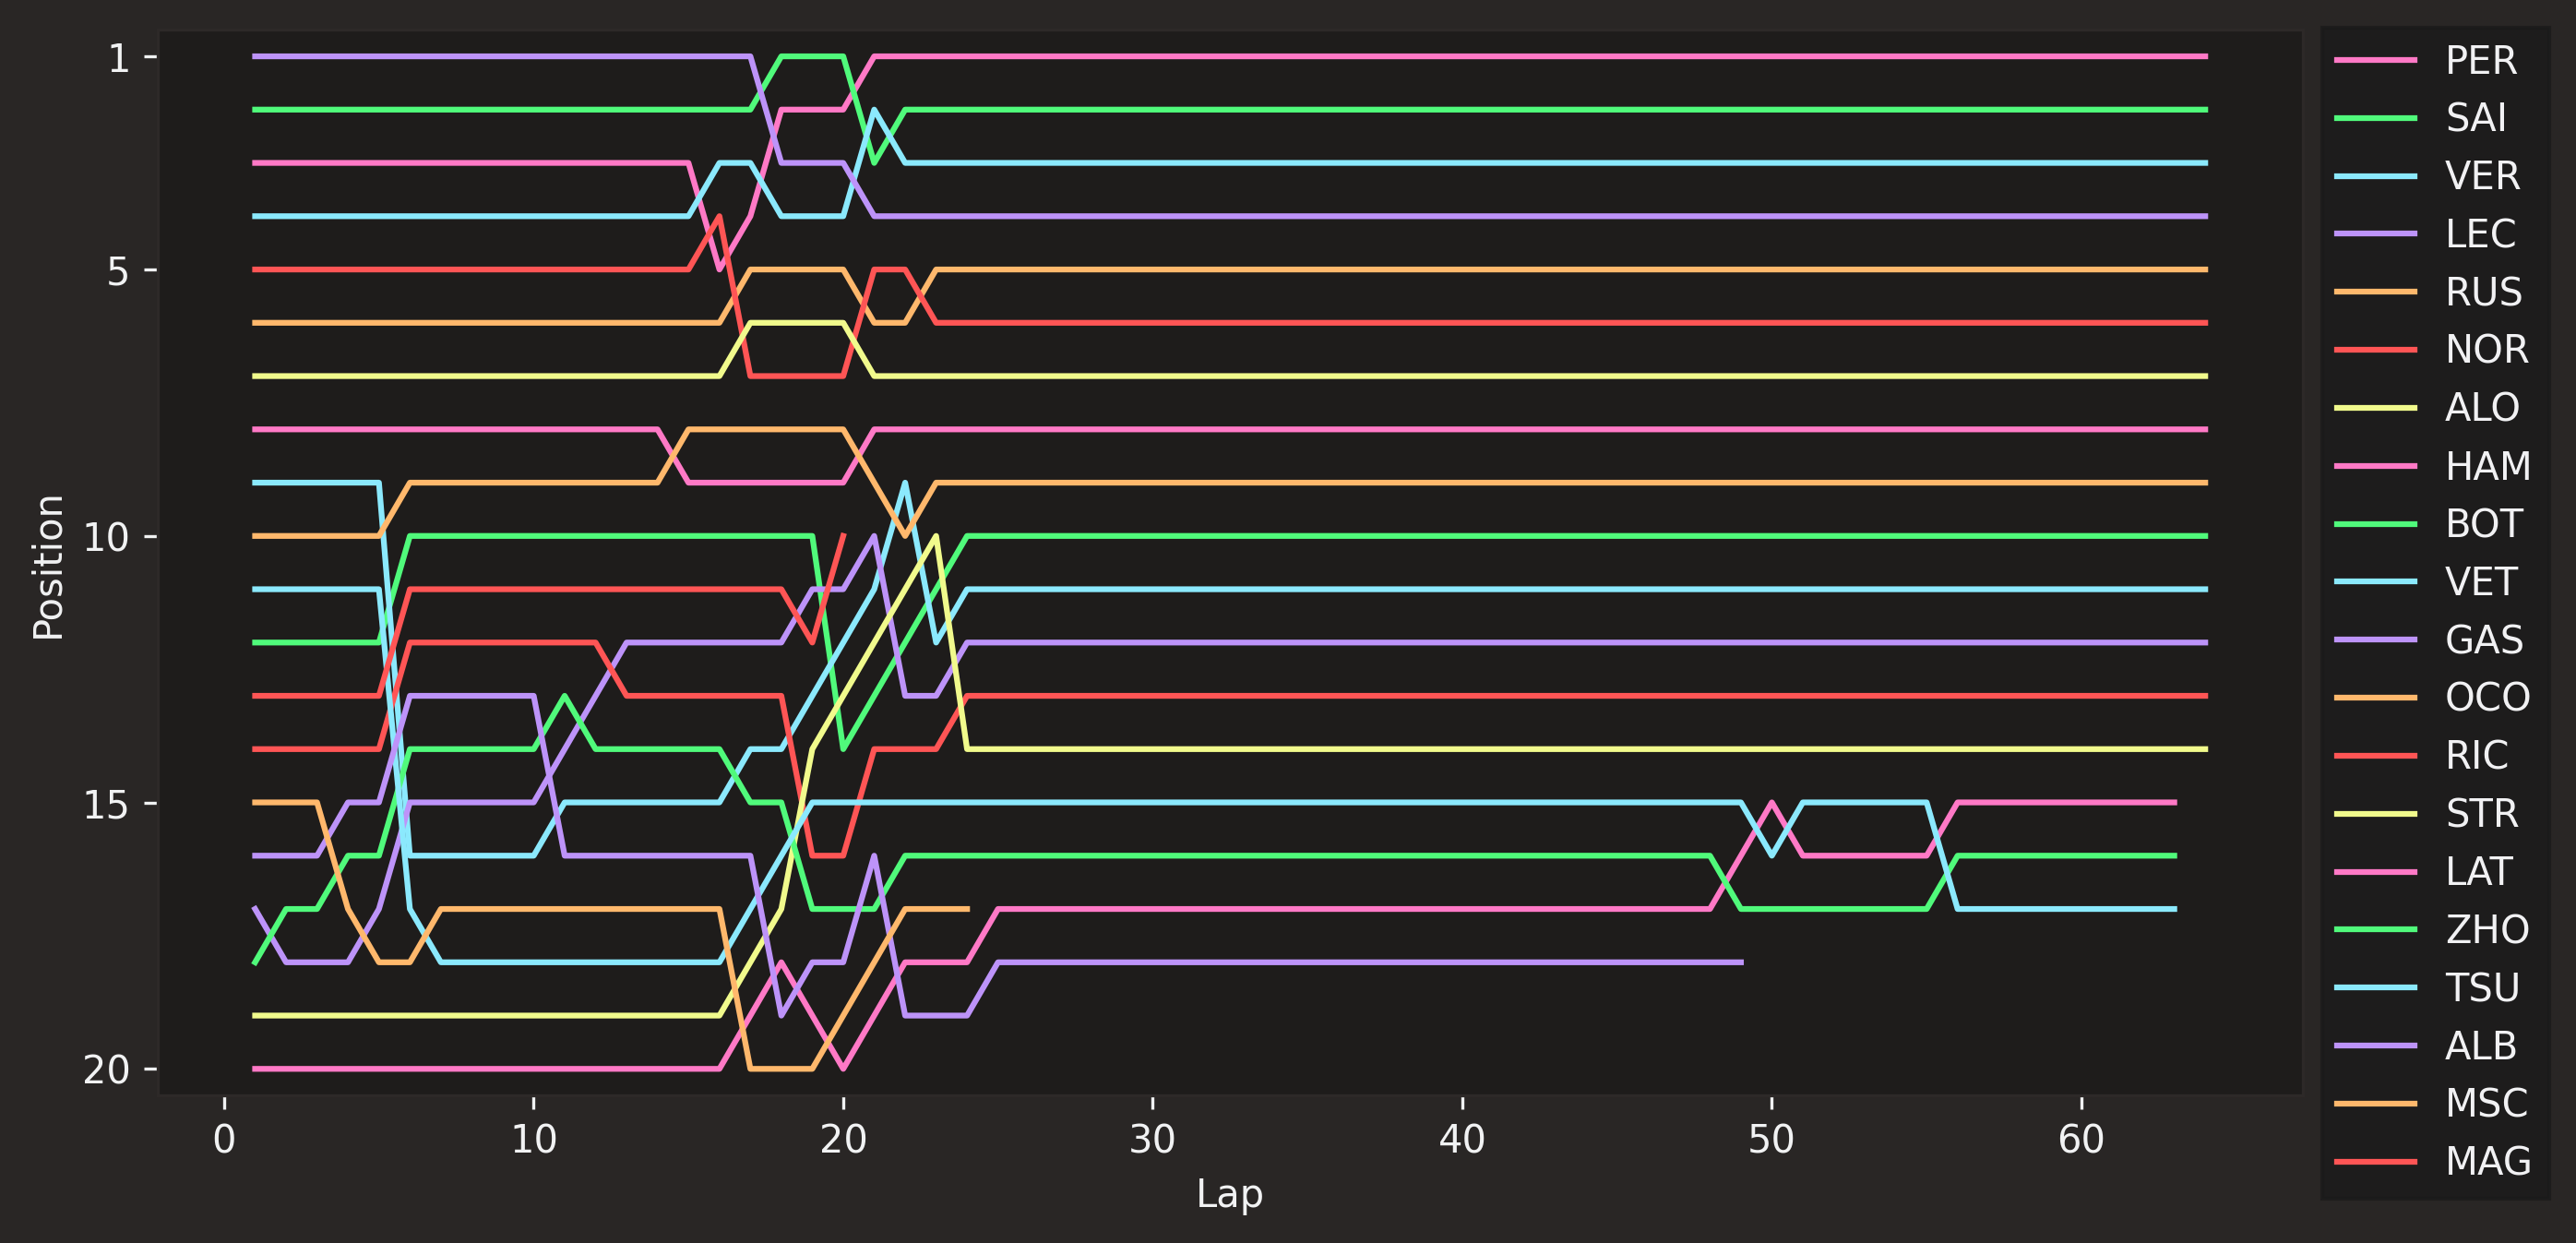

In [41]:
fig, ax = plt.subplots(figsize=(10.0, 5.0),dpi=300)

for drv in race_data.drivers:
    drv_laps = race_data.laps.pick_driver(drv)

    abb = drv_laps['Driver'].iloc[0]
    # color = fastf1.plotting.driver_color(abb)

    ax.plot(drv_laps['LapNumber'], drv_laps['Position'],
            label=abb)
    
ax.set_ylim([20.5, 0.5])
ax.set_yticks([1, 5, 10, 15, 20])
ax.set_xlabel('Lap')
ax.set_ylabel('Position')

ax.legend(bbox_to_anchor=(1.0, 1.02))

plt.show()

# Driver's Lap Time Performance

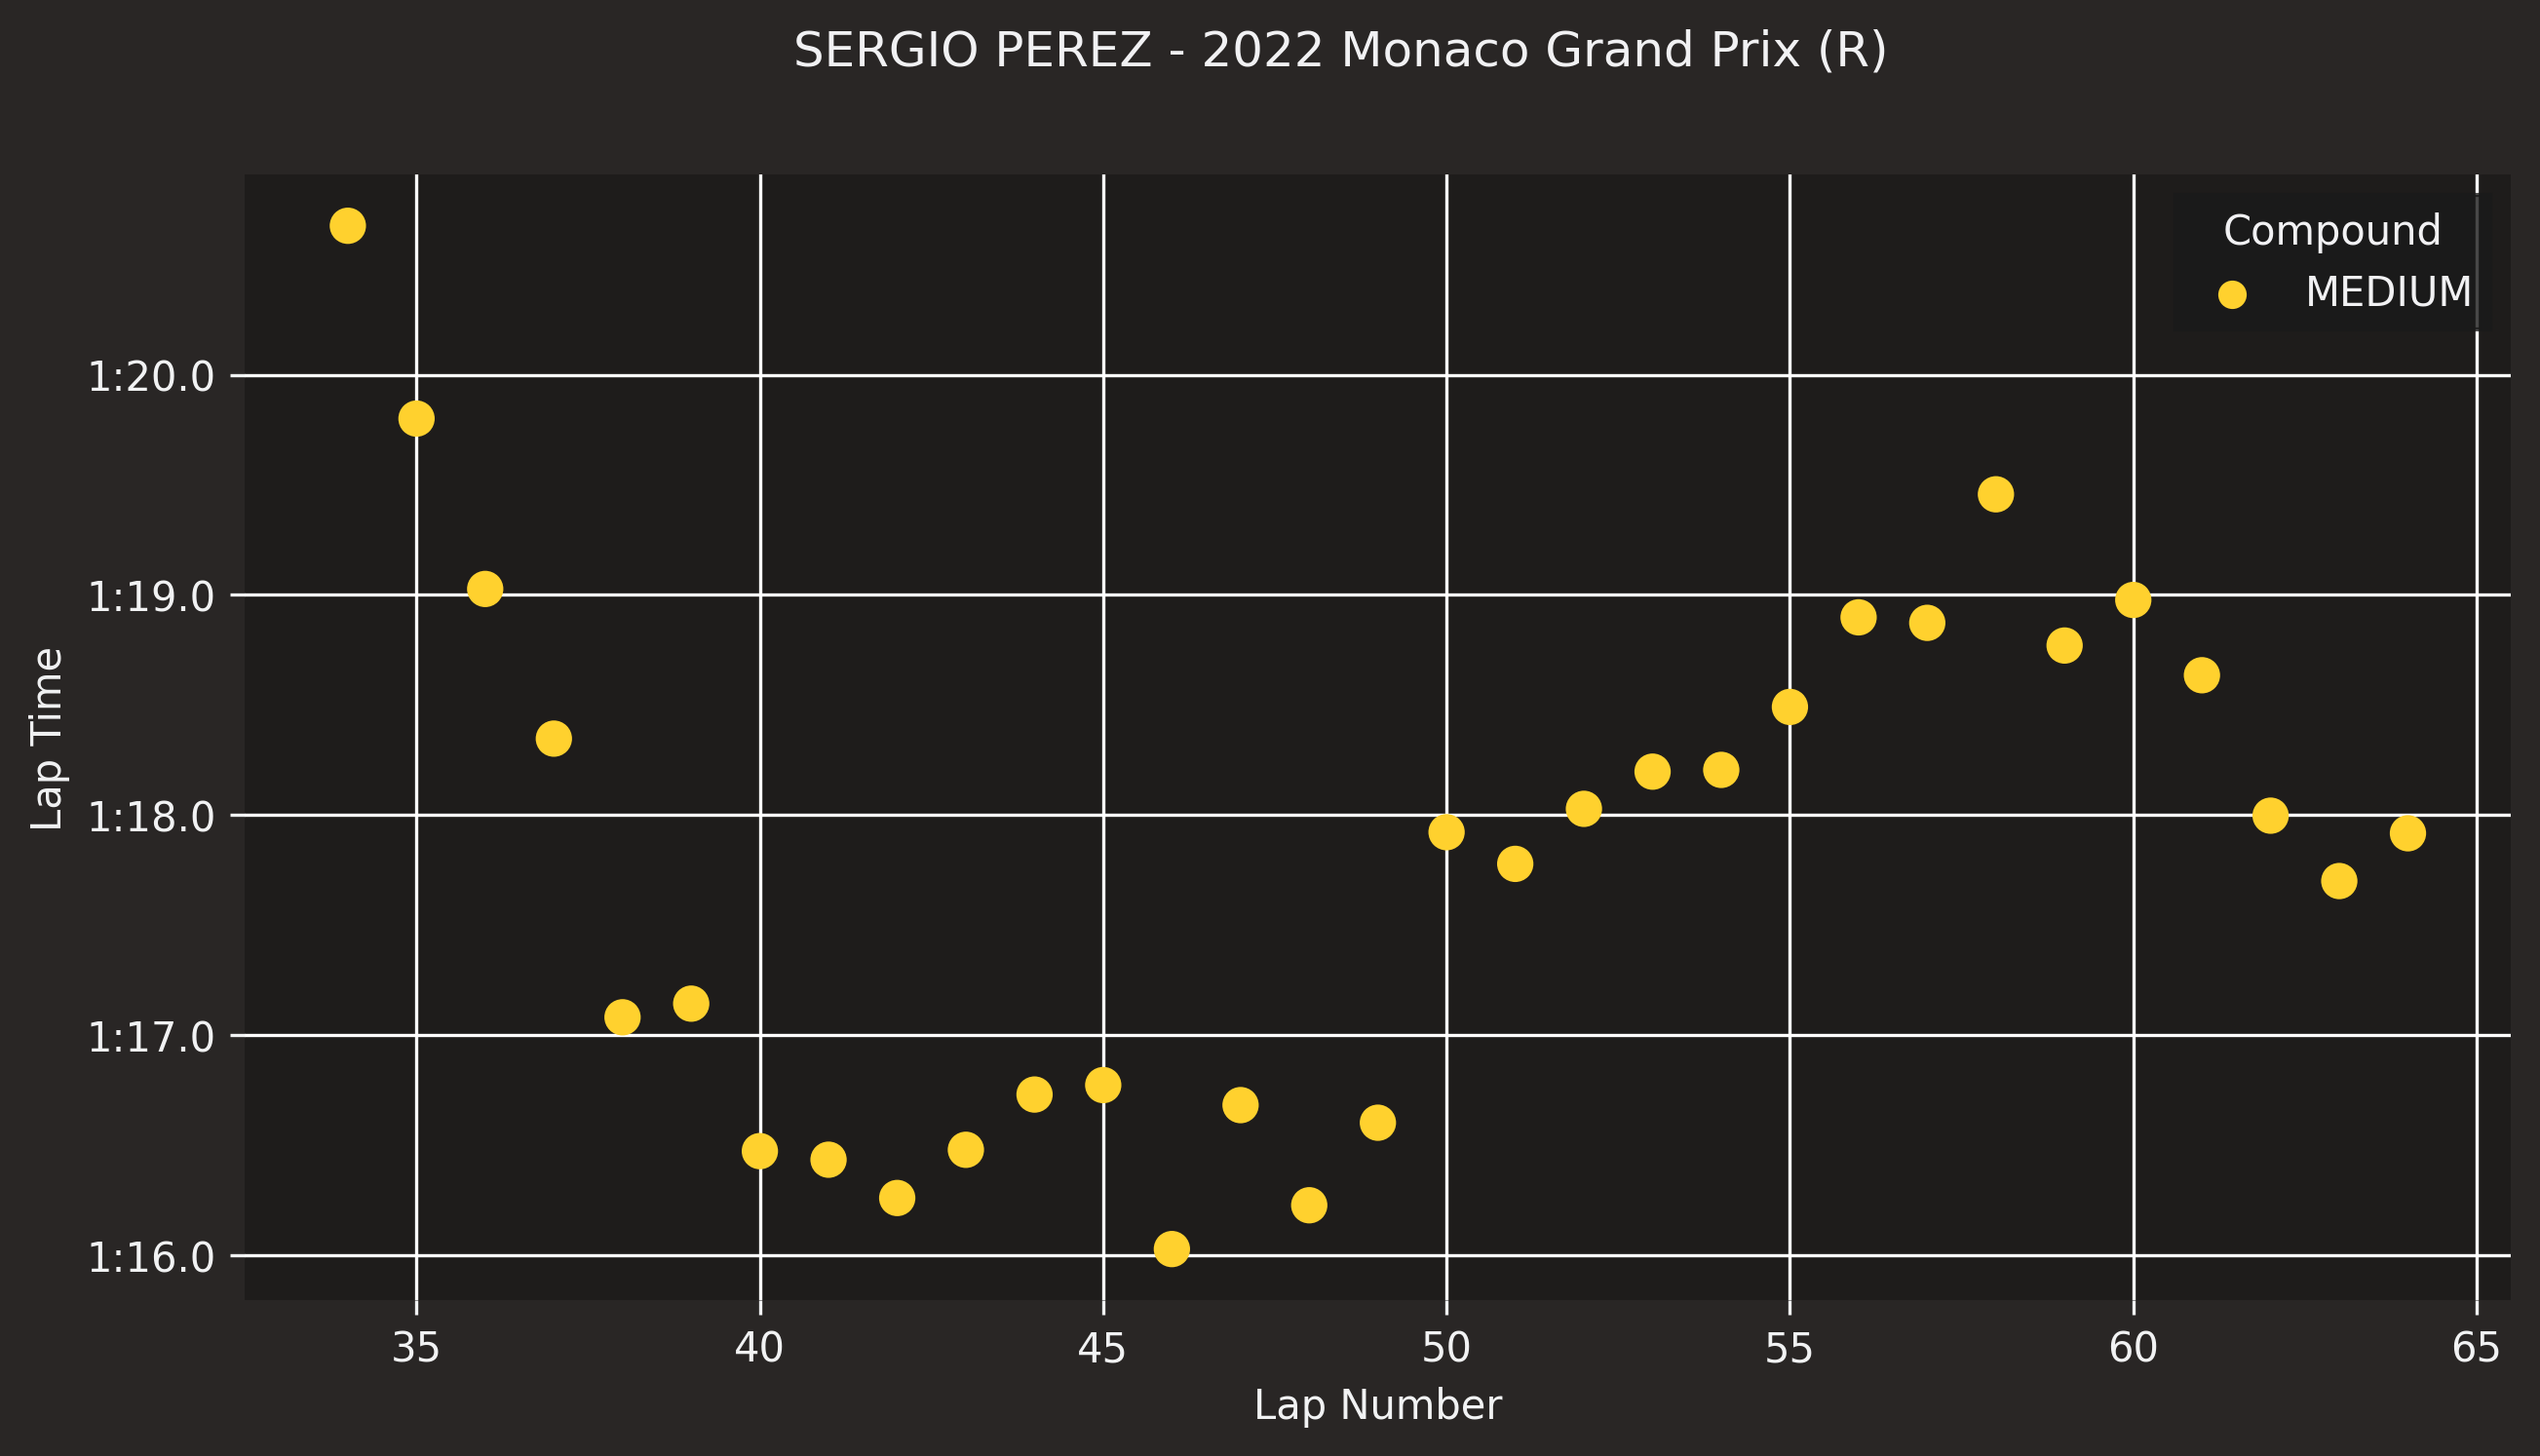

In [42]:
# Podium - 1:
driver_laps = race_data.laps.pick_driver(pod_1['Driver']).pick_quicklaps().reset_index()

fig, ax = plt.subplots(figsize=(10, 5),dpi=300)

sns.scatterplot(data=driver_laps,
                x="LapNumber",
                y="LapTime",
                ax=ax,
                hue="Compound",
                palette=fastf1.plotting.COMPOUND_COLORS,
                s=80,
                linewidth=0,
                legend='auto')

ax.set_xlabel("Lap Number")
ax.set_ylabel("Lap Time")

# The y-axis increases from bottom to top by default
# Since we are plotting time, it makes sense to invert the axis
ax.invert_yaxis()
plt.suptitle(f"{fastf1.plotting.DRIVER_TRANSLATE[pod_1['Driver']].upper()} - {year} {race_data.event['EventName']} ({session})")

# Turn on major grid lines
plt.grid(color='w', which='major', axis='both')
sns.despine(left=True, bottom=True)

plt.show()

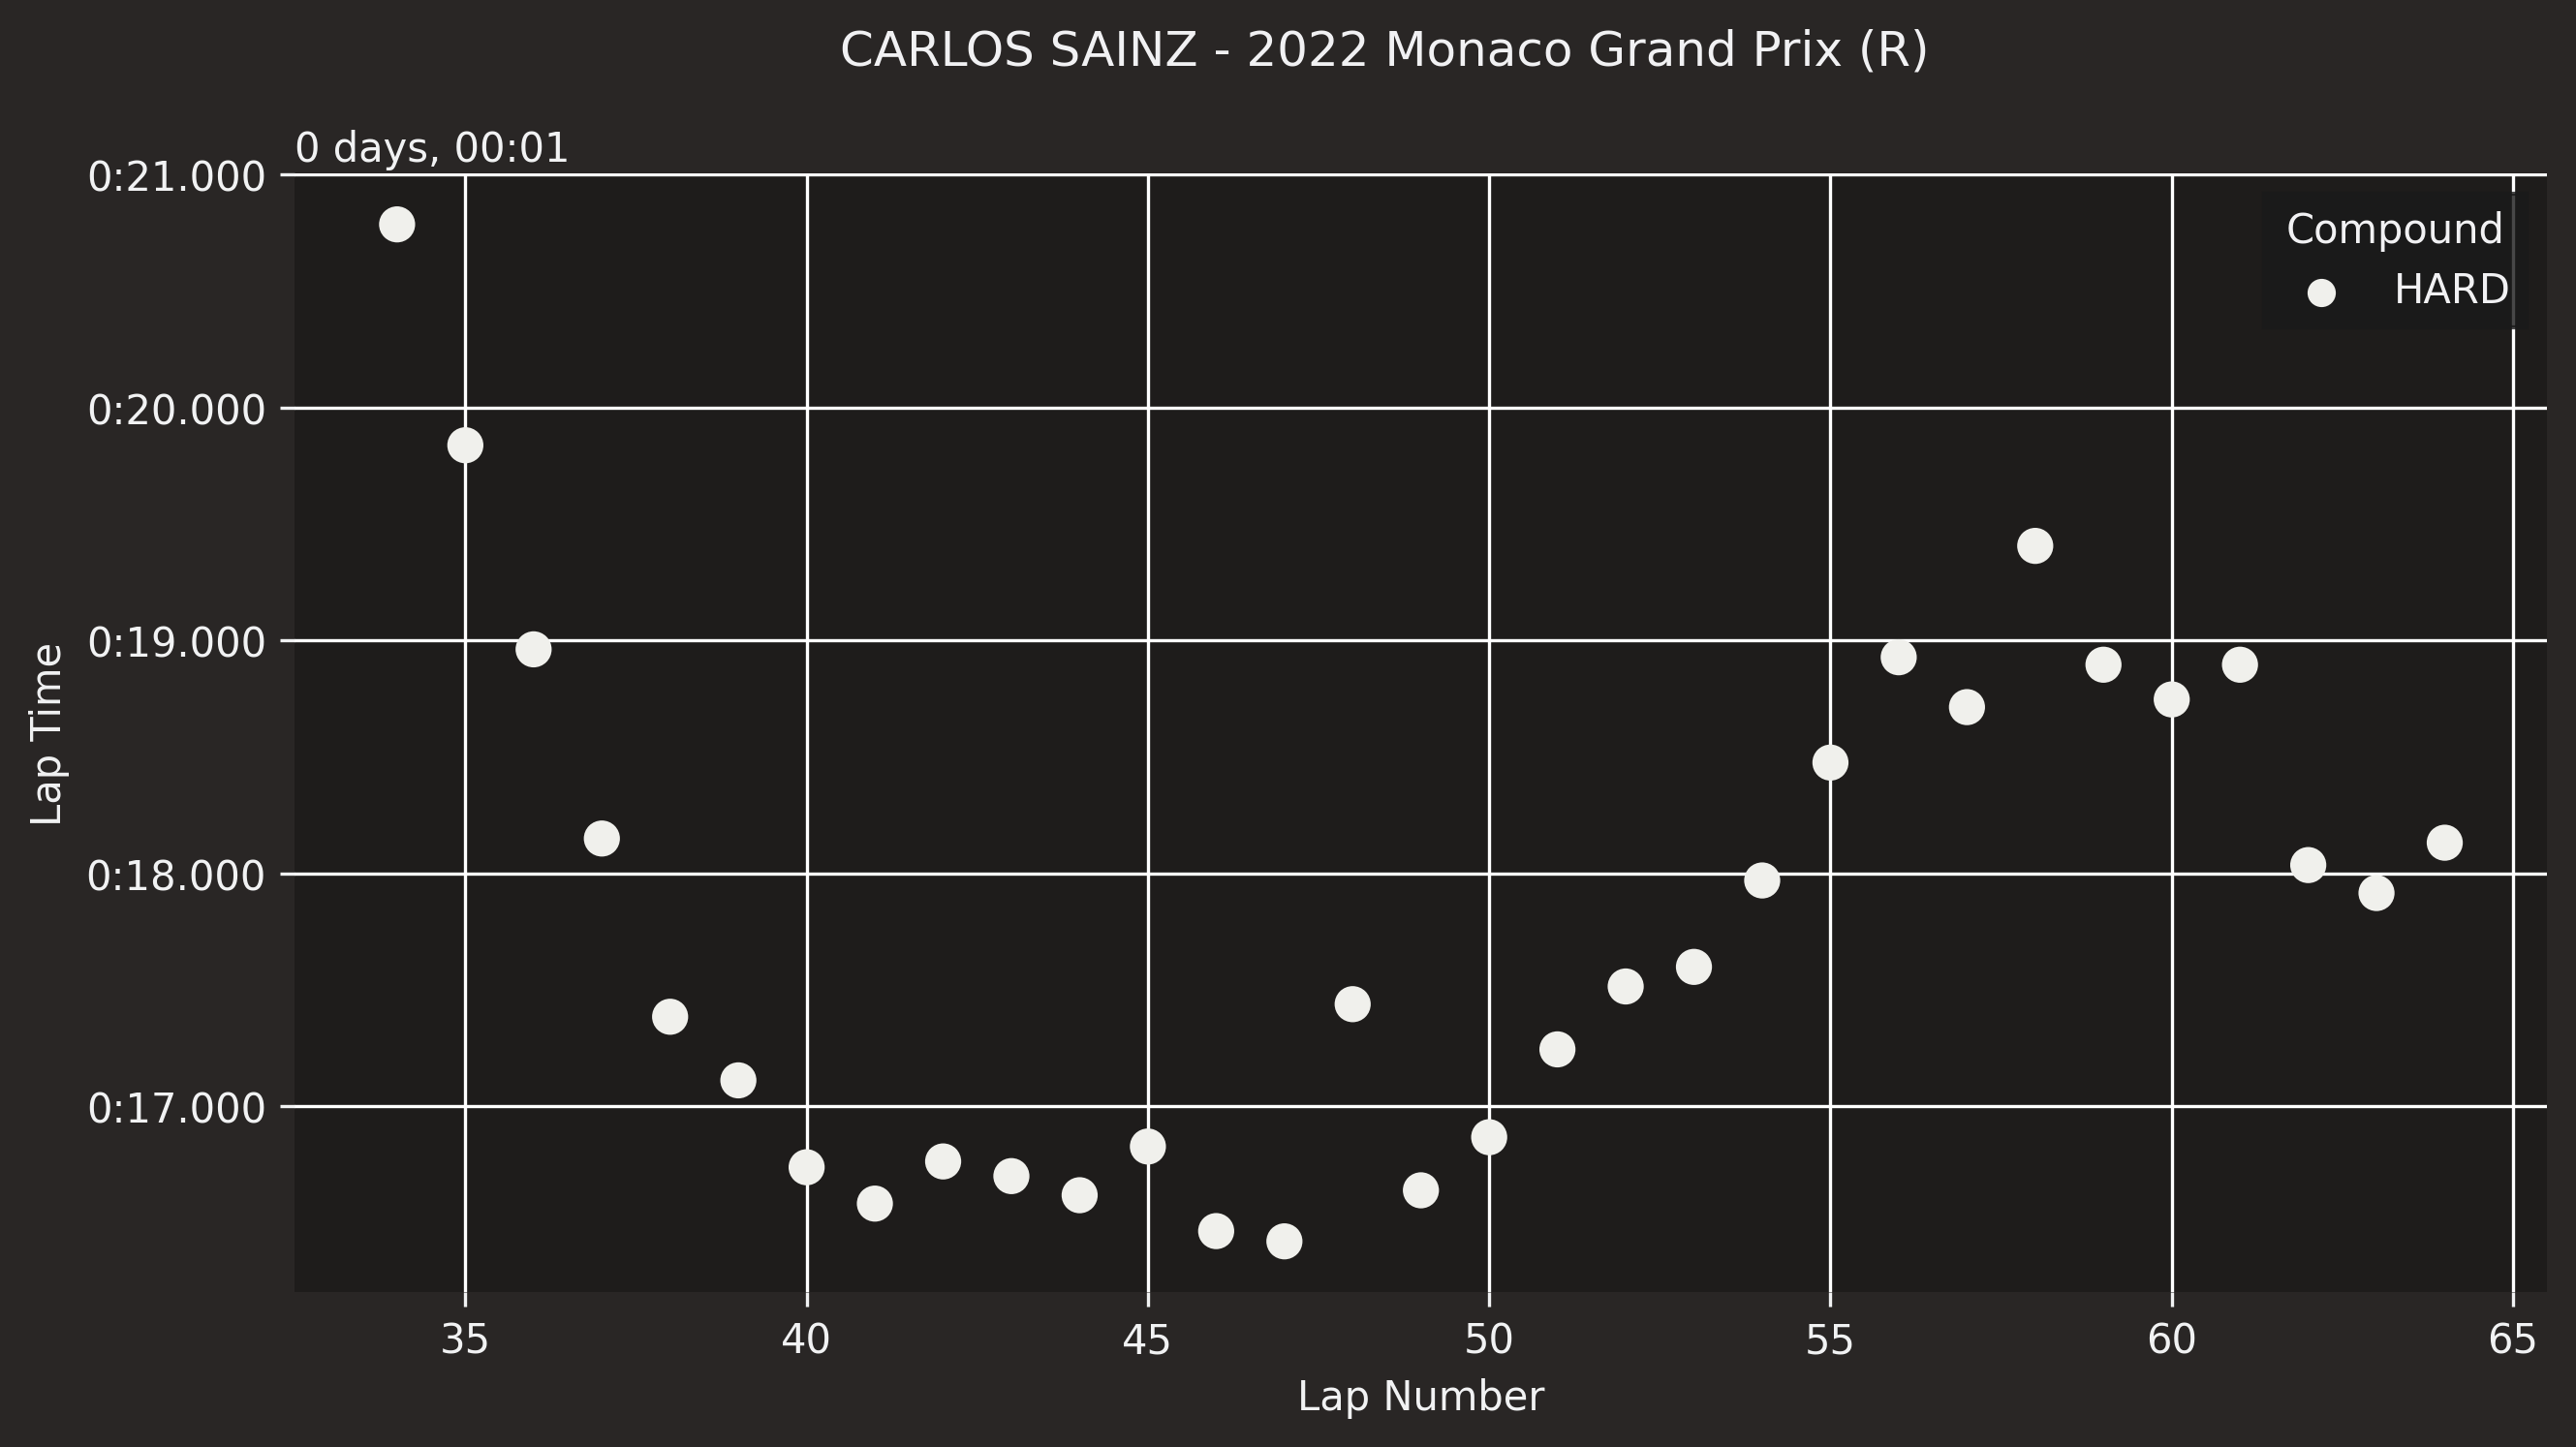

In [43]:
# Podium - 2:
driver_laps = race_data.laps.pick_driver(pod_2['Driver']).pick_quicklaps().reset_index()

fig, ax = plt.subplots(figsize=(10, 5),dpi=300)

sns.scatterplot(data=driver_laps,
                x="LapNumber",
                y="LapTime",
                ax=ax,
                hue="Compound",
                palette=fastf1.plotting.COMPOUND_COLORS,
                s=80,
                linewidth=0,
                legend='auto')

ax.set_xlabel("Lap Number")
ax.set_ylabel("Lap Time")

ax.invert_yaxis()
plt.suptitle(f"{fastf1.plotting.DRIVER_TRANSLATE[pod_2['Driver']].upper()} - {year} {race_data.event['EventName']} ({session})")

# Turn on major grid lines
plt.grid(color='w', which='major', axis='both')
sns.despine(left=True, bottom=True)

plt.show()

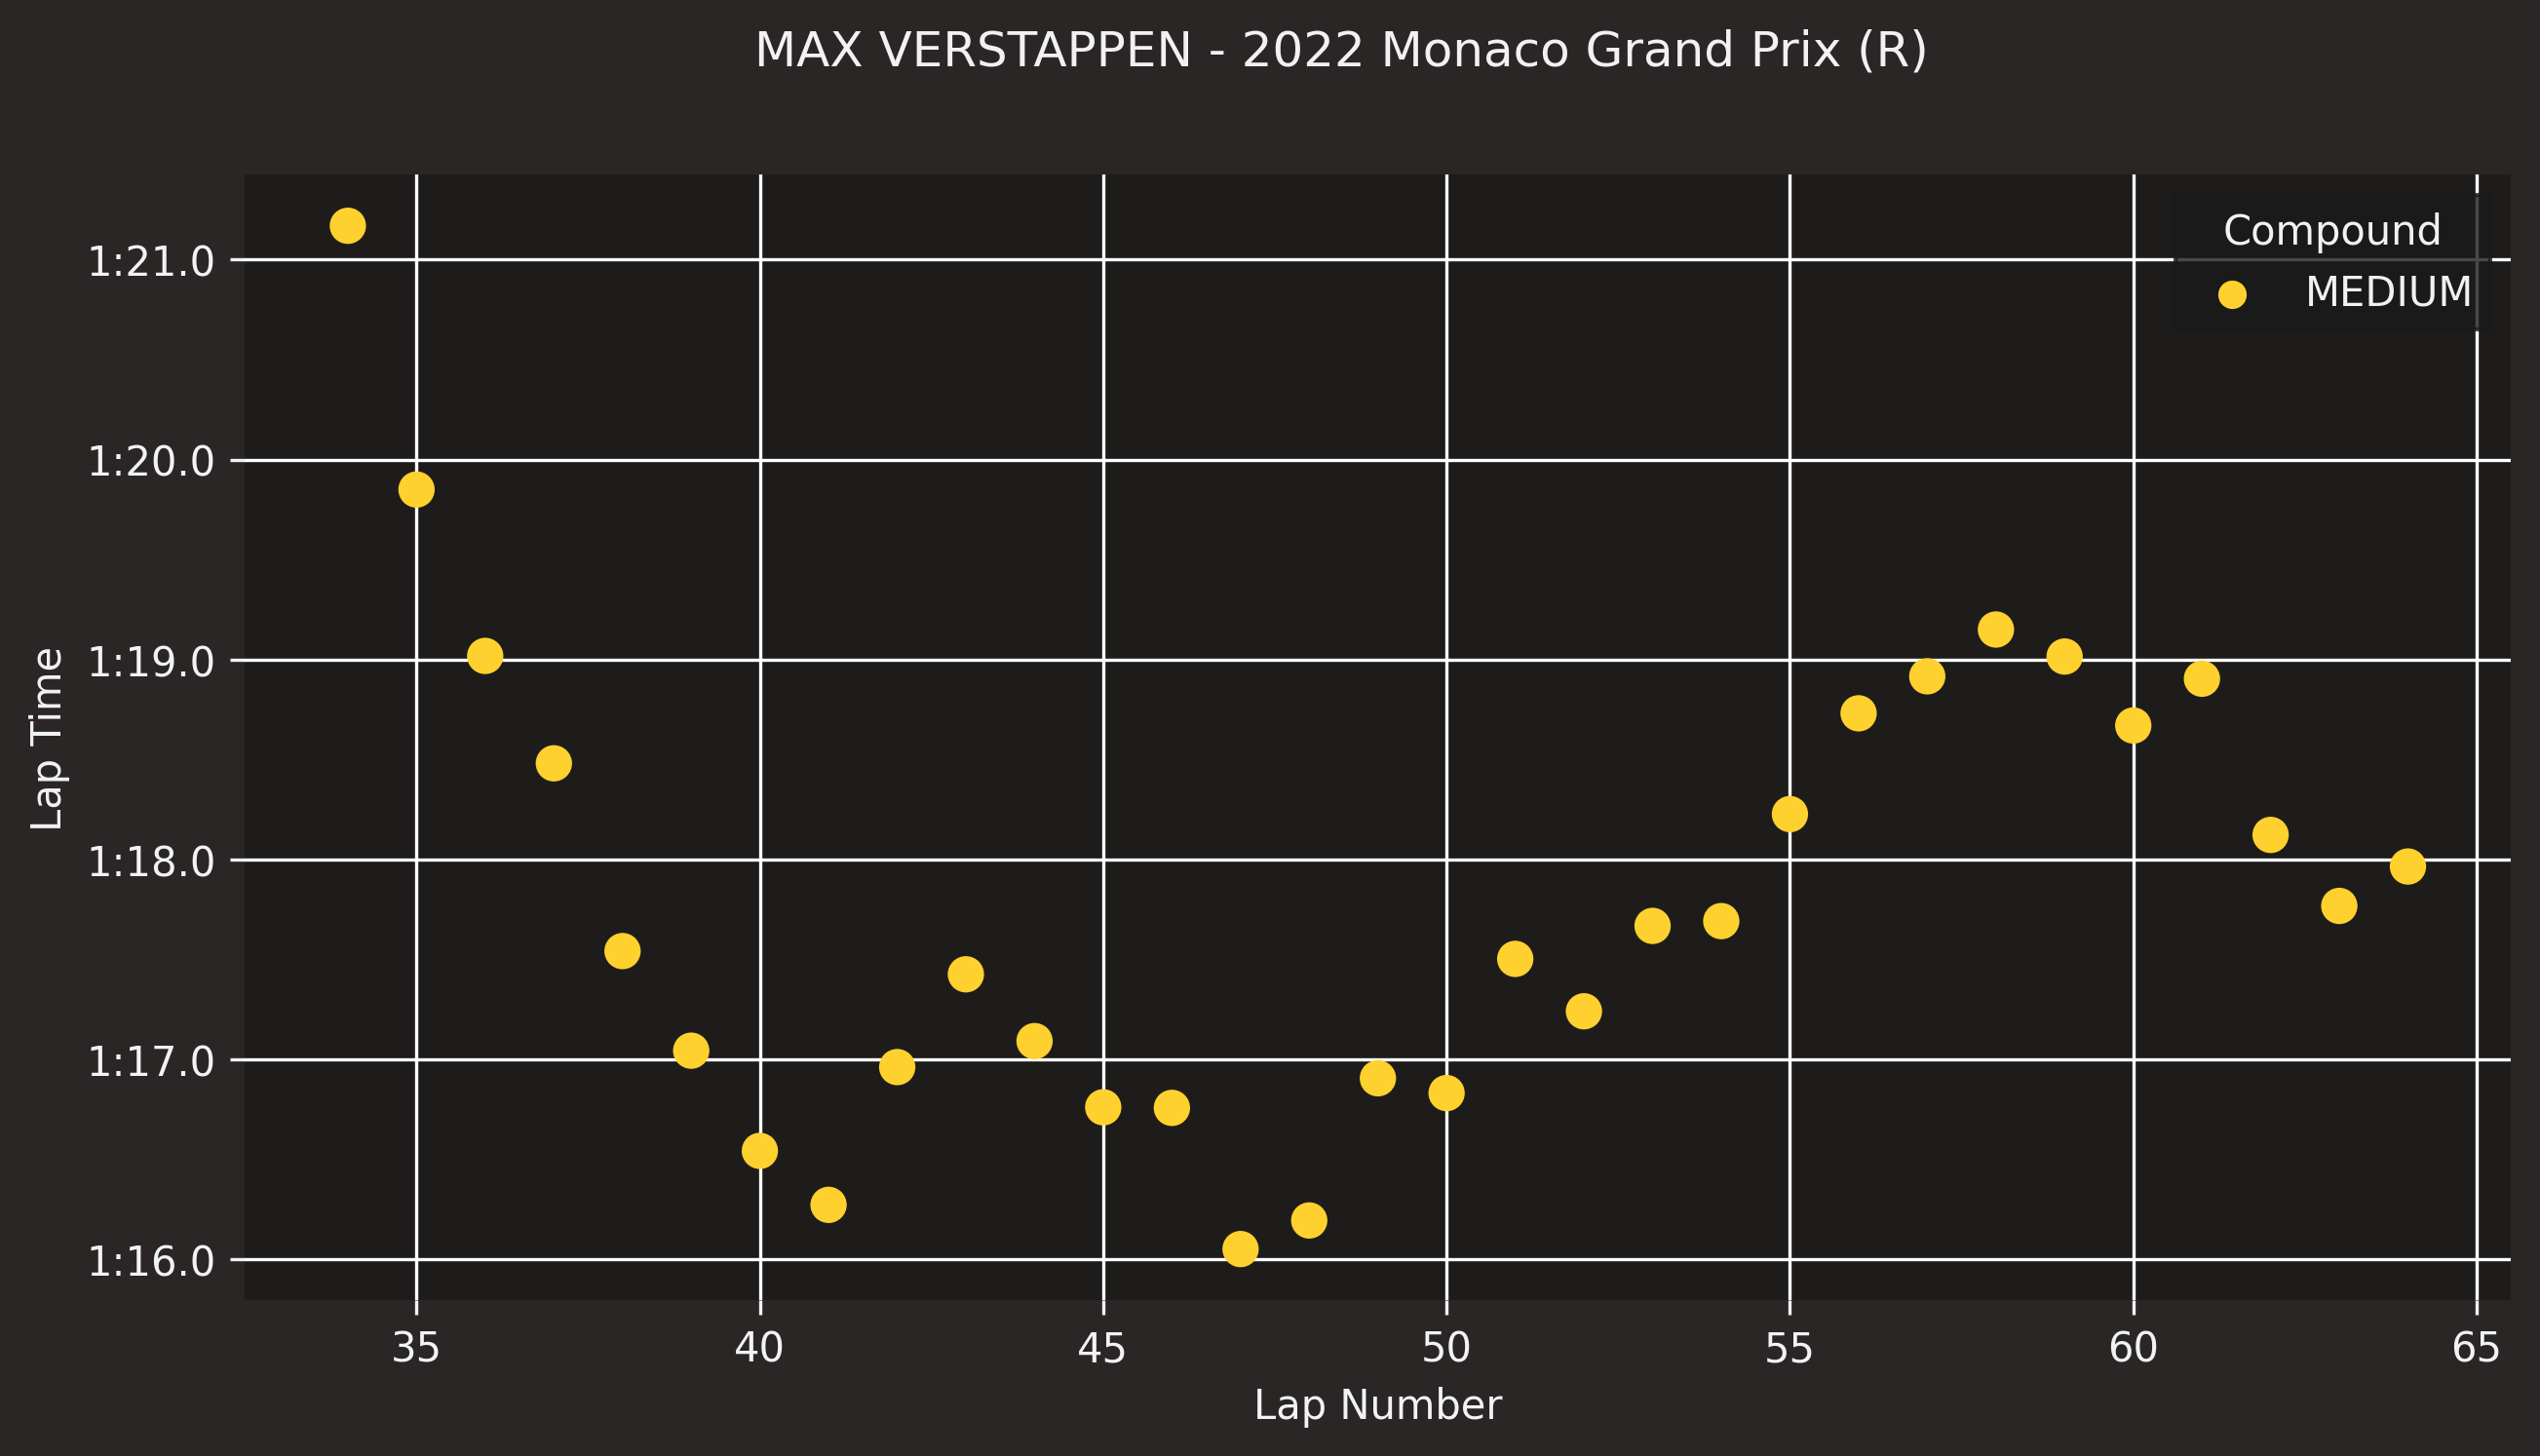

In [44]:
# Podium - 2:
driver_laps = race_data.laps.pick_driver(pod_3['Driver']).pick_quicklaps().reset_index()

fig, ax = plt.subplots(figsize=(10, 5),dpi=300)

sns.scatterplot(data=driver_laps,
                x="LapNumber",
                y="LapTime",
                ax=ax,
                hue="Compound",
                palette=fastf1.plotting.COMPOUND_COLORS,
                s=80,
                linewidth=0,
                legend='auto')

ax.set_xlabel("Lap Number")
ax.set_ylabel("Lap Time")

# The y-axis increases from bottom to top by default
# Since we are plotting time, it makes sense to invert the axis
ax.invert_yaxis()
plt.suptitle(f"{fastf1.plotting.DRIVER_TRANSLATE[pod_3['Driver']].upper()} - {year} {race_data.event['EventName']} ({session})")

# Turn on major grid lines
plt.grid(color='w', which='major', axis='both')
sns.despine(left=True, bottom=True)

plt.show()

In [45]:
from fastf1.api import weather_data,track_status_data

weather = weather_data(race_data.api_path, response=None, livedata=True)
track = track_status_data(race_data.api_path,response=None,livedata = True)

c:\Users\Namra.DEVLAPPY\AppData\Local\Programs\Python\Python311\Lib\site-packages\fastf1\api.py:32: UserWarning: `fastf1.api` will be considered private in future releases and potentially be removed or changed!
  warnings.warn("`fastf1.api` will be considered private in future releases and "
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for track_status_data


In [46]:
weather = pd.DataFrame(weather)

track = pd.DataFrame(track)

In [47]:
weather

Time  AirTemp  Humidity  Pressure  Rainfall  TrackTemp  \
0   0 days 00:00:03.938000     24.2      68.0    1002.9     False       42.1   
1   0 days 00:01:03.941000     24.2      68.0    1002.7     False       41.5   
2   0 days 00:02:03.935000     24.2      68.0    1002.9     False       41.5   
3   0 days 00:03:03.939000     24.1      68.0    1002.9     False       41.3   
4   0 days 00:04:03.938000     24.2      69.0    1002.9     False       41.2   
..                     ...      ...       ...       ...       ...        ...   
240 0 days 04:00:04.543000     22.3      65.0    1003.4     False       29.5   
241 0 days 04:01:04.560000     22.4      65.0    1003.2     False       29.9   
242 0 days 04:02:04.561000     22.4      66.0    1003.2     False       29.8   
243 0 days 04:03:04.570000     22.5      66.0    1003.2     False       30.1   
244 0 days 04:04:04.596000     22.6      65.0    1003.2      True       30.4   

     WindDirection  WindSpeed  
0               70        0.8  
1              346        0.8  
2              335        2.4  
3              320        0.6  
4               51        0.6  
..             ...        ...  
240            166        1.0  
241            165        1.1  
242            142        0.6  
243              0        0.6  
244            180        0.6  

[245 rows x 8 columns]